In [1]:
#standard imports
import detprocess as dp
from pathlib import Path
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import math
import qetpy as qp
from scipy import constants
from pytesdaq.io.hdf5 import H5Reader, getrandevents

from scipy import stats, optimize, interpolate

from matplotlib import rc
rc('text', usetex=False)
rc('font', family="sans-serif")
rc('axes', labelsize=12)
rc('font', size=12)
rc('legend', fontsize=10)
rc('xtick', labelsize=12)
rc('ytick', labelsize=12)

h5_reader = H5Reader()

/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
h5_reader.get_detector_config('/sdata2/runs/run19/raw/continuous_I2_D20220728_T171401/cont_I2_D20220728_T171402_F0001.hdf5'
)

{'NoDevice': {'adc_channel_indices': 0,
  'adc_conversion_factor': array([1.0436792e-04, 3.1236414e-04, 3.9713905e-14, 2.8663868e-18],
        dtype=float32),
  'channel_list': 0,
  'close_loop_norm': 625000.0,
  'feedback_mode': 'close',
  'feedback_polarity': -1,
  'feedback_resistance': 1250.0,
  'lock_point_voltage': 0.0030026862,
  'open_loop_full_norm': 105000.0,
  'open_loop_preamp_norm': 5000.0,
  'output_gain': 50.0,
  'output_offset': -0.0964591,
  'preamp_gain': 100.0,
  'shunt_resistance': 0.005,
  'signal_gen_current': '1e-06',
  'signal_gen_frequency': 50.0,
  'signal_gen_onoff': 'on',
  'signal_gen_phase_shift': 'nan',
  'signal_gen_shape': 'square',
  'signal_gen_source': 'none',
  'signal_gen_tes_resistance': 10000.0,
  'signal_gen_voltage': 0.01,
  'signal_source': 'feedback',
  'squid_bias': '-9.001221001221002e-05',
  'squid_turn_ratio': 10.0,
  'tes_bias': '1.2210012210010744e-07',
  'tes_chans': 'A',
  'detector_chans': 'NoDevice',
  'controller_chans': 'feb1_A'},

In [2]:
run = 21
#series = '20211001_0847'
#version = 5
#suffix = ''

trigger_path = '/sdata2/runs/run21/processed/Co_6sig_I2_D20221028_T154539' #trigger processed with 6 sigma, GaAs template
yaml_path = '/data/users/da_real_maggie_reed/analysis/run_21/data/process_r21_Co_gaas6sig.yaml'
save_path = '/sdata2/runs/run21/processed/deptprocess_Co_gaas6sig_I2_D20221028_T123859'
if not Path(save_path).is_dir():
    raise OSError(f"Please create {save_path} for saving processed files.")
series = [Path(s).parts[-1] for s in sorted(glob(f"{trigger_path}*"))]

In [4]:
#continuous_I2_D20220728_T171401: Ba
#continuous_I2_D20220728_T190657: No Ba
df.keys()

Index(['ofamp_nodelay_CPDv21Ge', 'ofchi2_nodelay_CPDv21Ge',
       'ofchi2low_nodelay_CPDv21Ge', 'chi2_nopulse_CPDv21Ge',
       'ofamp_unconstrained_CPDv21Ge', 'oft0_unconstrained_CPDv21Ge',
       'ofchi2_unconstrained_CPDv21Ge', 'ofchi2low_unconstrained_CPDv21Ge',
       'ofamp_constrained_CPDv21Ge', 'oft0_constrained_CPDv21Ge',
       'ofchi2_constrained_CPDv21Ge', 'ofchi2low_constrained_CPDv21Ge',
       'baseline_CPDv21Ge', 'integral_CPDv21Ge', 'energyabsorbed_CPDv21Ge',
       'eventnumber', 'eventindex', 'dumpnumber', 'seriesnumber', 'eventtime',
       'triggertype', 'triggeramp', 'triggertime'],
      dtype='object')

In [7]:
#loads all the features we got from the hdf5 made by dp
#returns a dataframe
#files are already created and ready to go from a prior build
df = dp.io.load_features(save_path)

In [8]:
df_Co = dp.io.load_features('/sdata1/runs/run20/processed/deptprocess_Co_6sig_Gaas_I2_D20220913_T134952') #trig proccesed with GaAs, dept processed with GaAs 


In [366]:
df_r19nos = dp.io.load_features('/sdata1/runs/run19/processed/deptprocessv3_noBa_3pt5_gaas_I2_D20220802_T174824')

In [10]:
df_nosr21 = dp.io.load_features('/sdata2/runs/run21/processed/deptprocess_nos_3pt5sig_I2_D20221028_T122516')

In [11]:
df_nosr21ge = dp.io.load_features('/sdata2/runs/run21/processed/deptprocess_nosge_3pt5sig_I2_D20221028_T122516')

In [12]:
df_r18fe_gaas = dp.io.load_features('/sdata1/runs/run18/processed/deptprocess_gaas_v1_I2_D20220628_T210658')
df_r18fe_ge = dp.io.load_features('/sdata1/runs/run18/processed/deptprocess3_ge_v1_I2_D20220628_T210658') #trig processed with same template as gaas, deptprocessed with Ge temp


In [13]:
df_nos=dp.io.load_features('/sdata1/runs/run20/processed/deptprocess_nos_12hr_I2_D20220909_T173605')

In [14]:
df_Co.keys()
df_nosr21.keys()

Index(['ofamp_nodelay_CPDv21Ge', 'ofchi2_nodelay_CPDv21Ge',
       'ofchi2low_nodelay_CPDv21Ge', 'ofamp_unconstrained_CPDv21Ge',
       'oft0_unconstrained_CPDv21Ge', 'ofchi2_unconstrained_CPDv21Ge',
       'ofamp_constrained_CPDv21Ge', 'oft0_constrained_CPDv21Ge',
       'ofchi2_constrained_CPDv21Ge', 'baseline_CPDv21Ge', 'integral_CPDv21Ge',
       'energyabsorbed_CPDv21Ge', 'eventnumber', 'eventindex', 'dumpnumber',
       'seriesnumber', 'eventtime', 'triggertype', 'triggeramp',
       'triggertime'],
      dtype='object')

In [685]:
test_file = '/sdata2/runs/run18/raw/continuous_I2_D20220628_T210658/cont_I2_D20220628_T210659_F0001.hdf5'
h5_reader = H5Reader()
h5_reader.get_detector_config(test_file)

{'Melange025pcHangingLeft': {'adc_channel_indices': 0,
  'adc_conversion_factor': array([1.0436792e-04, 3.1236414e-04, 3.9713905e-14, 2.8663868e-18],
        dtype=float32),
  'channel_list': 0,
  'close_loop_norm': 625000.0,
  'feedback_mode': 'close',
  'feedback_polarity': -1,
  'feedback_resistance': 1250.0,
  'lock_point_voltage': 0.0030026862,
  'open_loop_full_norm': 63000.0,
  'open_loop_preamp_norm': 3000.0,
  'output_gain': 50.0,
  'output_offset': -0.11111111,
  'preamp_gain': 60.0,
  'shunt_resistance': 0.005,
  'signal_gen_current': '5e-07',
  'signal_gen_frequency': 50.0,
  'signal_gen_onoff': 'on',
  'signal_gen_phase_shift': 'nan',
  'signal_gen_shape': 'square',
  'signal_gen_source': 'none',
  'signal_gen_tes_resistance': 10000.0,
  'signal_gen_voltage': 0.005,
  'signal_source': 'feedback',
  'squid_bias': '-9.001221001221002e-05',
  'squid_turn_ratio': 10.0,
  'tes_bias': '1.2210012210010744e-07',
  'tes_chans': 'A',
  'detector_chans': 'Melange025pcHangingLeft',
  

In [19]:
#merging the data frames for ease of use
df_both = pd.DataFrame()
col_names = df.keys()
suffix_ge = '_ge'
suffix_gaas = '_gaas'
for columns in col_names:
    df_both[columns + suffix_ge] = df_r18fe_ge[columns].values
    df_both[columns + suffix_gaas] = df_r18fe_gaas[columns].values


In [15]:
#merging the data frames for ease of use
df_both_nos = pd.DataFrame()
col_names = df.keys()
suffix_ge = '_ge'
suffix_gaas = '_gaas'
for columns in col_names:
    df_both_nos[columns + suffix_ge] = df_nosr21ge[columns].values
    df_both_nos[columns + suffix_gaas] = df_nosr21[columns].values


In [367]:
ctrigger = df.triggertype == 1 
ctrigger_Co = df_Co.triggertype == 1
crandoms_Co = df_Co.triggertype == 0
ctrigger_nosr21 = df_nosr21.triggertype == 1
crandoms_nosr21 = df_nosr21.triggertype == 0
ctrigger_nos = df_nos.triggertype == 1
crandoms_nos = df_nos.triggertype == 0
ctrigger_r19nos = df_r19nos.triggertype == 1
crandoms_r19nos = df_r19nos.triggertype == 0

crandoms = df.triggertype == 0
fs = 1.25e6
tracelength = 20e-3
#cmask = ctrigger&ctime_early&cchisquared1&cbaseline2
#f_fold, psd_fold = qp.foldpsd(psd, fs)
tot_runtime = df.eventtime[ctrigger].iloc[-1]-df.eventtime[ctrigger].iloc[0]
tot_runtime_Co = df_Co.eventtime[ctrigger_Co].iloc[-1]-df_Co.eventtime[ctrigger_Co].iloc[0]
tot_runtime_nosr21 = df_nosr21.eventtime[ctrigger_nosr21].iloc[-1]-df_nosr21.eventtime[ctrigger_nosr21].iloc[0]
tot_runtime_nos = df_nos.eventtime[ctrigger_nos].iloc[-1]-df_nos.eventtime[ctrigger_nos].iloc[0]
tot_runtime_r19nos = df_r19nos.eventtime[ctrigger_r19nos].iloc[-1]-df_r19nos.eventtime[ctrigger_r19nos].iloc[0]

plot_time = (df.eventtime-df.eventtime.iloc[0])/(60*60)

In [368]:
ctrigger_r18fe_gaas = df_r18fe_gaas.triggertype == 1
ctrigger_r18fe = ctrigger_r18fe_gaas
crandoms_r18fe_gaas = df_r18fe_gaas.triggertype == 0
crandoms_r18fe = crandoms_r18fe_gaas
df_both.triggertype_gaas = df_both.triggertype_ge
df_both.eventtime_gaas = df_both.eventtime_ge

df_both_nos.triggertype_gaas = df_both_nos.triggertype_ge
df_both_nos.eventtime_gaas = df_both_nos.eventtime_ge

ctrigger_both = df_both.triggertype_gaas == 1
crandoms_both = df_both.triggertype_gaas == 0

ctrigger_both_nos = df_both_nos.triggertype_gaas == 1
crandoms_both_nos = df_both_nos.triggertype_gaas == 0
tot_runtime_both = df_both.eventtime_gaas[ctrigger_both].iloc[-1]-df_both.eventtime_gaas[ctrigger_both].iloc[0]
tot_runtime_both_nos = df_both_nos.eventtime_gaas[ctrigger_both_nos].iloc[-1]-df_both_nos.eventtime_gaas[ctrigger_both_nos].iloc[0]


In [370]:
from scipy import constants

m_run10 = 8.045875997742481e-08
#m_run19 = 7.590340072485707e-08
calibratedenergy = -((df.energyabsorbed_CPDv21Ge/constants.e)/161)

calibratedofamp_constrained = df.ofamp_constrained_CPDv21Ge/fitslope
calibratedofamp_nodelay =df.ofamp_nodelay_CPDv21Ge/fitslope
#calibratedofamp_constrainedv1 = df.ofamp_constrained_CPDv21Ge/fitslope
#calibratedofamp_nodelayv1 = df.ofamp_nodelay_CPDv21Ge/fitslope

calibratedofamp_nos_uncon = df_nos.ofamp_unconstrained_CPDv21Ge/fitslope
calibratedofamp_nos_nodelay = df_nos.ofamp_nodelay_CPDv21Ge/fitslope
calibratedofamp_nos_constrained= df_nos.ofamp_constrained_CPDv21Ge/fitslope
#defining calibrated energy (integrated) from collection efficiency of 16%
calibratedenergy_nos = -((df_nos.energyabsorbed_CPDv21Ge/constants.e)/161)

calibratedofamp_Co_uncon = df_Co.ofamp_unconstrained_CPDv21Ge/fitslope
calibratedofamp_Co_nodelay = df_Co.ofamp_nodelay_CPDv21Ge/fitslope
calibratedofamp_Co_constrained= df_Co.ofamp_constrained_CPDv21Ge/fitslope
#defining calibrated energy (integrated) from collection efficiency of 16%
calibratedenergy_Co = -((df_Co.energyabsorbed_CPDv21Ge/constants.e)/161)

calibratedofamp_nosr21_nodelay = df_nosr21.ofamp_nodelay_CPDv21Ge/fitslope
calibratedofamp_nosr21_constrained= df_nosr21.ofamp_constrained_CPDv21Ge/fitslope
#defining calibrated energy (integrated) from collection efficiency of 16%
calibratedenergy_nosr21 = -((df_nosr21.energyabsorbed_CPDv21Ge/constants.e)/161)

calibratedofamp_bgaas_nodelay = df_both.ofamp_nodelay_CPDv21Ge_gaas/fitslope
calibratedofamp_bgaas_constrained= df_both.ofamp_constrained_CPDv21Ge_gaas/fitslope
#defining calibrated energy (integrated) from collection efficiency of 16%
calibratedenergy_bgaas = -((df_both.energyabsorbed_CPDv21Ge_gaas/constants.e)/161)
#calibratedenergy_bgaas2 = -((df_both.energyabsorbed_CPDv21Ge_gaas/constants.e)/92)

calibratedofamp_bge_nodelay = df_both.ofamp_nodelay_CPDv21Ge_ge/fitslope
calibratedofamp_bge_constrained= df_both.ofamp_constrained_CPDv21Ge_ge/fitslope
#defining calibrated energy (integrated) from collection efficiency of 16%
calibratedenergy_bge = -((df_both.energyabsorbed_CPDv21Ge_ge/constants.e)/161)

calibratedofamp_nosbgaas_nodelay = df_both_nos.ofamp_nodelay_CPDv21Ge_gaas/fitslope
calibratedofamp_nosbgaas_constrained= df_both_nos.ofamp_constrained_CPDv21Ge_gaas/fitslope
#defining calibrated energy (integrated) from collection efficiency of 16%
calibratedenergy_nosbgaas = -((df_both_nos.energyabsorbed_CPDv21Ge_gaas/constants.e)/161)

calibratedofamp_nosbge_nodelay = df_both_nos.ofamp_nodelay_CPDv21Ge_ge/fitslope
calibratedofamp_nosbge_constrained= df_both_nos.ofamp_constrained_CPDv21Ge_ge/fitslope
#defining calibrated energy (integrated) from collection efficiency of 16%
calibratedenergy_nosbge = -((df_both_nos.energyabsorbed_CPDv21Ge_ge/constants.e)/161)

calibratedenergy_r19nos = -((df_r19nos.energyabsorbed_CPDv21Ge/constants.e)/161)
calibratedofamp_r19nos_nodelay = df_r19nos.ofamp_nodelay_CPDv21Ge/fitslope
calibratedofamp_r19nos_constrained = df_r19nos.ofamp_constrained_CPDv21Ge/fitslope

# Good time cuts

## r19 nos

In [30]:
delf = fs/25000
lowfreqmean = (51889/delf)*2
sigchi = np.sqrt(2*lowfreqmean)
print(sigchi)

64.42918593308471


In [377]:
#defining our times
ctimenoise1 = dp.inrange(df_r19nos.eventtime,4700+1.6595e9,5700+1.6595e9)
ctimenoise2 = dp.inrange(df_r19nos.eventtime,6400+1.6595e9,8190+1.6595e9)
ctimenoise3 = dp.inrange(df_r19nos.eventtime,9900+1.6595e9,10800+1.6595e9)

cgoodtime_r19nos = (dp.inrange(df_r19nos.eventtime,504000+1.659e9,10800+1.6595e9)&np.invert(ctimenoise1)&np.invert(ctimenoise2)&np.invert(ctimenoise3))

cgoodtime_r19nosv2 = ((df_r19nos.eventtime>504000+1.659e9)&(df_r19nos.eventtime<513000+1.659e9))

cgoodtime_r19nosv3 = np.invert(((df_r19nos.eventtime>514000+1.659e9) & (df_r19nos.eventtime<526000+1.659e9)))

In [395]:
clowchi2_r19nos = dp.inrange(df_r19nos.ofchi2low_nodelay_CPDv21Ge, -np.inf, 2200)

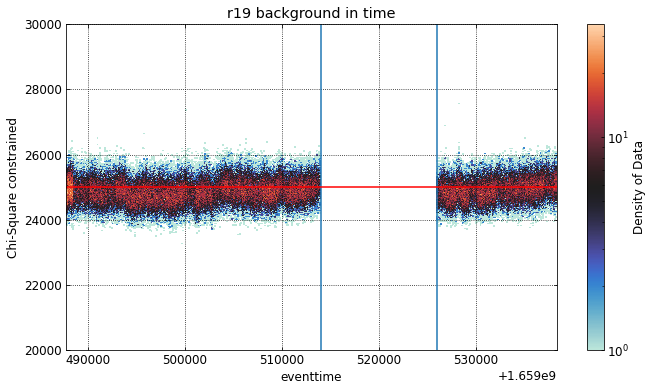

In [379]:
fig, ax = dp.densityplot(
    df_r19nos.eventtime,
    df_r19nos.ofchi2_constrained_CPDv21Ge,
    cut=ctrigger_r19nos&clowchi2_r19nos&cgoodtime_r19nosv3,
    ylims=[2e4, 3e4],
    #xlims=[0, 1e-7],
)
ax.axvline(514000+1.659e9)
ax.axvline(526000+1.659e9)

ax.set_title('r19 background in time')
ax.set_ylabel(r'Chi-Square constrained')
ax.set_xlabel(r'eventtime')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
ax.axhline((fs*tracelength), c='r')

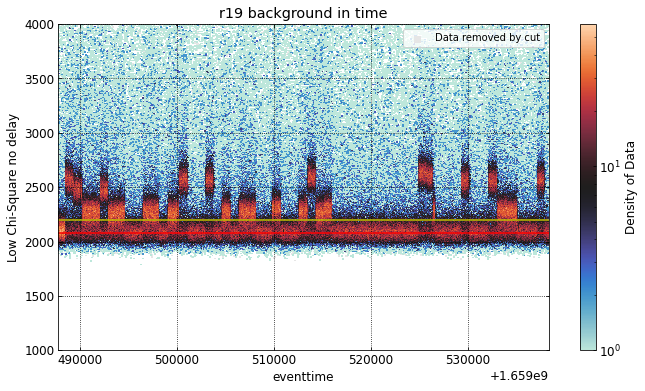

In [400]:
fig, ax = dp.densityplot(
    df_r19nos.eventtime,
    df_r19nos.ofchi2low_nodelay_CPDv21Ge,
    cut=ctrigger_r19nos,
    ylims=[1e3, 4e3],
    plot_cut_data=True,
    #xlims=[0, 1e-7],
)
ax.axvline(44000+1.6669e9)

ax.set_title('r19 background in time')
ax.set_ylabel(r'Low Chi-Square no delay')
ax.set_xlabel(r'eventtime')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)

ax.axhline((fs*tracelength), c='r')
ax.axhline(lowfreqmean, c='r')
ax.axhline(2200, c='y')


## r20 nos

In [56]:
#defining our times

ctime_mid_1 = ((df_nos.eventtime>781250+1.662e9)&(df_nos.eventtime<782500+1.662e9))
ctime_mid_2 = ((df_nos.eventtime>789600+1.662e9)&(df_nos.eventtime<790630+1.662e9))
ctime_mid_3 = ((df_nos.eventtime>791700+1.662e9)&(df_nos.eventtime<792700+1.662e9))
ctime_mid_4 = ((df_nos.eventtime>795300+1.662e9)&(df_nos.eventtime<798000+1.662e9))
ctime_mid_5 = ((df_nos.eventtime>800900+1.662e9)&(df_nos.eventtime<804500+1.662e9))
ctime_mid_6 = ((df_nos.eventtime>779200+1.662e9)&(df_nos.eventtime<780300+1.662e9))
cgoodtime_nos = (np.invert(ctime_mid_1) & np.invert(ctime_mid_2) & np.invert(ctime_mid_3) 
             & np.invert(ctime_mid_4) & np.invert(ctime_mid_5) & np.invert(ctime_mid_6))


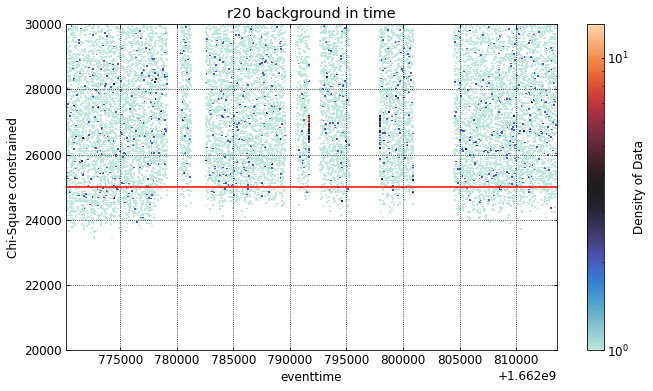

In [556]:
fig, ax = dp.densityplot(
    df_nos.eventtime,
    df_nos.ofchi2_constrained_CPDv21Ge,
    cut=ctrigger_nos&cgoodtime_nos&cbaseline_nos&cchi2_temp_nos,
    ylims=[2e4, 3e4],
    #xlims=[0, 1e-7],
)
ax.axvline(514000+1.659e9)
ax.axvline(526000+1.659e9)

ax.set_title('r20 background in time')
ax.set_ylabel(r'Chi-Square constrained')
ax.set_xlabel(r'eventtime')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
ax.axhline((fs*tracelength), c='r')

## r21 Co

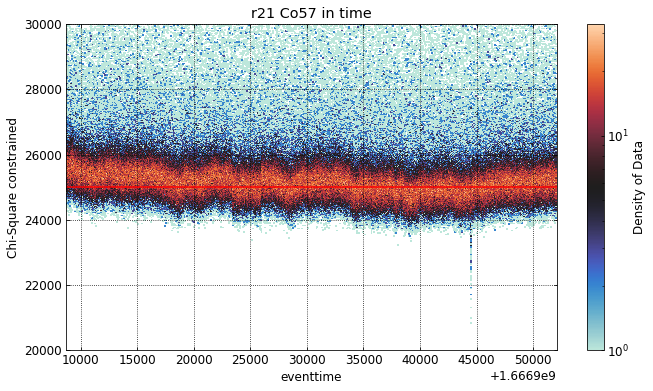

In [75]:
fig, ax = dp.densityplot(
    df.eventtime,
    df.ofchi2_constrained_CPDv21Ge,
    cut=ctrigger,
    ylims=[2e4, 3e4],
    #xlims=[0, 1e-7],
)
ax.set_title('r21 Co57 in time')
ax.set_ylabel(r'Chi-Square constrained')
ax.set_xlabel(r'eventtime')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
ax.axhline((fs*tracelength), c='r')

In [80]:
delf = fs/25000
lowfreqmean = (51889/delf)*2
sigchi = np.sqrt(2*lowfreqmean)
print(sigchi)

64.42918593308471


In [665]:
ctime = dp.inrange(df.eventtime, -np.inf, 44000+1.6669e9)

c_lowchi2 = dp.inrange(df.ofchi2low_nodelay_CPDv21Ge, -np.inf, 2350)
c_lowchi2_upper = dp.inrange(df.ofchi2low_nodelay_CPDv21Ge, 2250, 3000)

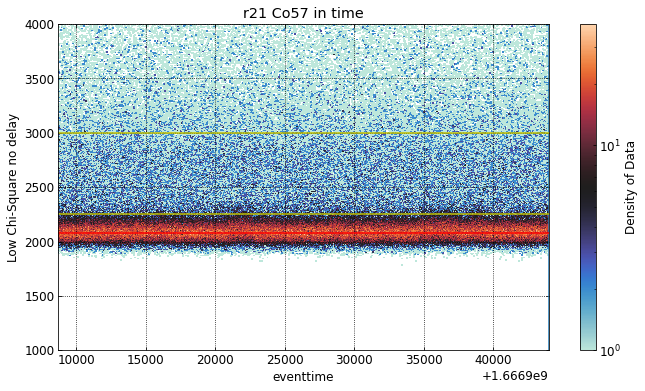

In [180]:
fig, ax = dp.densityplot(
    df.eventtime,
    df.ofchi2low_nodelay_CPDv21Ge,
    cut=ctrigger&ctime,
    ylims=[1e3, 4e3],
    #xlims=[0, 1e-7],
)
ax.axvline(44000+1.6669e9)

ax.set_title('r21 Co57 in time')
ax.set_ylabel(r'Low Chi-Square no delay')
ax.set_xlabel(r'eventtime')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)

ax.axhline((fs*tracelength), c='r')
ax.axhline(lowfreqmean, c='r')
ax.axhline(2250, c='y')
ax.axhline(3000, c='y')

## r21 nos

In [458]:
c_lowchi2_nosr21 = dp.inrange(df_nosr21.ofchi2low_nodelay_CPDv21Ge, -np.inf, 2450)


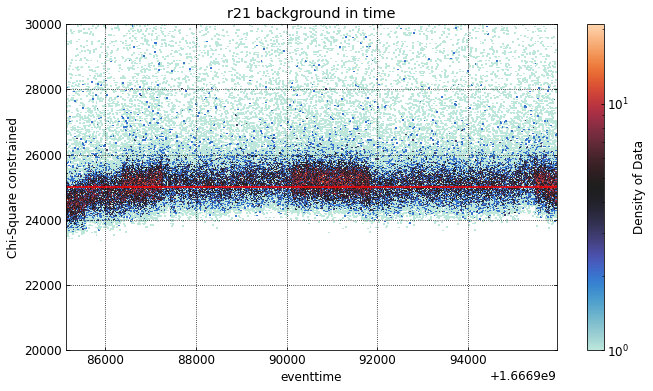

In [381]:
fig, ax = dp.densityplot(
    df_nosr21.eventtime,
    df_nosr21.ofchi2_constrained_CPDv21Ge,
    cut=ctrigger_nosr21,
    ylims=[2e4, 3e4],
    #xlims=[0, 1e-7],
)

ax.vline()
ax.set_title('r21 background in time')
ax.set_ylabel(r'Chi-Square constrained')
ax.set_xlabel(r'eventtime')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
ax.axhline((fs*tracelength), c='r')

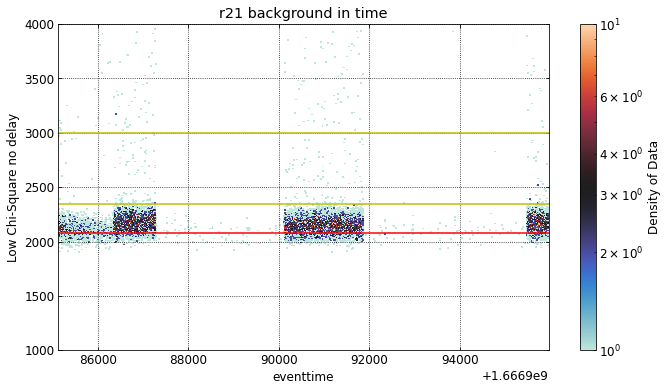

In [408]:
fig, ax = dp.densityplot(
    df_nosr21.eventtime,
    df_nosr21.ofchi2low_nodelay_CPDv21Ge,
    cut=ctrigger_nosr21&ctemp_r21_lowpop,
    ylims=[1e3, 4e3],
    #xlims=[0, 1e-7],
)
ax.axvline(44000+1.6669e9)

ax.set_title('r21 background in time')
ax.set_ylabel(r'Low Chi-Square no delay')
ax.set_xlabel(r'eventtime')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)

ax.axhline((fs*tracelength), c='r')
ax.axhline(lowfreqmean, c='r')
ax.axhline(2350, c='y')
ax.axhline(3000, c='y')

## r20 Co

In [57]:
ctime_mid_1 = ((df_Co.eventtime>23600+1.6631e9)&(df_Co.eventtime<24600+1.6631e9))
ctime_mid_2 = ((df_Co.eventtime>26500+1.6631e9)&(df_Co.eventtime<27500+1.6631e9))
ctime_mid_3 = ((df_Co.eventtime>28500+1.6631e9)&(df_Co.eventtime<29500+1.6631e9))
ctime_mid_4 = ((df_Co.eventtime>38200+1.6631e9)&(df_Co.eventtime<39200+1.6631e9))
ctime_mid_5 = ((df_Co.eventtime>39800+1.6631e9)&(df_Co.eventtime<40900+1.6631e9))
cgoodtime_Co = (np.invert(ctime_mid_1) & np.invert(ctime_mid_2) & np.invert(ctime_mid_3) & 
             np.invert(ctime_mid_4) & np.invert(ctime_mid_5))

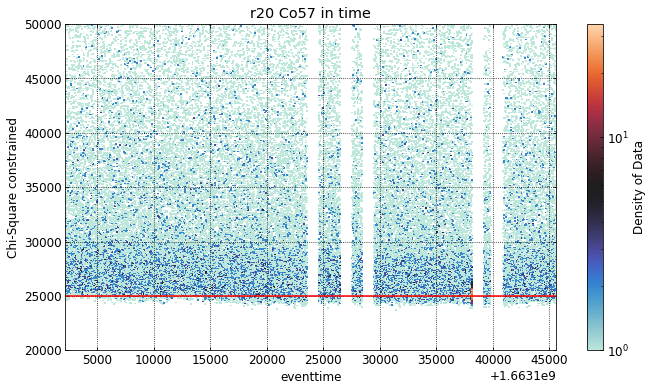

In [650]:
fig, ax = dp.densityplot(
    df_Co.eventtime,
    df_Co.ofchi2_constrained_CPDv21Ge,
    cut=ctrigger_Co&cgoodtime_Co,
    ylims=[2e4, 5e4],
    #xlims=[0, 1e-7],
)
ax.set_title('r20 Co57 in time')
ax.set_ylabel(r'Chi-Square constrained')
ax.set_xlabel(r'eventtime')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
ax.axhline((fs*tracelength), c='r')

## r18 both frames

In [470]:
ctime_r18lownoise = dp.inrange(df_both.eventtime_gaas, 89000+1.6564e9, 90000+1.6564e9) 
ctime_r18gelowchi2 = dp.inrange(df_both.ofchi2low_nodelay_CPDv21Ge_ge, -np.inf, 2450)
ctime_r18gaaslowchi2 = dp.inrange(df_both.ofchi2low_nodelay_CPDv21Ge_gaas, -np.inf, 2450)
cgoodtime_r18 = (np.invert(ctime_r18lownoise)&dp.inrange(df_both.eventtime_gaas, -np.inf, 90500+1.6564e9))

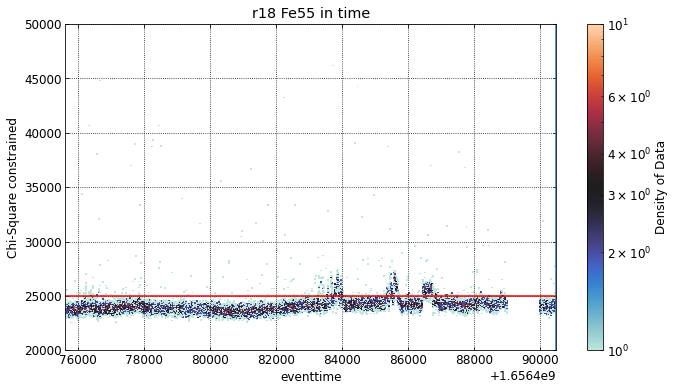

In [555]:
fig, ax = dp.densityplot(
    df_both.eventtime_gaas,
    df_both.ofchi2_constrained_CPDv21Ge_gaas,
    cut=ctrigger_both&cgoodtime_r18&ctemp_r18bgaas_lowpop,
    ylims=[2e4, 5e4],
    #xlims=[0, 1e-7],
)
ax.set_title('r18 Fe55 in time')
ax.set_ylabel(r'Chi-Square constrained')
ax.set_xlabel(r'eventtime')
ax.axvline(90500+1.6564e9)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
ax.axhline((fs*tracelength), c='r')

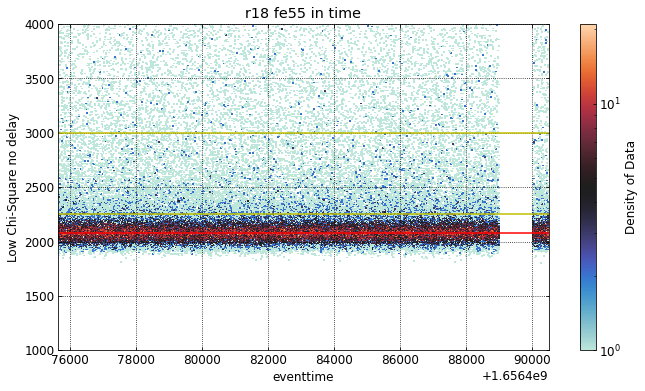

In [865]:
fig, ax = dp.densityplot(
    df_both.eventtime_gaas,
    df_both.ofchi2low_nodelay_CPDv21Ge_gaas,
    cut=ctrigger_both&cgoodtime_r18,
    ylims=[1e3, 4e3],
    #xlims=[0, 1e-7],
)
ax.axvline(44000+1.6669e9)

ax.set_title('r18 fe55 in time')
ax.set_ylabel(r'Low Chi-Square no delay')
ax.set_xlabel(r'eventtime')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)

ax.axhline((fs*tracelength), c='r')
ax.axhline(lowfreqmean, c='r')
ax.axhline(2250, c='y')
ax.axhline(3000, c='y')

## r21nos both frames

In [59]:
c_lowchi2_bnosr21 = dp.inrange(df_both_nos.ofchi2low_nodelay_CPDv21Ge_gaas, -np.inf, 2250)
c_lowchi2_bgenosr21 = dp.inrange(df_both_nos.ofchi2low_nodelay_CPDv21Ge_ge, -np.inf, 2350)


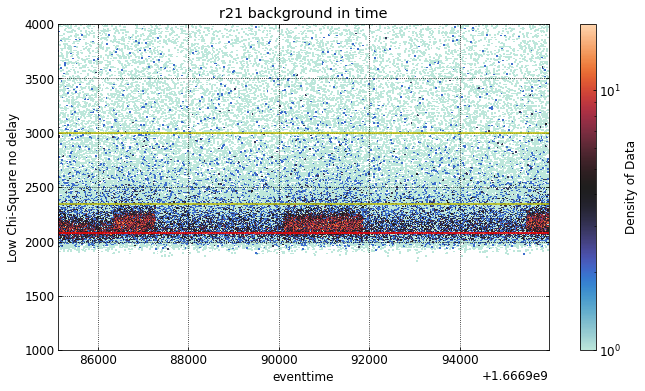

In [796]:
fig, ax = dp.densityplot(
    df_both_nos.eventtime_ge,
    df_both_nos.ofchi2low_nodelay_CPDv21Ge_ge,
    cut=ctrigger_both_nos,
    ylims=[1e3, 4e3],
    #xlims=[0, 1e-7],
)
ax.axvline(44000+1.6669e9)

ax.set_title('r21 background in time')
ax.set_ylabel(r'Low Chi-Square no delay')
ax.set_xlabel(r'eventtime')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)

ax.axhline((fs*tracelength), c='r')
ax.axhline(lowfreqmean, c='r')
ax.axhline(2350, c='y')
ax.axhline(3000, c='y')

# Baseline

## r19 nos

In [380]:
#more rigorous baseline cut
#binning the event time into 400s bins and then finding baseline cut that cuts 10% of high end of baseline in each bin
import math
start_time=df_r19nos.eventtime[ctrigger_r19nos].iloc[0]
binsize=400 #size in seconds of each bin used to partition eventtime for baseline cutting
binnumber=tot_runtime_r19nos/binsize

cbaseline_list=np.empty(math.ceil(binnumber),dtype='object')

for i in range(math.floor(binnumber)):
    ctime_temp = dp.inrange(df_r19nos.eventtime,(binsize*i)+start_time,(binsize*(i+1))+start_time)
    cut_value=np.percentile(df_r19nos.baseline_CPDv21Ge[ctime_temp],85)
    cbaseline_list[i]=dp.inrange(df_r19nos.baseline_CPDv21Ge,-np.inf,cut_value)&ctime_temp

if math.floor(binnumber)!=math.ceil(binnumber): #this fills in the cut for the last time bin, which isn't the full length of the other time bins unless your bin size perfectly divides your total time 
    ctime_temp=dp.inrange(df_r19nos.eventtime,(binsize*math.floor(binnumber))+start_time,start_time+tot_runtime_r19nos)
    cut_value=np.percentile(df_r19nos.baseline_CPDv21Ge[ctime_temp],85)
    cbaseline_list[-1]=dp.inrange(df_r19nos.baseline_CPDv21Ge,-np.inf,cut_value)&ctime_temp

In [381]:
#more rigorous baseline cut
cbaseline_r19nos=cbaseline_list[0]
for i in range(len(cbaseline_list)):
    cbaseline_r19nos=cbaseline_r19nos|cbaseline_list[i] #this takes all the baseline cuts from the previous step and bitwise ORs them into one cut


## r20 nos

In [60]:
#more rigorous baseline cut
#binning the event time into 400s bins and then finding baseline cut that cuts 10% of high end of baseline in each bin
import math
start_time=df_nos.eventtime[ctrigger_nos].iloc[0]
binsize=400 #size in seconds of each bin used to partition eventtime for baseline cutting
binnumber=tot_runtime_nos/binsize

cbaseline_list=np.empty(math.ceil(binnumber),dtype='object')

for i in range(math.floor(binnumber)):
    ctime_temp = dp.inrange(df_nos.eventtime,(binsize*i)+start_time,(binsize*(i+1))+start_time)
    cut_value=np.percentile(df_nos.baseline_CPDv21Ge[ctime_temp],70)
    cbaseline_list[i]=dp.inrange(df_nos.baseline_CPDv21Ge,-np.inf,cut_value)&ctime_temp

if math.floor(binnumber)!=math.ceil(binnumber): #this fills in the cut for the last time bin, which isn't the full length of the other time bins unless your bin size perfectly divides your total time 
    ctime_temp=dp.inrange(df_nos.eventtime,(binsize*math.floor(binnumber))+start_time,start_time+tot_runtime_nos)
    cut_value=np.percentile(df_nos.baseline_CPDv21Ge[ctime_temp],70)
    cbaseline_list[-1]=dp.inrange(df_nos.baseline_CPDv21Ge,-np.inf,cut_value)&ctime_temp

In [61]:
#more rigorous baseline cut
cbaseline_nos=cbaseline_list[0]
for i in range(len(cbaseline_list)):
    cbaseline_nos=cbaseline_nos|cbaseline_list[i] #this takes all the baseline cuts from the previous step and bitwise ORs them into one cut


## r21 Co

In [40]:
#more rigorous baseline cut
#binning the event time into 400s bins and then finding baseline cut that cuts 10% of high end of baseline in each bin
import math
start_time=df.eventtime[ctrigger].iloc[0]
binsize=400 #size in seconds of each bin used to partition eventtime for baseline cutting
binnumber=tot_runtime/binsize

cbaseline_list=np.empty(math.ceil(binnumber),dtype='object')

for i in range(math.floor(binnumber)):
    ctime_temp = dp.inrange(df.eventtime,(binsize*i)+start_time,(binsize*(i+1))+start_time)
    cut_value=np.percentile(df.baseline_CPDv21Ge[ctime_temp],85)
    cbaseline_list[i]=dp.inrange(df.baseline_CPDv21Ge,-np.inf,cut_value)&ctime_temp

if math.floor(binnumber)!=math.ceil(binnumber): #this fills in the cut for the last time bin, which isn't the full length of the other time bins unless your bin size perfectly divides your total time 
    ctime_temp=dp.inrange(df.eventtime,(binsize*math.floor(binnumber))+start_time,start_time+tot_runtime)
    cut_value=np.percentile(df.baseline_CPDv21Ge[ctime_temp],85)
    cbaseline_list[-1]=dp.inrange(df.baseline_CPDv21Ge,-np.inf,cut_value)&ctime_temp

In [41]:
#more rigorous baseline cut
cbaseline=cbaseline_list[0]
for i in range(len(cbaseline_list)):
    cbaseline=cbaseline|cbaseline_list[i] #this takes all the baseline cuts from the previous step and bitwise ORs them into one cut


Text(0.5, 1.0, 'Baseline Cut')

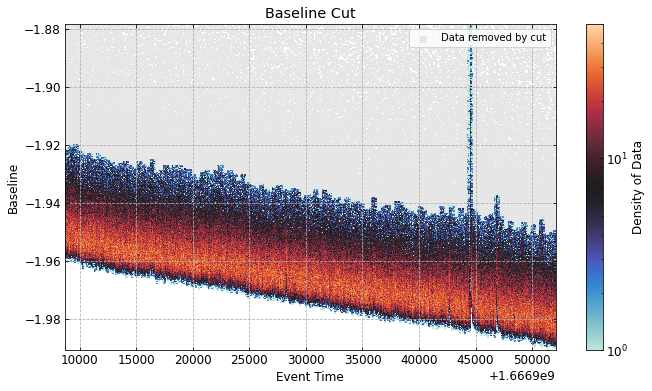

In [84]:
fig, ax = dp.densityplot(
    df.eventtime,
    df.baseline_CPDv21Ge*1e6,
    cut=cbaseline,
    #ylims=(-1.5,-1),
    plot_cut_data = True
    )
ax.set_xlabel('Event Time')
ax.set_ylabel('Baseline')
ax.set_title('Baseline Cut')

1419620.4780935382 1/V
0.005905109494434369


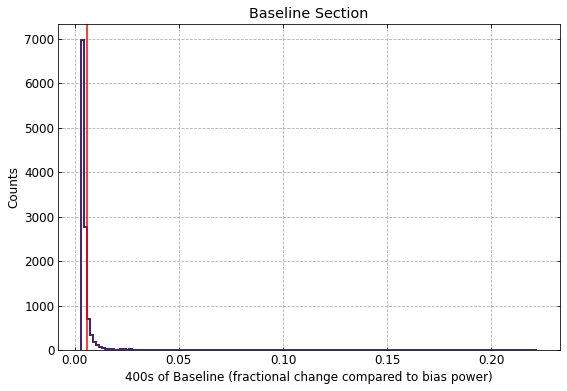

In [85]:
# checking baseline gaussian distribution for tail location to confirm percentage choice
# looking at scale in fractional change to bias power
#-1/i0[A]*(Rsh[Ohms]-R0[Ohms]
start_time=df.eventtime[ctrigger].iloc[0]
dIdP_zero = -1/(11.439e-6*((4+5)*1e-3-70.58e-3))#1/V
P0  =  9.1e-12
print(dIdP_zero, "1/V")
i=4
binsize1 = 400
ctime_temp_plotting = dp.inrange(df.eventtime,(binsize1*i)+start_time,(binsize1*(i+1))+start_time)
cut_value_plotting=np.percentile(df.baseline_CPDv21Ge[ctime_temp_plotting],85)
fig, ax = dp.hist(
    (df.baseline_CPDv21Ge+2e-6)/dIdP_zero/P0,
    cuts=ctime_temp_plotting,
    lgcrawdata=False,
    #xlims=(-0.04e-6/dIdP_zero/P0,0.05e-6/dIdP_zero/P0),
    labeldict = {'title' : 'Baseline Section',
                'xlabel' : '400s of Baseline (fractional change compared to bias power)',
                'ylabel' : 'Counts',
                },
    lgclegend=False,
    nbins=150
)
ax.set_yscale('linear')
ax.axvline((cut_value_plotting+2e-6)/dIdP_zero/P0,color='red')
print((cut_value_plotting+2e-6)/dIdP_zero/P0)

## r21 background

In [62]:
#more rigorous baseline cut
#binning the event time into 400s bins and then finding baseline cut that cuts 10% of high end of baseline in each bin
import math
start_time=df_nosr21.eventtime[ctrigger_nosr21].iloc[0]
binsize=400 #size in seconds of each bin used to partition eventtime for baseline cutting
binnumber=tot_runtime_nosr21/binsize

cbaseline_list=np.empty(math.ceil(binnumber),dtype='object')

for i in range(math.floor(binnumber)):
    ctime_temp = dp.inrange(df_nosr21.eventtime,(binsize*i)+start_time,(binsize*(i+1))+start_time)
    cut_value=np.percentile(df_nosr21.baseline_CPDv21Ge[ctime_temp],85)
    cbaseline_list[i]=dp.inrange(df_nosr21.baseline_CPDv21Ge,-np.inf,cut_value)&ctime_temp

if math.floor(binnumber)!=math.ceil(binnumber): #this fills in the cut for the last time bin, which isn't the full length of the other time bins unless your bin size perfectly divides your total time 
    ctime_temp=dp.inrange(df_nosr21.eventtime,(binsize*math.floor(binnumber))+start_time,start_time+tot_runtime_nosr21)
    cut_value=np.percentile(df_nosr21.baseline_CPDv21Ge[ctime_temp],85)
    cbaseline_list[-1]=dp.inrange(df_nosr21.baseline_CPDv21Ge,-np.inf,cut_value)&ctime_temp

In [63]:
#more rigorous baseline cut
cbaseline_nosr21=cbaseline_list[0]
for i in range(len(cbaseline_list)):
    cbaseline_nosr21=cbaseline_nosr21|cbaseline_list[i] #this takes all the baseline cuts from the previous step and bitwise ORs them into one cut


Text(0.5, 1.0, 'Baseline Cut')

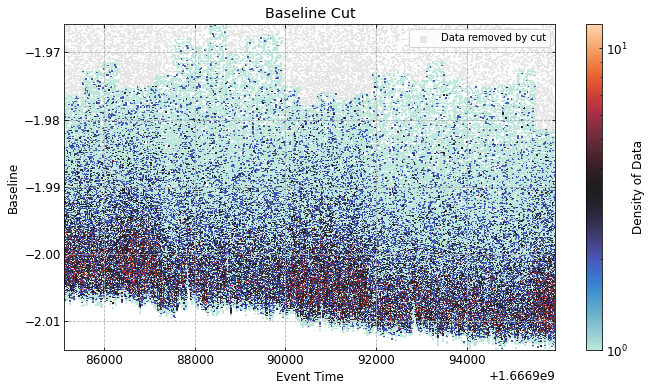

In [207]:
fig, ax = dp.densityplot(
    df_nosr21.eventtime,
    df_nosr21.baseline_CPDv21Ge*1e6,
    cut=cbaseline_nosr21,
    #ylims=(-1.5,-1),
    plot_cut_data = True
    )
ax.set_xlabel('Event Time')
ax.set_ylabel('Baseline')
ax.set_title('Baseline Cut')

1419620.4780935382 1/V
0.0034808067910732407


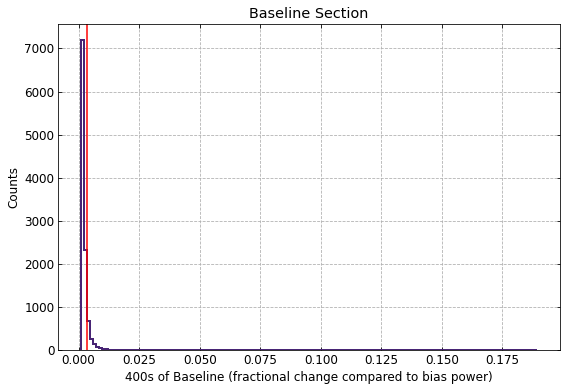

In [208]:
# checking baseline gaussian distribution for tail location to confirm percentage choice
# looking at scale in fractional change to bias power
#-1/i0[A]*(Rsh[Ohms]-R0[Ohms]
start_time=df_nosr21.eventtime[ctrigger_nosr21].iloc[0]
dIdP_zero = -1/(11.439e-6*((4+5)*1e-3-70.58e-3))#1/V
P0  =  9.1e-12
print(dIdP_zero, "1/V")
i=4
binsize1 = 400
ctime_temp_plotting = dp.inrange(df_nosr21.eventtime,(binsize1*i)+start_time,(binsize1*(i+1))+start_time)
cut_value_plotting=np.percentile(df_nosr21.baseline_CPDv21Ge[ctime_temp_plotting],85)
fig, ax = dp.hist(
    (df_nosr21.baseline_CPDv21Ge+2.02e-6)/dIdP_zero/P0,
    cuts=ctime_temp_plotting,
    lgcrawdata=False,
    #xlims=(-0.04e-6/dIdP_zero/P0,0.05e-6/dIdP_zero/P0),
    labeldict = {'title' : 'Baseline Section',
                'xlabel' : '400s of Baseline (fractional change compared to bias power)',
                'ylabel' : 'Counts',
                },
    lgclegend=False,
    nbins=150
)
ax.set_yscale('linear')
ax.axvline((cut_value_plotting+2.02e-6)/dIdP_zero/P0,color='red')
print((cut_value_plotting+2.02e-6)/dIdP_zero/P0)

## r20 Co

In [64]:
#more rigorous baseline cut
#binning the event time into 400s bins and then finding baseline cut that cuts 10% of high end of baseline in each bin
import math
start_time=df_Co.eventtime[ctrigger_Co].iloc[0]
binsize=400 #size in seconds of each bin used to partition eventtime for baseline cutting
binnumber=tot_runtime_Co/binsize

cbaseline_list=np.empty(math.ceil(binnumber),dtype='object')

for i in range(math.floor(binnumber)):
    ctime_temp = dp.inrange(df_Co.eventtime,(binsize*i)+start_time,(binsize*(i+1))+start_time)
    cut_value=np.percentile(df_Co.baseline_CPDv21Ge[ctime_temp],90)
    cbaseline_list[i]=dp.inrange(df_Co.baseline_CPDv21Ge,-np.inf,cut_value)&ctime_temp

if math.floor(binnumber)!=math.ceil(binnumber): #this fills in the cut for the last time bin, which isn't the full length of the other time bins unless your bin size perfectly divides your total time 
    ctime_temp=dp.inrange(df_Co.eventtime,(binsize*math.floor(binnumber))+start_time,start_time+tot_runtime_Co)
    cut_value=np.percentile(df_Co.baseline_CPDv21Ge[ctime_temp],90)
    cbaseline_list[-1]=dp.inrange(df_Co.baseline_CPDv21Ge,-np.inf,cut_value)&ctime_temp

In [65]:
#more rigorous baseline cut
cbaseline_Co=cbaseline_list[0]
for i in range(len(cbaseline_list)):
    cbaseline_Co=cbaseline_Co|cbaseline_list[i] #this takes all the baseline cuts from the previous step and bitwise ORs them into one cut


Text(0.5, 1.0, 'Baseline Cut')

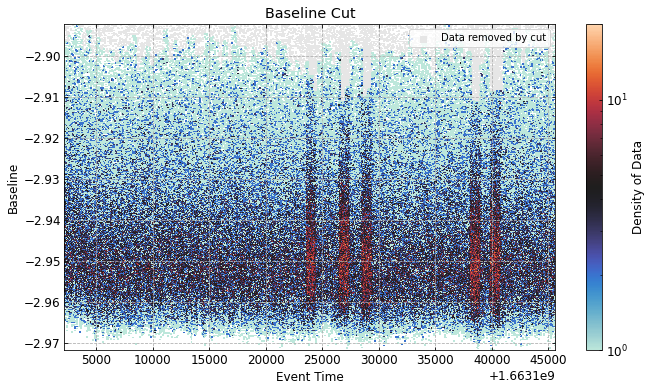

In [727]:
fig, ax = dp.densityplot(
    df_Co.eventtime,
    df_Co.baseline_CPDv21Ge*1e6,
    cut=cbaseline_Co,
    #ylims=(-1.5,-1),
    plot_cut_data = True
    )
ax.set_xlabel('Event Time')
ax.set_ylabel('Baseline')
ax.set_title('Baseline Cut')

## r18 both frames

In [66]:
#more rigorous baseline cut
#binning the event time into 400s bins and then finding baseline cut that cuts 10% of high end of baseline in each bin
import math
start_time=df_both.eventtime_gaas[ctrigger_both].iloc[0]
binsize=400 #size in seconds of each bin used to partition eventtime for baseline cutting
binnumber=tot_runtime_both/binsize

cbaseline_list=np.empty(math.ceil(binnumber),dtype='object')

for i in range(math.floor(binnumber)):
    ctime_temp = dp.inrange(df_both.eventtime_gaas,(binsize*i)+start_time,(binsize*(i+1))+start_time)
    cut_value=np.percentile(df_both.baseline_CPDv21Ge_gaas[ctime_temp],85)
    cbaseline_list[i]=dp.inrange(df_both.baseline_CPDv21Ge_gaas,-np.inf,cut_value)&ctime_temp

if math.floor(binnumber)!=math.ceil(binnumber): #this fills in the cut for the last time bin, which isn't the full length of the other time bins unless your bin size perfectly divides your total time 
    ctime_temp=dp.inrange(df_both.eventtime_gaas,(binsize*math.floor(binnumber))+start_time,start_time+tot_runtime_both)
    cut_value=np.percentile(df_both.baseline_CPDv21Ge_gaas[ctime_temp],85)
    cbaseline_list[-1]=dp.inrange(df_both.baseline_CPDv21Ge_gaas,-np.inf,cut_value)&ctime_temp

In [67]:
#more rigorous baseline cut
cbaseline_bgaas=cbaseline_list[0]
for i in range(len(cbaseline_list)):
    cbaseline_bgaas=cbaseline_bgaas|cbaseline_list[i] #this takes all the baseline cuts from the previous step and bitwise ORs them into one cut


In [68]:
#more rigorous baseline cut
#binning the event time into 400s bins and then finding baseline cut that cuts 10% of high end of baseline in each bin
import math
start_time=df_both.eventtime_gaas[ctrigger_both].iloc[0]
binsize=400 #size in seconds of each bin used to partition eventtime for baseline cutting
binnumber=tot_runtime_both/binsize

cbaseline_list=np.empty(math.ceil(binnumber),dtype='object')

for i in range(math.floor(binnumber)):
    ctime_temp = dp.inrange(df_both.eventtime_gaas,(binsize*i)+start_time,(binsize*(i+1))+start_time)
    cut_value=np.percentile(df_both.baseline_CPDv21Ge_ge[ctime_temp],85)
    cbaseline_list[i]=dp.inrange(df_both.baseline_CPDv21Ge_ge,-np.inf,cut_value)&ctime_temp

if math.floor(binnumber)!=math.ceil(binnumber): #this fills in the cut for the last time bin, which isn't the full length of the other time bins unless your bin size perfectly divides your total time 
    ctime_temp=dp.inrange(df_both.eventtime_gaas,(binsize*math.floor(binnumber))+start_time,start_time+tot_runtime_both)
    cut_value=np.percentile(df_both.baseline_CPDv21Ge_ge[ctime_temp],85)
    cbaseline_list[-1]=dp.inrange(df_both.baseline_CPDv21Ge_ge,-np.inf,cut_value)&ctime_temp

In [69]:
#more rigorous baseline cut
cbaseline_bge=cbaseline_list[0]
for i in range(len(cbaseline_list)):
    cbaseline_bge=cbaseline_bge|cbaseline_list[i] #this takes all the baseline cuts from the previous step and bitwise ORs them into one cut


Text(0.5, 1.0, 'Baseline Cut')

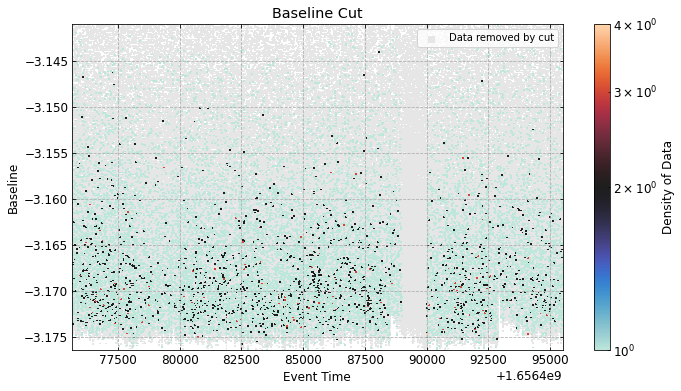

In [538]:
fig, ax = dp.densityplot(
    df_both.eventtime_gaas,
    df_both.baseline_CPDv21Ge_gaas*1e6,
    cut=ctrigger_both&cgoodtime_r18&cbaseline_bgaas&cchi2_temp_bgaas&ctemp_r18bgaas_lowpop,
    #ylims=(-1.5,-1),
    plot_cut_data = True
    )
ax.set_xlabel('Event Time')
ax.set_ylabel('Baseline')
ax.set_title('Baseline Cut')

## r21nos both frames

In [70]:
#more rigorous baseline cut
#binning the event time into 400s bins and then finding baseline cut that cuts 10% of high end of baseline in each bin
import math
start_time=df_both_nos.eventtime_gaas[ctrigger_both_nos].iloc[0]
binsize=400 #size in seconds of each bin used to partition eventtime for baseline cutting
binnumber=tot_runtime_both_nos/binsize

cbaseline_list=np.empty(math.ceil(binnumber),dtype='object')

for i in range(math.floor(binnumber)):
    ctime_temp = dp.inrange(df_both_nos.eventtime_gaas,(binsize*i)+start_time,(binsize*(i+1))+start_time)
    cut_value=np.percentile(df_both_nos.baseline_CPDv21Ge_gaas[ctime_temp],85)
    cbaseline_list[i]=dp.inrange(df_both_nos.baseline_CPDv21Ge_gaas,-np.inf,cut_value)&ctime_temp

if math.floor(binnumber)!=math.ceil(binnumber): #this fills in the cut for the last time bin, which isn't the full length of the other time bins unless your bin size perfectly divides your total time 
    ctime_temp=dp.inrange(df_both_nos.eventtime_gaas,(binsize*math.floor(binnumber))+start_time,start_time+tot_runtime_both_nos)
    cut_value=np.percentile(df_both_nos.baseline_CPDv21Ge_gaas[ctime_temp],85)
    cbaseline_list[-1]=dp.inrange(df_both_nos.baseline_CPDv21Ge_gaas,-np.inf,cut_value)&ctime_temp

In [71]:
#more rigorous baseline cut
cbaseline_nosbgaas=cbaseline_list[0]
for i in range(len(cbaseline_list)):
    cbaseline_nosbgaas=cbaseline_nosbgaas|cbaseline_list[i] #this takes all the baseline cuts from the previous step and bitwise ORs them into one cut


In [72]:
#more rigorous baseline cut
#binning the event time into 400s bins and then finding baseline cut that cuts 10% of high end of baseline in each bin
import math
start_time=df_both_nos.eventtime_gaas[ctrigger_both_nos].iloc[0]
binsize=400 #size in seconds of each bin used to partition eventtime for baseline cutting
binnumber=tot_runtime_both_nos/binsize

cbaseline_list=np.empty(math.ceil(binnumber),dtype='object')

for i in range(math.floor(binnumber)):
    ctime_temp = dp.inrange(df_both_nos.eventtime_gaas,(binsize*i)+start_time,(binsize*(i+1))+start_time)
    cut_value=np.percentile(df_both_nos.baseline_CPDv21Ge_ge[ctime_temp],85)
    cbaseline_list[i]=dp.inrange(df_both_nos.baseline_CPDv21Ge_ge,-np.inf,cut_value)&ctime_temp

if math.floor(binnumber)!=math.ceil(binnumber): #this fills in the cut for the last time bin, which isn't the full length of the other time bins unless your bin size perfectly divides your total time 
    ctime_temp=dp.inrange(df_both_nos.eventtime_gaas,(binsize*math.floor(binnumber))+start_time,start_time+tot_runtime_both_nos)
    cut_value=np.percentile(df_both_nos.baseline_CPDv21Ge_ge[ctime_temp],85)
    cbaseline_list[-1]=dp.inrange(df_both_nos.baseline_CPDv21Ge_ge,-np.inf,cut_value)&ctime_temp

In [73]:
#more rigorous baseline cut
cbaseline_nosbge=cbaseline_list[0]
for i in range(len(cbaseline_list)):
    cbaseline_nosbge=cbaseline_nosbge|cbaseline_list[i] #this takes all the baseline cuts from the previous step and bitwise ORs them into one cut


# Energy dependent chi2

## r19 nos

In [837]:
m_strict = 300
b_strict = 30000

m_loose = 1.7e3
b_loose = 161000 

m_loose2 = 4500
b_loose2 = 260000

x_loose_fittingcalib2=np.arange(40,90,0.1)
x_loose_fittingcalib=np.arange(20,40,0.1)
x_fitting_strictcalb = np.arange(0,20,0.1)

y_loose_parabcalib2=b_loose2+m_loose2*(x_loose_fittingcalib2-40)**2 
y_loose_parabcalib=b_loose+m_loose*(x_loose_fittingcalib-20) 
y_strict_parabcalib = b_strict+m_strict*x_fitting_strictcalb**2

temp_func = lambda x, m, b: m * x**2 + b
temp_func2 = lambda x, m, b: m * (x-40)**2 + b
temp_func3 = lambda x, m, b: m * (x-20) + b


#ctemp_strict = (((df.ofchi2_unconstrained_CPDv21Ge < temp_func(calibratedofamp_uncon, m_strict, b_strict)))&
#            dp.inrange(calibratedofamp_uncon,0,37))


In [838]:
#keeping everything above 110 kev
conetwentyup = dp.inrange(calibratedofamp_r19nos_constrained,80,np.inf)
#csixty_110 = dp.inrange(calibratedofamp_constrained,60,110)
cchi2_lowchi_r19 = (clowchi2_r19nos&dp.inrange(calibratedofamp_r19nos_constrained, -np.inf, 3))
cchi2_strict = (((df_r19nos.ofchi2_constrained_CPDv21Ge < temp_func(calibratedofamp_r19nos_constrained,
                                                             m_strict, b_strict)))&
            dp.inrange(calibratedofamp_r19nos_constrained,3,20))
cchi2_strict2 = (((df_r19nos.ofchi2_constrained_CPDv21Ge < temp_func3(calibratedofamp_r19nos_constrained,
                                                             m_loose, b_loose)))&
            dp.inrange(calibratedofamp_r19nos_constrained,20,40))
cchi2_strict3 = (((df_r19nos.ofchi2_constrained_CPDv21Ge < temp_func2(calibratedofamp_r19nos_constrained,
                                                             m_loose2, b_loose2)))&
            dp.inrange(calibratedofamp_r19nos_constrained,40,80))
cchi2_temp_r19nos = ((cchi2_lowchi_r19| cchi2_strict | cchi2_strict2 | cchi2_strict3) | conetwentyup)


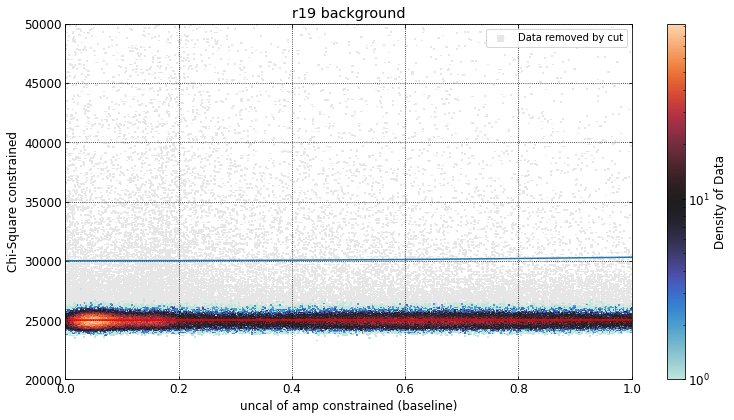

In [850]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    calibratedenergy_r19nos,
    df_r19nos.ofchi2_constrained_CPDv21Ge,
    cut=ctrigger_r19nos&cbaseline_r19nos&np.invert(c_temp_r19noslowpop)&cchi2_temp_r19nos,
    #basecut=ctrigger_r19nos&cbaseline_r19nos&np.invert(c_temp_r19noslowpop)&cchi2_temp_r19nos,
    plot_cut_data=True,
    ylims=[2e4, 5e4],
    xlims=[0, 1],
)
ax.set_title('r19 background')
ax.set_ylabel(r'Chi-Square constrained')
ax.set_xlabel(r'uncal of amp constrained (baseline)')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)

ax.axhline((fs*tracelength), c='r')
ax.plot(x_fitting_strictcalb, y_strict_parabcalib)
ax.plot(x_loose_fittingcalib, y_loose_parabcalib)
ax.plot(x_loose_fittingcalib2, y_loose_parabcalib2)
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30m_energyabscal_chi2_uncon_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

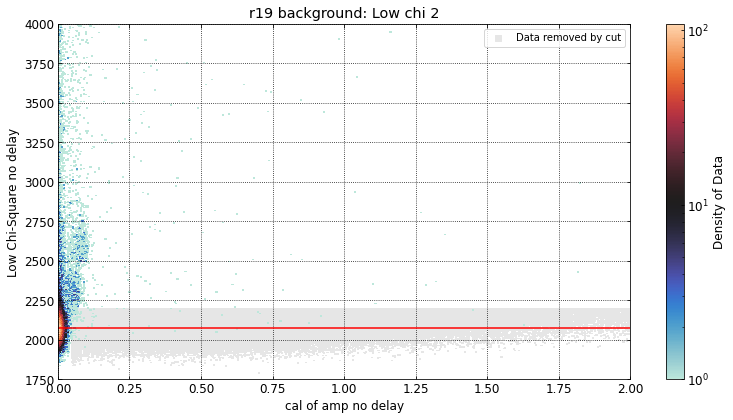

In [392]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    df_r19nos.ofamp_nodelay_CPDv21Ge/fitslope,
    df_r19nos.ofchi2low_nodelay_CPDv21Ge,
    cut=crandoms_r19nos,
    basecut=ctrigger_r19nos&cgoodtime_r19nosv3&cbaseline_r19nos&cchi2_temp_r19nos&np.invert(c_temp_r19noslowpop),
    plot_cut_data=True,
    ylims=[1750, 4e3],
    xlims=[0, 2],
)
ax.set_title('r19 background: Low chi 2')
ax.set_ylabel(r'Low Chi-Square no delay')
ax.set_xlabel(r'cal of amp no delay')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
ax.axhline((fs*tracelength), c='r')
ax.axhline(lowfreqmean, c='r')
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_21/figs/Co_lowchi2_zoom.png',
    dpi=500,
    facecolor='none',
)
#''';

## r20 nos

In [543]:
m_strict = 130
b_strict = 27200

m_loose = 45
b_loose = 0.1e6 

m_loose2 = 2100
b_loose2 = 0.13e6

x_loose_fittingcalib2=np.arange(40,90,0.1)
x_loose_fittingcalib=np.arange(20,40,0.1)
x_fitting_strictcalb = np.arange(0,20,0.1)

y_loose_parabcalib2=b_loose2+m_loose2*(x_loose_fittingcalib2-40)**2 
y_loose_parabcalib=b_loose+m_loose*(x_loose_fittingcalib-20) 
y_strict_parabcalib = b_strict+m_strict*x_fitting_strictcalb**2

temp_func = lambda x, m, b: m * x**2 + b
temp_func2 = lambda x, m, b: m * (x-20) + b
temp_func3 = lambda x, m, b: m * (x-40)**2 + b
#ctemp_strict = (((df.ofchi2_unconstrained_CPDv21Ge < temp_func(calibratedofamp_uncon, m_strict, b_strict)))&
#            dp.inrange(calibratedofamp_uncon,0,37))


In [544]:
#keeping everything above 120 kev
conetwentyup_nos = dp.inrange(calibratedofamp_nos_constrained,90,np.inf)
cchi2_strict_nos = (((df_nos.ofchi2_constrained_CPDv21Ge < temp_func(calibratedofamp_nos_constrained,
                                                             m_strict, b_strict)))&
            dp.inrange(calibratedofamp_nos_constrained,-np.inf,20))
cchi2_strict2_nos = (((df_nos.ofchi2_constrained_CPDv21Ge < temp_func2(calibratedofamp_nos_constrained,
                                                             m_loose, b_loose)))&
            dp.inrange(calibratedofamp_nos_constrained,20,40))
cchi2_strict3_nos = (((df_nos.ofchi2_constrained_CPDv21Ge < temp_func3(calibratedofamp_nos_constrained,
                                                             m_loose2, b_loose2)))&
            dp.inrange(calibratedofamp_nos_constrained,40,90))
cchi2_temp_nos = ((cchi2_strict_nos | cchi2_strict2_nos | cchi2_strict3_nos) | conetwentyup_nos)
ctemp_weirdpop = dp.inrange(calibratedofamp_nos_constrained,0,0.48)&dp.inrange(calibratedenergy_nos,0.28,0.75)
c_sqglitch_nos = np.invert(ctemp_weirdpop)

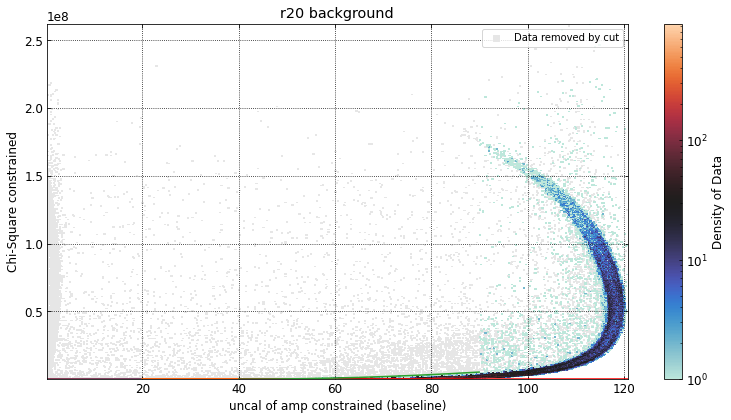

In [545]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    calibratedofamp_nos_constrained,
    df_nos.ofchi2_constrained_CPDv21Ge,
    cut=ctrigger_nos&cgoodtime_nos&cbaseline_nos&cchi2_temp_nos&c_sqglitch_nos,
    #basecut=ctrigger&ctime&cbaseline,
    plot_cut_data=True,
   # ylims=[2e4, 5e4],
   # xlims=[0, 20],
)
ax.set_title('r20 background')
ax.set_ylabel(r'Chi-Square constrained')
ax.set_xlabel(r'uncal of amp constrained (baseline)')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)

ax.axhline((fs*tracelength), c='r')
ax.plot(x_fitting_strictcalb, y_strict_parabcalib)
ax.plot(x_loose_fittingcalib, y_loose_parabcalib)
ax.plot(x_loose_fittingcalib2, y_loose_parabcalib2)
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30m_energyabscal_chi2_uncon_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

## r21 Co

In [669]:
c_good_events_r21co = ctrigger&ctime&cbaseline&cchi2_temp

In [780]:
cchi2_temp_lowchi = (c_lowchi2&dp.inrange(calibratedofamp_constrained, -np.inf, 3))
cchi2_temp_lowchiupper = (c_lowchi2_upper&dp.inrange(calibratedofamp_constrained, -np.inf, 3))

cchi2_temp1 = ((df.ofchi2_constrained_CPDv21Ge<temp_func(calibratedofamp_constrained, m_strict, b_strict))&
              dp.inrange(calibratedofamp_constrained, 3, 20))

cchi2_temp2 = ((df.ofchi2_constrained_CPDv21Ge<temp_func3(calibratedofamp_constrained, m_loose, b_loose)) & 
              dp.inrange(calibratedofamp_constrained, 20, 50))
cchi2_temp3 = ((df.ofchi2_constrained_CPDv21Ge<temp_func2(calibratedofamp_constrained, m_loose2, b_loose2))&
              dp.inrange(calibratedofamp_constrained, 50, 80))
cchi2_temp_allelse = dp.inrange(calibratedofamp_constrained, 80, np.inf)

cchi2_temp = (cchi2_temp_lowchi | cchi2_temp1 | cchi2_temp2 | cchi2_temp3 | cchi2_temp_allelse)
cchi2_temp_2 = (cchi2_temp_lowchiupper | cchi2_temp_allelse)

In [779]:
m_strict = 300
b_strict = 27200

m_loose = 7e3
b_loose = 154000 

m_loose2 = 5200
b_loose2 = 399000

x_loose_fittingcalib2=np.arange(50,80,0.1)
x_loose_fittingcalib=np.arange(20,50,0.1)
x_fitting_strictcalb = np.arange(0,20,0.1)

y_loose_parabcalib2=b_loose2+m_loose2*(x_loose_fittingcalib2-50)**2 
y_loose_parabcalib=b_loose+m_loose*(x_loose_fittingcalib-20) 
y_strict_parabcalib = b_strict+m_strict*x_fitting_strictcalb**2

temp_func = lambda x, m, b: m * x**2 + b
temp_func2 = lambda x, m, b: m * (x-50)**2 + b
temp_func3 = lambda x, m, b: m * (x-20) + b

#ctemp_strict = (((df.ofchi2_unconstrained_CPDv21Ge < temp_func(calibratedofamp_uncon, m_strict, b_strict)))&
#            dp.inrange(calibratedofamp_uncon,0,37))


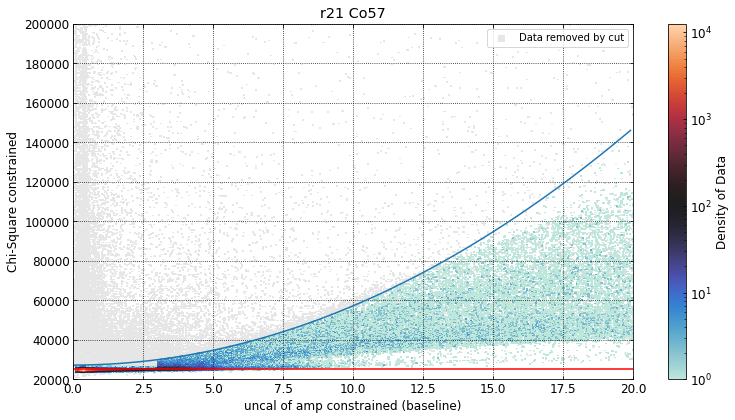

In [781]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    calibratedofamp_constrained,
    df.ofchi2_constrained_CPDv21Ge,
    cut=ctrigger&ctime&cbaseline&cchi2_temp,
    #basecut=ctrigger&ctime&cbaseline,
    plot_cut_data=True,
    ylims=[2e4, 2e5],
    xlims=[0, 20],
)
ax.set_title('r21 Co57')
ax.set_ylabel(r'Chi-Square constrained')
ax.set_xlabel(r'uncal of amp constrained (baseline)')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)

ax.axhline((fs*tracelength), c='r')
ax.plot(x_fitting_strictcalb, y_strict_parabcalib)
ax.plot(x_loose_fittingcalib, y_loose_parabcalib)
ax.plot(x_loose_fittingcalib2, y_loose_parabcalib2)
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30m_energyabscal_chi2_uncon_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

In [848]:
delf = fs/25000
lowfreqmean = (51889/delf)*2
sigchi = np.sqrt(2*lowfreqmean)
sigchireg = np.sqrt(2*(fs*tracelength))
print(sigchi)
print(sigchireg)

64.42918593308471
223.60679774997897


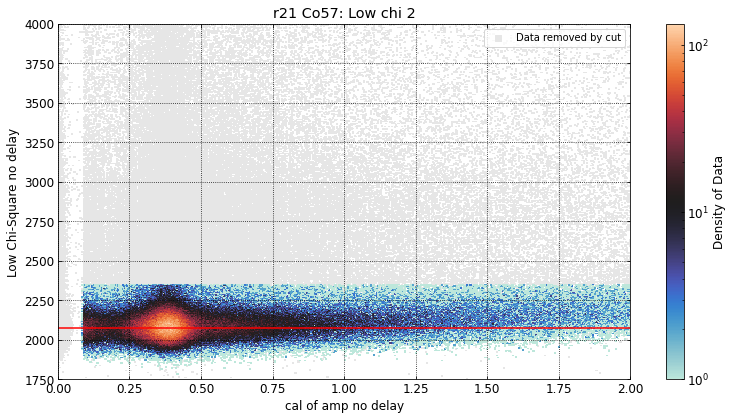

In [672]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    df.ofamp_nodelay_CPDv21Ge/fitslope,
    df.ofchi2low_nodelay_CPDv21Ge,
    cut=c_good_events_r21co,
    #basecut=crandoms,
    plot_cut_data=True,
    ylims=[1750, 4e3],
    xlims=[0, 2],
)
ax.set_title('r21 Co57: Low chi 2')
ax.set_ylabel(r'Low Chi-Square no delay')
ax.set_xlabel(r'cal of amp no delay')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
ax.axhline((fs*tracelength), c='r')
ax.axhline(lowfreqmean, c='r')
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_21/figs/Co_lowchi2_zoom.png',
    dpi=500,
    facecolor='none',
)
#''';

In [144]:
(.5/122)*6000

24.59016393442623

## r21 background

In [569]:
m_strict = 400
b_strict = 26400

m_loose = 8e3
b_loose = 130000 

m_loose2 = 7000
b_loose2 = 0.48e6
temp_func = lambda x, m, b: m * x**2 + b
temp_func2 = lambda x, m, b: m * (x-50)**2 + b
temp_func3 = lambda x, m, b: m * (x-20) + b
cchi2_temp_lowchi_r21nos = (c_lowchi2_nosr21&dp.inrange(df_nosr21.ofamp_constrained_CPDv21Ge/fitslope, -np.inf, 3))
cchi2_temp1_r21nos = ((df_nosr21.ofchi2_constrained_CPDv21Ge<temp_func(df_nosr21.ofamp_constrained_CPDv21Ge/fitslope, m_strict, b_strict))&
              dp.inrange(df_nosr21.ofamp_constrained_CPDv21Ge/fitslope, 3, 20))
cchi2_temp2_r21nos = ((df_nosr21.ofchi2_constrained_CPDv21Ge<temp_func3(df_nosr21.ofamp_constrained_CPDv21Ge/fitslope, m_loose, b_loose))&
              dp.inrange(df_nosr21.ofamp_constrained_CPDv21Ge/fitslope, 20, 50))
cchi2_temp3_r21nos = ((df_nosr21.ofchi2_constrained_CPDv21Ge<temp_func2(df_nosr21.ofamp_constrained_CPDv21Ge/fitslope, m_loose2, b_loose2))&
              dp.inrange(df_nosr21.ofamp_constrained_CPDv21Ge/fitslope, 50, 90))
cchi2_temp_r21nos_allelse = dp.inrange(df_nosr21.ofamp_constrained_CPDv21Ge/fitslope, 90, np.inf)

cchi2_temp_r21nos = (cchi2_temp_lowchi_r21nos | cchi2_temp1_r21nos | cchi2_temp2_r21nos | cchi2_temp3_r21nos | cchi2_temp_r21nos_allelse)

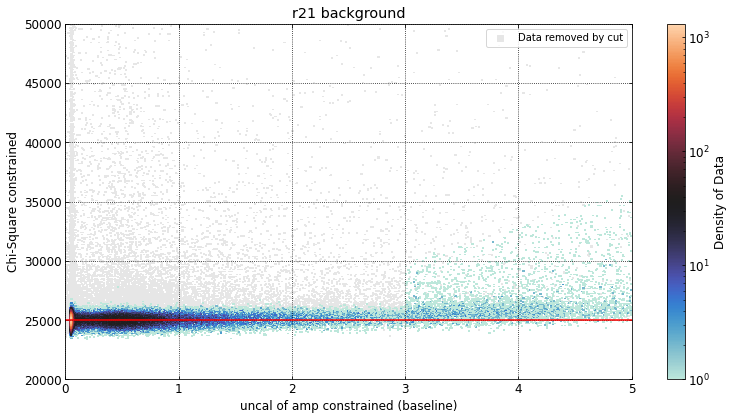

In [653]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    df_nosr21.ofamp_constrained_CPDv21Ge/fitslope,
    df_nosr21.ofchi2_constrained_CPDv21Ge,
    cut=ctrigger_nosr21&cbaseline_nosr21&cchi2_temp_r21nos,
    #basecut=ctrigger_nosr21&cbaseline_nosr21&cchi2_temp_r21nos,
    plot_cut_data=True,
    ylims=[2e4, 5e4],
    xlims=[0, 5],
)
ax.set_title('r21 background')
ax.set_ylabel(r'Chi-Square constrained')
ax.set_xlabel(r'uncal of amp constrained (baseline)')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)

ax.axhline((fs*tracelength), c='r')

fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30m_energyabscal_chi2_uncon_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

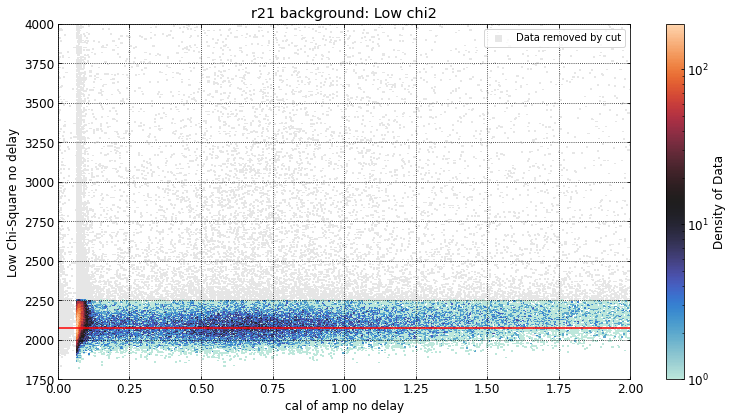

In [561]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    df_nosr21.ofamp_nodelay_CPDv21Ge/m_run10,
    df_nosr21.ofchi2low_nodelay_CPDv21Ge,
    cut=ctrigger_nosr21&cbaseline_nosr21&cchi2_temp_r21nos,
    #basecut=crandoms,
    plot_cut_data=True,
    ylims=[1750, 4e3],
    xlims=[0, 2],
)
ax.set_title('r21 background: Low chi2')
ax.set_ylabel(r'Low Chi-Square no delay')
ax.set_xlabel(r'cal of amp no delay')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
ax.axhline((fs*tracelength), c='r')
ax.axhline(lowfreqmean, c='r')
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_21/figs/nos_lowchi2_zoom.png',
    dpi=500,
    facecolor='none',
)
#''';

## r20 Co

In [310]:
m_strict = 300
b_strict = 27200

m_loose = 1000
b_loose = 125000 

m_loose2 = 3000
b_loose2 = 0.17e6
temp_func = lambda x, m, b: m * x**2 + b
temp_func2 = lambda x, m, b: m * (x-20)**2 + b
temp_func3 = lambda x, m, b: m * (x-40)**2 + b

x_loose_fittingcalib2=np.arange(40,70,0.1)
x_loose_fittingcalib=np.arange(20,40,0.1)
x_fitting_strictcalb = np.arange(0,20,0.1)

y_loose_parabcalib2=b_loose2+m_loose2*(x_loose_fittingcalib2-40)**2 
y_loose_parabcalib=b_loose+m_loose*(x_loose_fittingcalib-20) 
y_strict_parabcalib = b_strict+m_strict*x_fitting_strictcalb**2



In [311]:
#keeping everything above 100 kev
conehundup_Co = dp.inrange(calibratedofamp_Co_constrained,70,np.inf)
#csixty_110 = dp.inrange(calibratedofamp_constrained,60,110)
cchi2_strict_Co = (((df_Co.ofchi2_constrained_CPDv21Ge < temp_func(calibratedofamp_Co_constrained,
                                                             m_strict, b_strict)))&
            dp.inrange(calibratedofamp_Co_constrained,-np.inf,20))
cchi2_strict2_Co = (((df_Co.ofchi2_constrained_CPDv21Ge < temp_func2(calibratedofamp_Co_constrained,
                                                             m_loose, b_loose)))&
            dp.inrange(calibratedofamp_Co_constrained,20,40))
cchi2_strict3_Co = (((df_Co.ofchi2_constrained_CPDv21Ge < temp_func3(calibratedofamp_Co_constrained,
                                                             m_loose2, b_loose2)))&
            dp.inrange(calibratedofamp_Co_constrained,40,70))
cchi2_temp_Co = ((cchi2_strict_Co | cchi2_strict2_Co | cchi2_strict3_Co) | conehundup_Co)

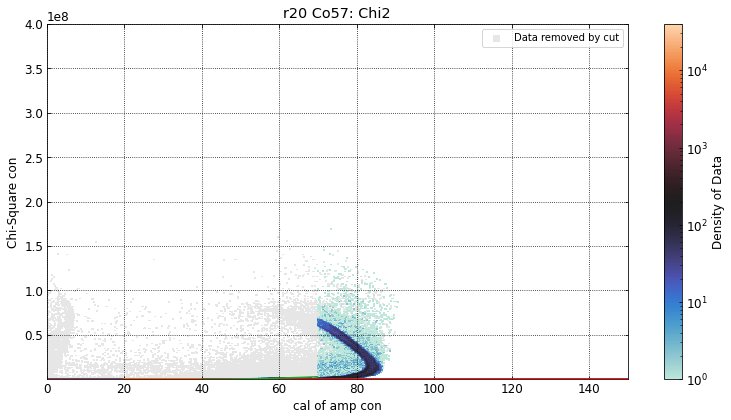

In [313]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    df_Co.ofamp_constrained_CPDv21Ge/fitslope,
    df_Co.ofchi2_constrained_CPDv21Ge,
    cut=ctrigger_Co&cbaseline_Co&cchi2_temp_Co,
    #basecut=crandoms_Co,
    plot_cut_data=True,
    ylims=[2e3, 4e8],
    xlims=[0, 150],
)
ax.set_title('r20 Co57: Chi2')
ax.set_ylabel(r'Chi-Square con')
ax.set_xlabel(r'cal of amp con')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
ax.axhline((fs*tracelength), c='r')
ax.axhline(lowfreqmean, c='r')
ax.plot(x_fitting_strictcalb, y_strict_parabcalib)
ax.plot(x_loose_fittingcalib, y_loose_parabcalib)
ax.plot(x_loose_fittingcalib2, y_loose_parabcalib2)
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_21/figs/r20Co_chi2_zoom.png',
    dpi=500,
    facecolor='none',
)
#''';

## r18 both frames

In [868]:
m1_strict = 20
b1_strict = 26200

m_loose = 480
b_loose = 26500 

m_loose2 = 12e3
b_loose2 = 1.6e5 

m_loose3 = 13000
b_loose3 = 0.75e6 
x_loose_fittingcalib=np.arange(0,20,0.1)
x_loose_fittingcalib2=np.arange(20,60,0.1)
x_loose_fittingcalib3=np.arange(60,80,0.1)

x_fitting_strictcalb = np.arange(0,20,0.1)
y_loose_parabcalib_low=b_loose+m_loose*x_loose_fittingcalib**2 

y_loose_parabcalib_low2=b_loose2+m_loose2*(x_loose_fittingcalib2-20) 
y_loose_parabcalib_low3=b_loose3+m_loose3*(x_loose_fittingcalib3-60)**2 

y_strict_parabcalib = b1_strict+m1_strict*x_fitting_strictcalb**2
temp_func = lambda x, m, b: m * x**2 + b
temp_func2 = lambda x, m, b: m * (x-20) + b
temp_func3 = lambda x, m, b: m * (x-60)**2 + b


cchi2_r18_bga0 = (ctime_r18gaaslowchi2 & dp.inrange(calibratedofamp_bgaas_constrained, -np.inf, 3))
cchi2_r18_bga1 =((df_both.ofchi2_constrained_CPDv21Ge_gaas) < 
                           (temp_func(calibratedofamp_bgaas_constrained,
                           m_loose,b_loose))) & dp.inrange(calibratedofamp_bgaas_constrained,3,20)
cchi2_r18_bga2 = ((df_both.ofchi2_constrained_CPDv21Ge_gaas) < 
                           (temp_func2(calibratedofamp_bgaas_constrained,
                           m_loose2,b_loose2))) & dp.inrange(calibratedofamp_bgaas_constrained,20,60)
cchi2_r18_bga3 = ((df_both.ofchi2_constrained_CPDv21Ge_gaas) < 
                           (temp_func3(calibratedofamp_bgaas_constrained,
                           m_loose3,b_loose3))) & dp.inrange(calibratedofamp_bgaas_constrained,60,80)
cchi2_r18onetwentyup_bga = dp.inrange(calibratedofamp_bgaas_constrained, 80, np.inf)

cchi2_temp_bgaas = (cchi2_r18_bga0 | cchi2_r18_bga1 | cchi2_r18_bga2 | cchi2_r18_bga3 | cchi2_r18onetwentyup_bga)


cchi2_r18_bge0 = (ctime_r18gelowchi2 & dp.inrange(calibratedofamp_bge_constrained, -np.inf, 5) & (
    (df_both.ofchi2_constrained_CPDv21Ge_ge) < 
                           (temp_func(calibratedofamp_bge_constrained,
                           m_loose,b_loose))))
cchi2_r18_bge1 =((df_both.ofchi2_constrained_CPDv21Ge_ge) < 
                           (temp_func(calibratedofamp_bge_constrained,
                           m_loose,b_loose))) & dp.inrange(calibratedofamp_bge_constrained,5,20)
cchi2_r18_bge2 = ((df_both.ofchi2_constrained_CPDv21Ge_ge) < 
                           (temp_func2(calibratedofamp_bge_constrained,
                           m_loose2,b_loose2))) & dp.inrange(calibratedofamp_bge_constrained,20,60)
cchi2_r18_bge3 = ((df_both.ofchi2_constrained_CPDv21Ge_ge) < 
                           (temp_func3(calibratedofamp_bge_constrained,
                           m_loose3,b_loose3))) & dp.inrange(calibratedofamp_bge_constrained,60,120)
cchi2_r18onetwentyup_bge = dp.inrange(calibratedofamp_bge_constrained, 120, np.inf)

cchi2_temp2_bge = (cchi2_r18_bge0 | cchi2_r18_bge1 | cchi2_r18_bge2 | cchi2_r18_bge3 | cchi2_r18onetwentyup_bge)

In [500]:
chi2sig = np.sqrt(2*(fs*tracelength))
print(3.5*chi2sig)

782.6237921249264


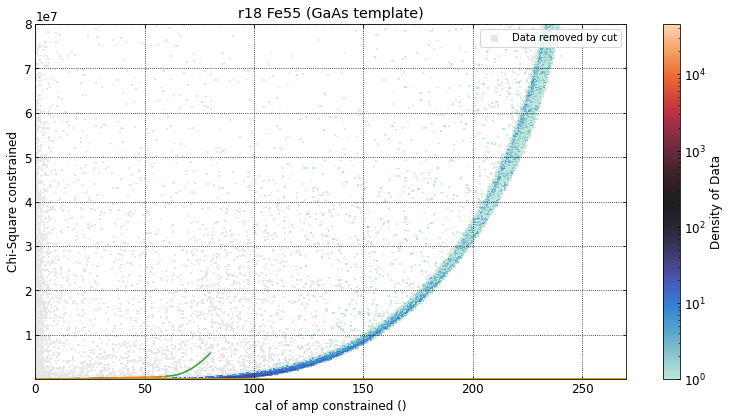

In [872]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    calibratedenergy_bgaas,
    df_both.ofchi2_constrained_CPDv21Ge_gaas,
    cut=ctrigger_both&cgoodtime_r18&cbaseline_bgaas&cchi2_temp_bgaas,
    #basecut=crandoms,
    plot_cut_data=True,
    ylims=[2e4, 8e7],
    xlims=[0, 270],
)
ax.set_title('r18 Fe55 (GaAs template)')
ax.set_ylabel(r'Chi-Square constrained')
ax.set_xlabel(r'cal of amp constrained ()')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
ax.plot(x_loose_fittingcalib, y_loose_parabcalib_low)
ax.plot(x_loose_fittingcalib2, y_loose_parabcalib_low2)
ax.plot(x_loose_fittingcalib3, y_loose_parabcalib_low3)
ax.axhline((fs*tracelength), c='r')
ax.axhline((5*chi2sig)+(fs*tracelength), c='y')
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30m_energyabscal_chi2_uncon_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

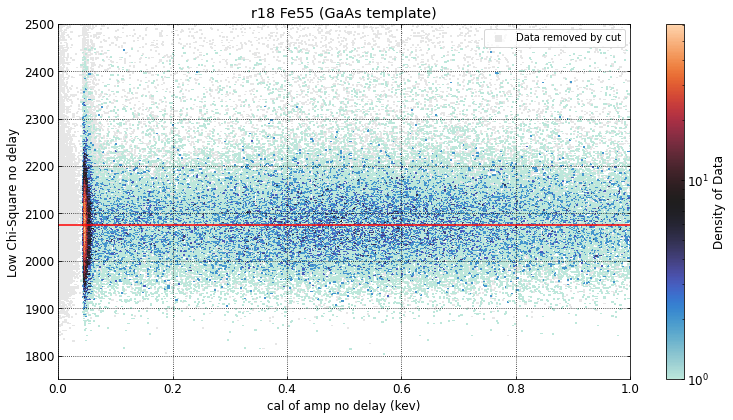

In [663]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    calibratedofamp_bgaas_nodelay,
    df_both.ofchi2low_nodelay_CPDv21Ge_gaas,
    cut=ctrigger_both&cgoodtime_r18&cbaseline_bgaas&cchi2_temp_bgaas,
    #basecut=ctrigger&ctime&cbaseline,
    plot_cut_data=True,
    ylims=[1750, 2.5e3],
    xlims=[0, 1],
)
ax.set_title('r18 Fe55 (GaAs template)')
ax.set_ylabel(r'Low Chi-Square no delay')
ax.set_xlabel(r'cal of amp no delay (kev)')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)

ax.axhline((fs*tracelength), c='r')
ax.axhline(lowfreqmean, c='r')

fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30m_energyabscal_chi2_uncon_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

## r21nos both frames

In [80]:
x_loose_fittingcalib2=np.arange(50,100,0.1)
x_loose_fittingcalib=np.arange(20,50,0.1)
x_fitting_strictcalb = np.arange(0,20,0.1)

y_loose_parabcalib2=b_loose2+m_loose2*(x_loose_fittingcalib2-50)**2 
y_loose_parabcalib=b_loose+m_loose*(x_loose_fittingcalib-20) 
y_strict_parabcalib = b_strict+m_strict*x_fitting_strictcalb**2

temp_func = lambda x, m, b: m * x**2 + b
temp_func2 = lambda x, m, b: m * (x-50)**2 + b
temp_func3 = lambda x, m, b: m * (x-20) + b

In [81]:
m_strict = 400
b_strict = 26400

m_loose = 7e3
b_loose = 130000 

m_loose2 = 7000
b_loose2 = 0.48e6

cchi2_temp_lowchi_r21nos = (c_lowchi2_bnosr21&dp.inrange(df_both_nos.ofamp_constrained_CPDv21Ge_gaas/fitslope, -np.inf, 3))

cchi2_temp1_r21nos = ((df_both_nos.ofchi2_constrained_CPDv21Ge_gaas<temp_func(df_both_nos.ofamp_constrained_CPDv21Ge_gaas/fitslope, m_strict, b_strict))&
              dp.inrange(df_both_nos.ofamp_constrained_CPDv21Ge_gaas/fitslope, 3, 20))

cchi2_temp2_r21nos = ((df_both_nos.ofchi2_constrained_CPDv21Ge_gaas<temp_func3(df_both_nos.ofamp_constrained_CPDv21Ge_gaas/fitslope, m_loose, b_loose))&
              dp.inrange(df_both_nos.ofamp_constrained_CPDv21Ge_gaas/fitslope, 20, 50))

cchi2_temp3_r21nos = ((df_both_nos.ofchi2_constrained_CPDv21Ge_gaas<temp_func2(df_both_nos.ofamp_constrained_CPDv21Ge_gaas/fitslope, m_loose2, b_loose2))&
              dp.inrange(df_both_nos.ofamp_constrained_CPDv21Ge_gaas/fitslope, 50, 90))

cchi2_temp_r21nos_allelse = dp.inrange(df_both_nos.ofamp_constrained_CPDv21Ge_gaas/fitslope, 90, np.inf)

cchi2_temp_r21nosbgaas = (cchi2_temp_lowchi_r21nos | cchi2_temp1_r21nos| cchi2_temp2_r21nos | cchi2_temp3_r21nos | cchi2_temp_r21nos_allelse)

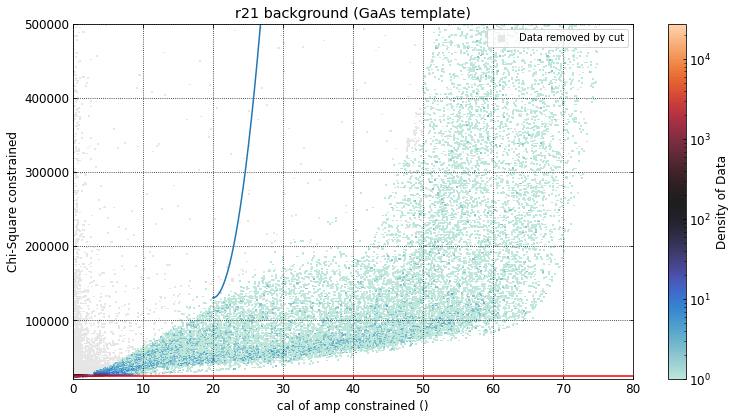

In [776]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    df_both_nos.ofamp_constrained_CPDv21Ge_gaas/fitslope,
    df_both_nos.ofchi2_constrained_CPDv21Ge_gaas,
    cut=ctrigger_both_nos&cbaseline_nosbgaas&cchi2_temp_r21nosbgaas,
    #basecut=ctrigger&ctime&cbaseline,
    plot_cut_data=True,
    ylims=[2e4, 5e5],
    xlims=[0, 80],
)
ax.set_title('r21 background (GaAs template)')
ax.set_ylabel(r'Chi-Square constrained')
ax.set_xlabel(r'cal of amp constrained ()')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)

ax.axhline((fs*tracelength), c='r')
ax.plot(x_loose_fittingcalib, y_loose_parabcalib)
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30m_energyabscal_chi2_uncon_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

In [82]:
x_loose_fittingcalib2=np.arange(50,100,0.1)
x_loose_fittingcalib=np.arange(20,50,0.1)
x_fitting_strictcalb = np.arange(0,20,0.1)


m_strict = 400
b_strict = 26400

m_loose = 1e3
b_loose = 100000 

m_loose2 = 7000
b_loose2 = 1e6
temp_func4 = lambda x, m, b: m * (x-20)**2 + b
y_loose_parabcalib2=b_loose2+m_loose2*(x_loose_fittingcalib2-50)**2 
y_loose_parabcalib=b_loose+m_loose*(x_loose_fittingcalib-20)**2 
y_strict_parabcalib = b_strict+m_strict*x_fitting_strictcalb**2

cchi2_temp_lowchi_r21nos = (c_lowchi2_bgenosr21&dp.inrange(df_both_nos.ofamp_constrained_CPDv21Ge_ge/fitslope, -np.inf, 1))
cchi2_temp1_r21nos = ((df_both_nos.ofchi2_constrained_CPDv21Ge_ge<temp_func(df_both_nos.ofamp_constrained_CPDv21Ge_ge/fitslope, m_strict, b_strict))&
              dp.inrange(df_both_nos.ofamp_constrained_CPDv21Ge_ge/fitslope, 1, 20))
cchi2_temp2_r21nos = ((df_both_nos.ofchi2_constrained_CPDv21Ge_ge<temp_func4(df_both_nos.ofamp_constrained_CPDv21Ge_ge/fitslope, m_loose, b_loose))&
              dp.inrange(df_both_nos.ofamp_constrained_CPDv21Ge_ge/fitslope, 20, 50))
cchi2_temp3_r21nos = ((df_both_nos.ofchi2_constrained_CPDv21Ge_ge<temp_func2(df_both_nos.ofamp_constrained_CPDv21Ge_ge/fitslope, m_loose2, b_loose2))&
              dp.inrange(df_both_nos.ofamp_constrained_CPDv21Ge_ge/fitslope, 50, 90))
cchi2_temp_r21nos_allelse = dp.inrange(df_both_nos.ofamp_constrained_CPDv21Ge_ge/fitslope, 90, np.inf)

cchi2_temp_r21nosbge = (cchi2_temp_lowchi_r21nos | cchi2_temp1_r21nos | cchi2_temp2_r21nos | cchi2_temp3_r21nos | cchi2_temp_r21nos_allelse)

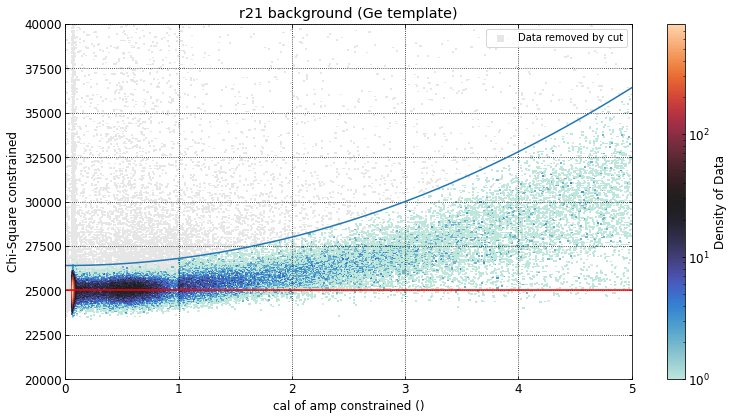

In [801]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    df_both_nos.ofamp_constrained_CPDv21Ge_ge/fitslope,
    df_both_nos.ofchi2_constrained_CPDv21Ge_ge,
    cut=ctrigger_both_nos&cbaseline_nosbge&cchi2_temp_r21nosbge,
    #basecut=ctrigger&ctime&cbaseline,
    plot_cut_data=True,
    ylims=[2e4, 4e4],
    xlims=[0, 5],
)
ax.set_title('r21 background (Ge template)')
ax.set_ylabel(r'Chi-Square constrained')
ax.set_xlabel(r'cal of amp constrained ()')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)

ax.axhline((fs*tracelength), c='r')
ax.plot(x_fitting_strictcalb, y_strict_parabcalib)
ax.plot(x_loose_fittingcalib, y_loose_parabcalib)
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30m_energyabscal_chi2_uncon_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

# E abs v E ofamp

## r20 nos

In [261]:
ctemp_weirdpop = dp.inrange(calibratedofamp_nos_constrained,0,0.4)&dp.inrange(calibratedenergy_nos,0.28,0.75)
c_sqglitch_nos = np.invert(ctemp_weirdpop)

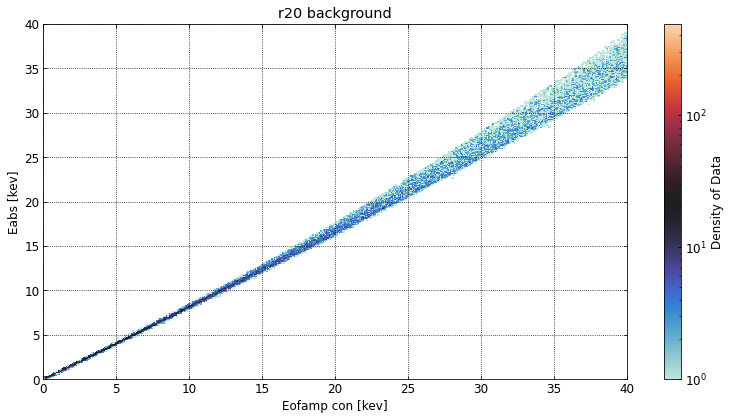

In [263]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    df_nos.ofamp_constrained_CPDv21Ge/fitslope,
    calibratedenergy_nos,
    cut=ctrigger_nos&cgoodtime_nos&cbaseline_nos&cchi2_temp_nos&c_sqglitch_nos,
    #basecut=ctrigger,
    #plot_cut_data=True,
    ylims=[0, 40],
    xlims=[0, 40],
)
ax.set_title('r20 background')
ax.set_ylabel(r'Eabs [kev]')
ax.set_xlabel(r'Eofamp con [kev]')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)

fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30m_energyabscal_chi2_uncon_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

## r19 nos

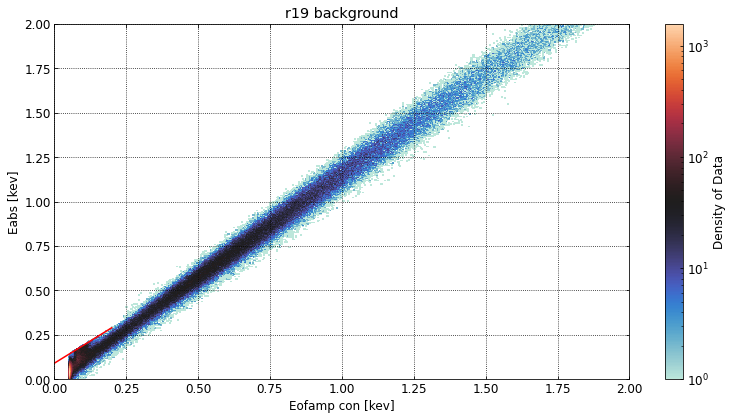

In [845]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    df_r19nos.ofamp_constrained_CPDv21Ge/fitslope,
    calibratedenergy_r19nos,
    cut=ctrigger_r19nos&cbaseline_r19nos&cchi2_temp_r19nos&np.invert(c_temp_r19noslowpop),
    #basecut=ctrigger,
    #plot_cut_data=True,
    ylims=[0, 2],
    xlims=[0, 2],
)
ax.set_title('r19 background')
ax.set_ylabel(r'Eabs [kev]')
ax.set_xlabel(r'Eofamp con [kev]')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
ax.plot(x_fitr19nos_lowpop, y_fitr19nos_lowpop, c='r')
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30m_energyabscal_chi2_uncon_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

In [819]:
c_temp_r19noslowpop = ((calibratedenergy_r19nos>temp_funclin(calibratedofamp_r19nos_constrained, 
                                                             m_r19nos_lowpop, b_r19nos_lowpop))
                       &dp.inrange(calibratedofamp_r19nos_constrained, -np.inf, 0.24))

In [818]:
m_r19nos_lowpop = 1
b_r19nos_lowpop = 0.09
x_fitr19nos_lowpop = np.arange(0,0.24,0.05)
y_fitr19nos_lowpop = x_fitr19nos_lowpop*m_r19nos_lowpop+b_r19nos_lowpop

temp_funclin = lambda x, m, b: m * x + b

## r21 Co

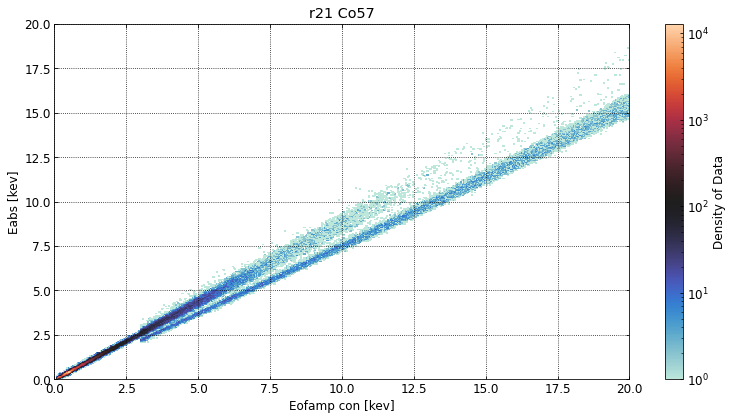

In [198]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    calibratedofamp_constrained,
    calibratedenergy,
    cut=ctrigger&ctime&cbaseline&cchi2_temp,
    #basecut=ctrigger,
    #plot_cut_data=True,
    ylims=[0, 20],
    xlims=[0, 20],
)
ax.set_title('r21 Co57')
ax.set_ylabel(r'Eabs [kev]')
ax.set_xlabel(r'Eofamp con [kev]')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)

fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30m_energyabscal_chi2_uncon_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

## r21 background

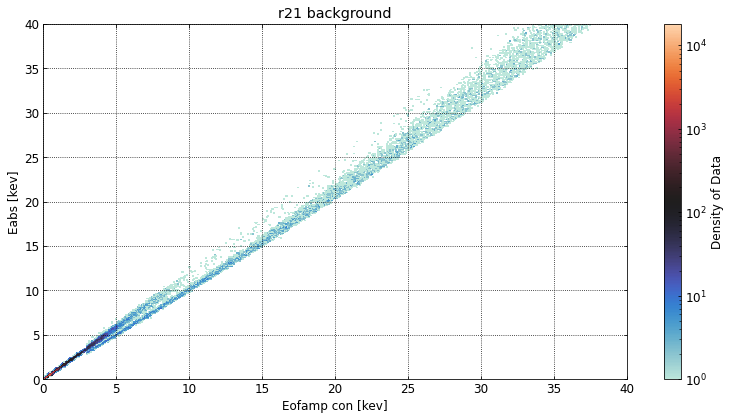

In [460]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    df_nosr21.ofamp_constrained_CPDv21Ge/fitslope,
    calibratedenergy_nosr21,
    cut=ctrigger_nosr21&cbaseline_nosr21&cchi2_temp_r21nos,
    #basecut=ctrigger,
    #plot_cut_data=True,
    ylims=[0, 40],
    xlims=[0, 40],
)
ax.set_title('r21 background')
ax.set_ylabel(r'Eabs [kev]')
ax.set_xlabel(r'Eofamp con [kev]')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
#ax.plot(x_fitting_splitpop, y_lin_splitpop, c='r')
#ax.plot(x_fitr21_lowpop, y_fitr21nos_lowpop, c='r')
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30m_energyabscal_chi2_uncon_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

In [401]:
m_r21nos_lowpop = 1.5
x_fitr21_lowpop = np.arange(0,0.2,0.05)
y_fitr21nos_lowpop = x_fitr21_lowpop*m_r21nos_lowpop

In [404]:
ctemp_r21_lowpop = ((calibratedenergy_nosr21>linfit_func(df_nosr21.ofamp_constrained_CPDv21Ge/fitslope, m_r21nos_lowpop))&
                   dp.inrange(calibratedenergy_nosr21, 0.1, 0.2))

In [426]:
m_splitpop = 1.1
b_splitpop = 5.3

x_fitting_splitpop = np.arange(5,10,0.1)
y_lin_splitpop = b_splitpop+m_splitpop*(x_fitting_splitpop-5)

temp_funclin = lambda x, m, b: m * (x-5) + b

In [430]:

ctemp_r21nos_gaas = (((calibratedenergy_nosr21 > temp_funclin((df_nosr21.ofamp_constrained_CPDv21Ge/fitslope),
                                                             m_splitpop, b_splitpop)))&
            dp.inrange(df_nosr21.ofamp_constrained_CPDv21Ge/fitslope,5,10))
ctemp_r21nos_ge = (((calibratedenergy_nosr21 < temp_funclin((df_nosr21.ofamp_constrained_CPDv21Ge/fitslope),
                                                             m_splitpop, b_splitpop)))&
            dp.inrange(df_nosr21.ofamp_constrained_CPDv21Ge/fitslope,5,10))
ctemp_lessthan15kev = dp.inrange(calibratedenergy_nosr21, 0, 15)
ctemp_r21nos_gaas = ctemp_r21nos_gaas & ctemp_lessthan15kev

## r20 Co

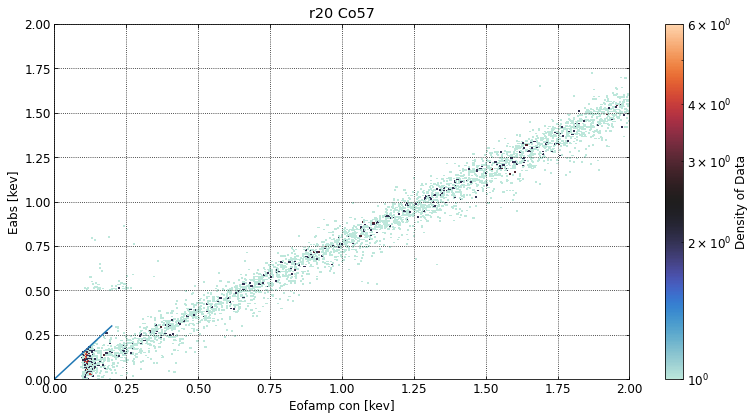

In [397]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    df_Co.ofamp_constrained_CPDv21Ge/fitslope,
    calibratedenergy_Co,
    cut=ctrigger_Co&cgoodtime_Co&cbaseline_Co&cchi2_temp_Co&np.invert(ctemp_r20_lowpop),
    #basecut=ctrigger,
    #plot_cut_data=True,
    ylims=[0, 2],
    xlims=[0, 2],
)
ax.set_title('r20 Co57')
ax.set_ylabel(r'Eabs [kev]')
ax.set_xlabel(r'Eofamp con [kev]')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
ax.plot(x_fitr20_lowpop, y_fitr20_lowpop)
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30m_energyabscal_chi2_uncon_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

In [86]:
m_r20co_lowpop = 1.5
x_fitr20_lowpop = np.arange(0,0.25,0.05)
y_fitr20_lowpop = x_fitr20_lowpop*m_r20co_lowpop

In [87]:
ctemp_r20_lowpop = ((calibratedenergy_Co>linfit_func(df_Co.ofamp_constrained_CPDv21Ge/fitslope, m_r20co_lowpop))&
                   dp.inrange(calibratedenergy_Co, 0, 0.5))

## r18 both frames

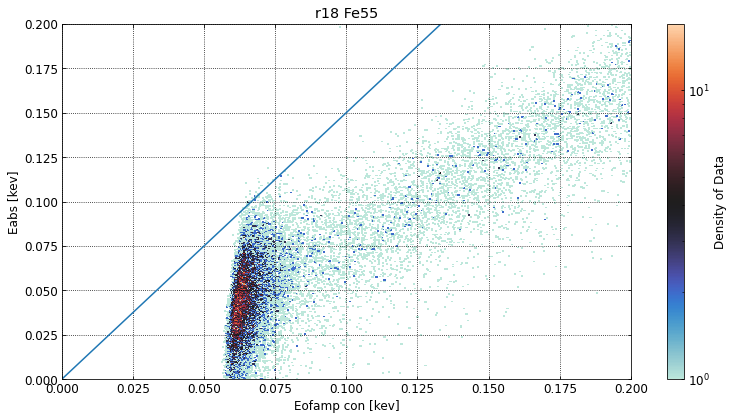

In [558]:
#checking the fit of our amplitudes v chi2
#a "good" fit against chi2 will be about ~ number of bins
fig, ax = dp.densityplot(
    calibratedofamp_bgaas_constrained,
    calibratedenergy_bgaas,
    cut=ctrigger_both&cgoodtime_r18&cbaseline_bgaas&cchi2_temp_bgaas,
    #basecut=ctrigger,
    #plot_cut_data=True,
    ylims=[0, 0.2],
    xlims=[0, 0.2],
)
ax.set_title('r18 Fe55')
ax.set_ylabel(r'Eabs [kev]')
ax.set_xlabel(r'Eofamp con [kev]')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k', zorder=10)
ax.plot(x_fitr20_lowpop, y_fitr20_lowpop)
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30m_energyabscal_chi2_uncon_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

In [88]:
ctemp_r18bgaas_lowpop = (dp.inrange(calibratedofamp_bgaas_constrained, 0, 0.075)&dp.inrange(calibratedenergy_bgaas, 0, 0.1))

# Pulling pulses

## r21 background 

In [433]:
trigger_path = '/sdata2/runs/run21/processed/nos_3pt5sig_I2_D20221101_T111056'

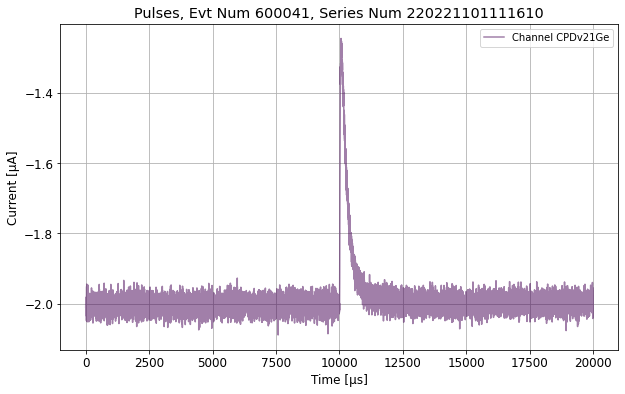

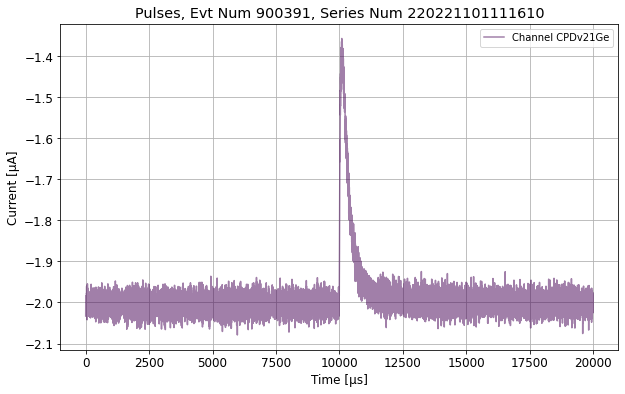

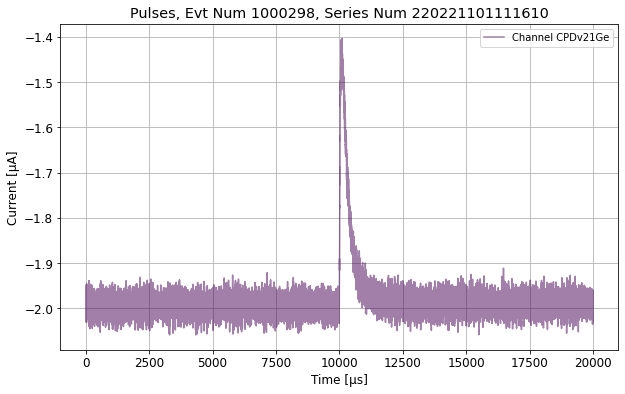

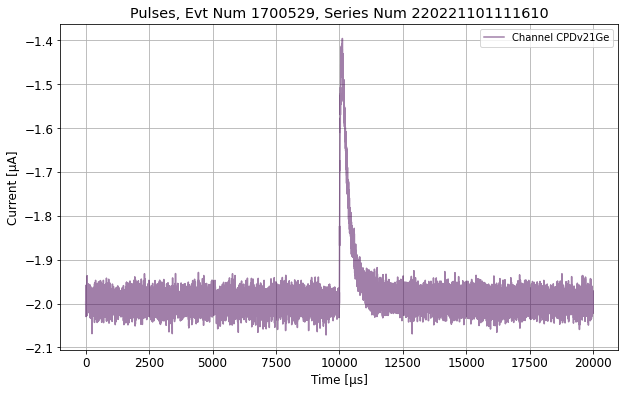

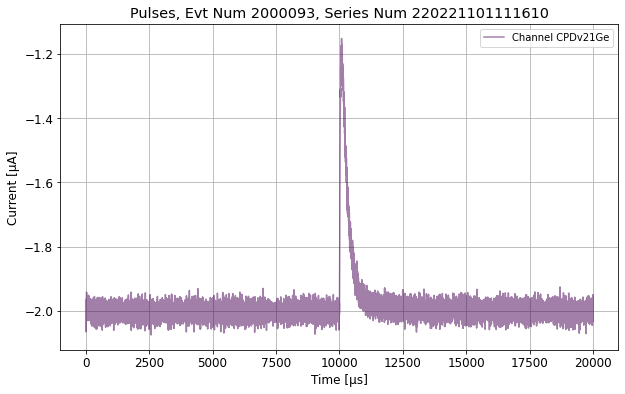

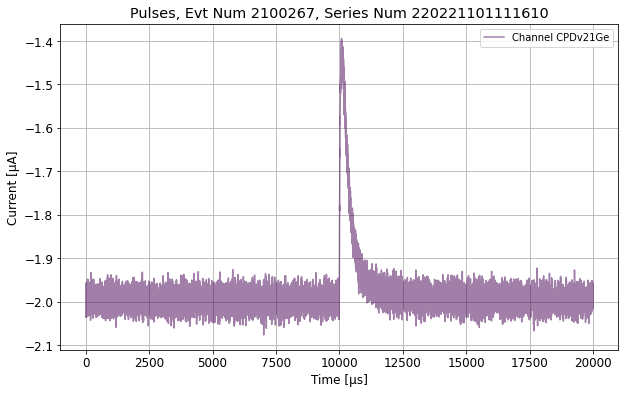

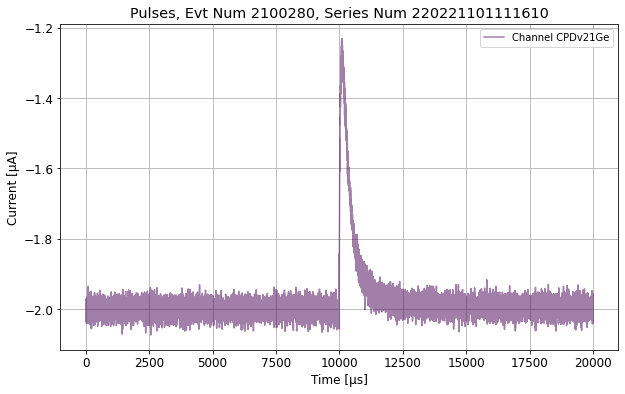

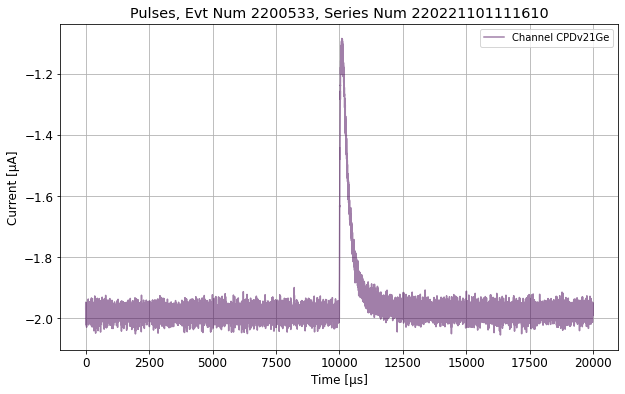

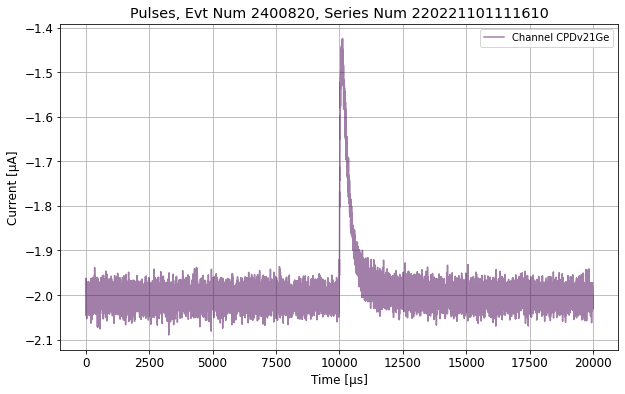

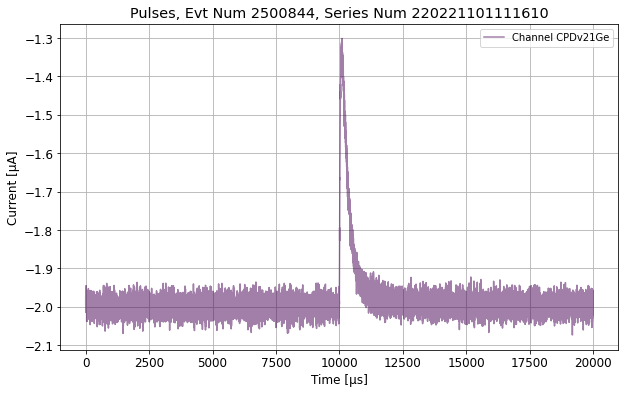

In [449]:
randsgaas = getrandevents(trigger_path,
    df_nosr21.eventnumber,
    df_nosr21.seriesnumber,                    
    ntraces=100,
    nplot=10,
    channels=['CPDv21Ge'],
    cut=ctrigger_nosr21&cbaseline_nosr21&cchi2_temp_r21nos&ctemp_r21nos_gaas,
    lgcplot=True)

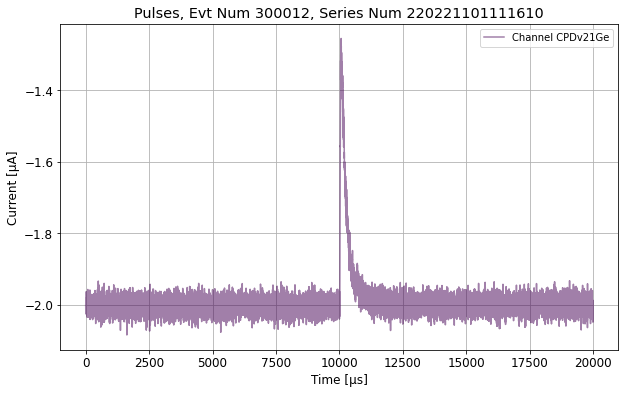

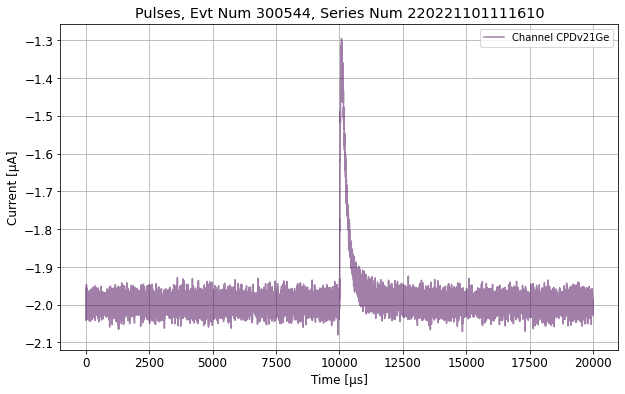

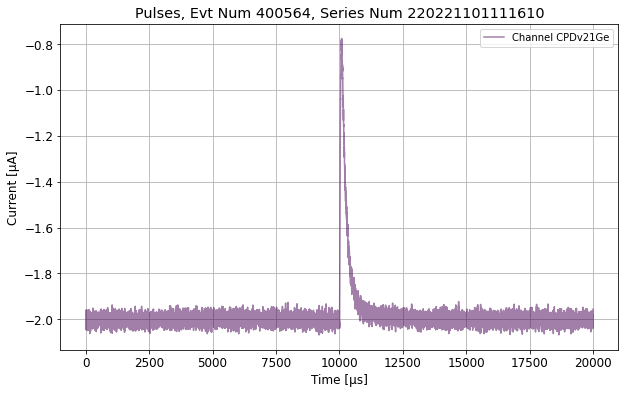

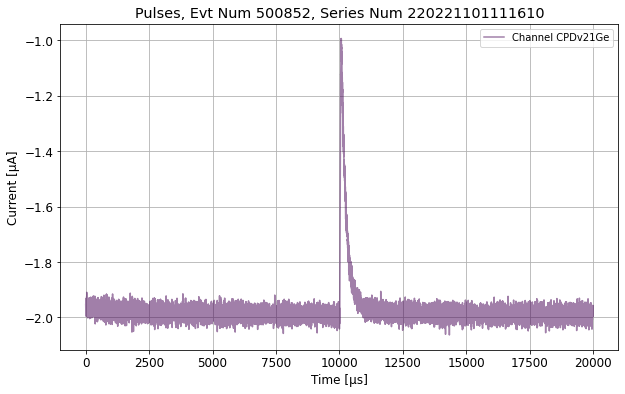

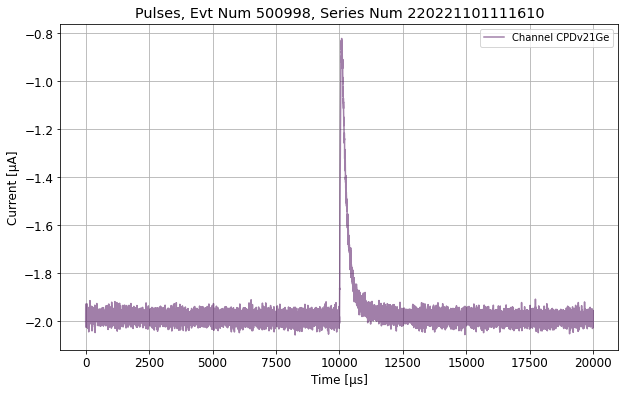

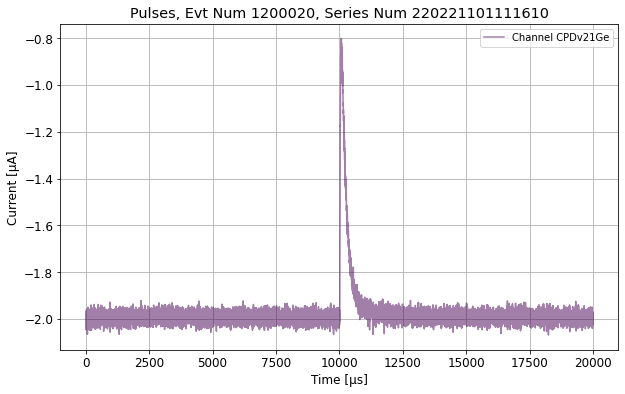

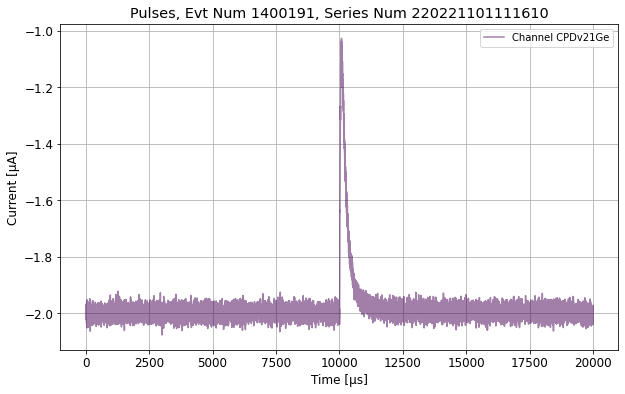

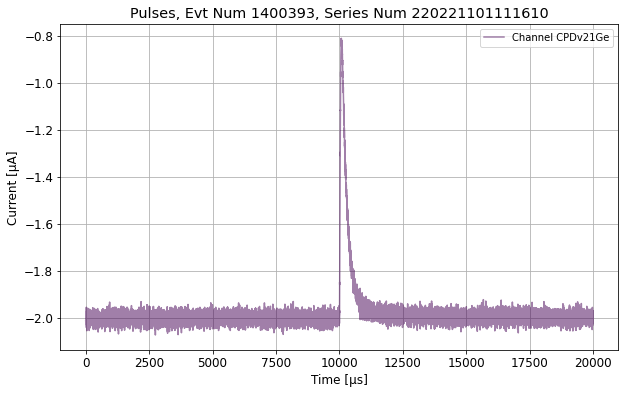

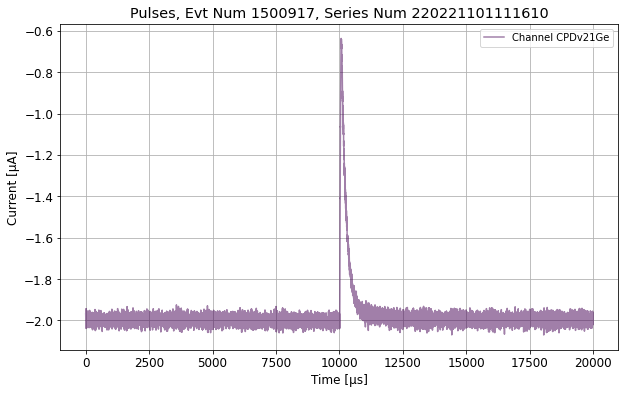

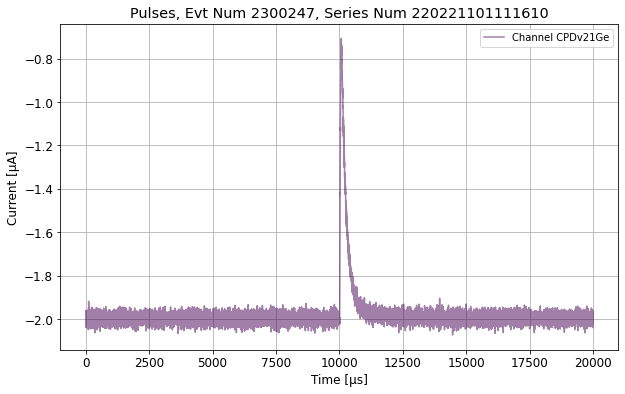

In [450]:
randsge = getrandevents(trigger_path,
    df_nosr21.eventnumber,
    df_nosr21.seriesnumber,                    
    ntraces=100,
    nplot=10,
    channels=['CPDv21Ge'],
    cut=ctrigger_nosr21&cbaseline_nosr21&cchi2_temp_r21nos&ctemp_r21nos_ge,
    lgcplot=True)

In [451]:
t_r21nos_gaas = randsgaas[0]
x_r21nos_gaas = randsgaas[1]
cout_r21nos_gaas = randsgaas[2]
lowpassed_r21nos_lowpop = qp.utils.lowpassfilter(x_r21nos_gaas)

In [452]:
t_r21nos_ge = randsge[0]
x_r21nos_ge = randsge[1]
cout_r21nos_ge = randsge[2]
lowpassed_r21nos_ge = qp.utils.lowpassfilter(x_r21nos_ge)

## r20 Co

In [393]:
trigger_path = '/sdata1/runs/run20/processed/threshtrig_Co_12hr_I2_D20220915_T224645'

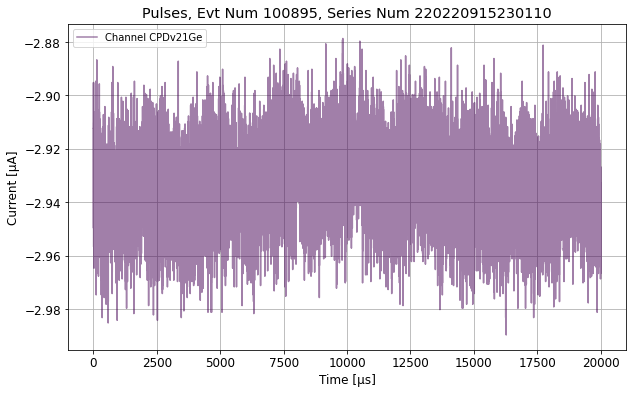

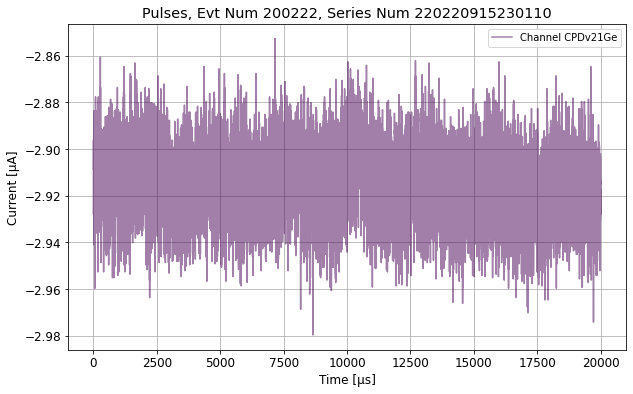

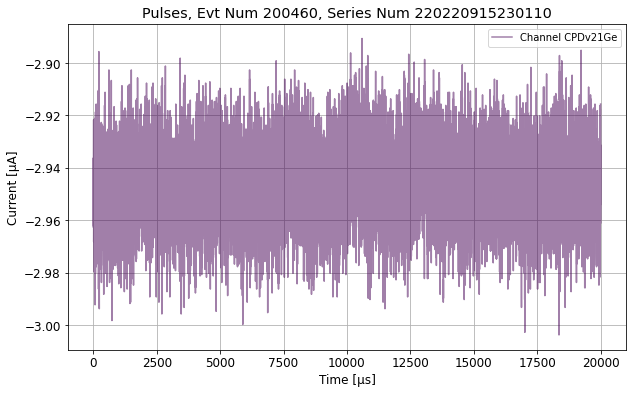

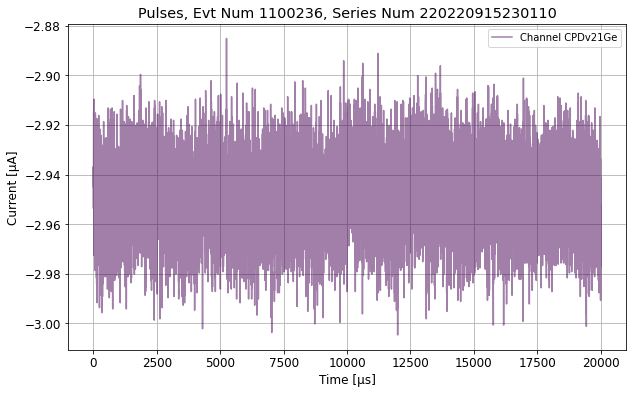

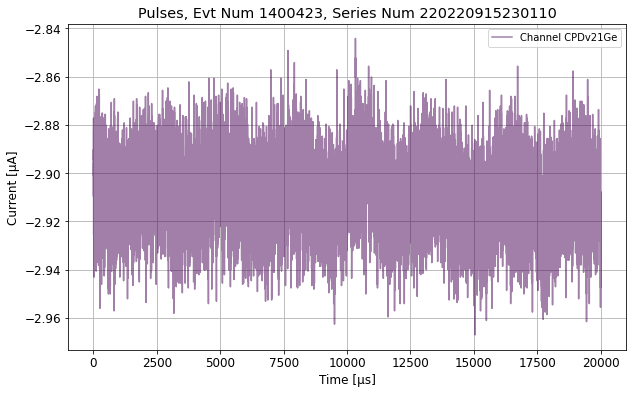

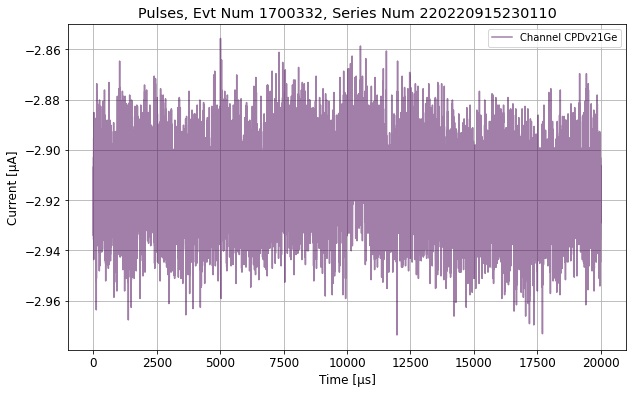

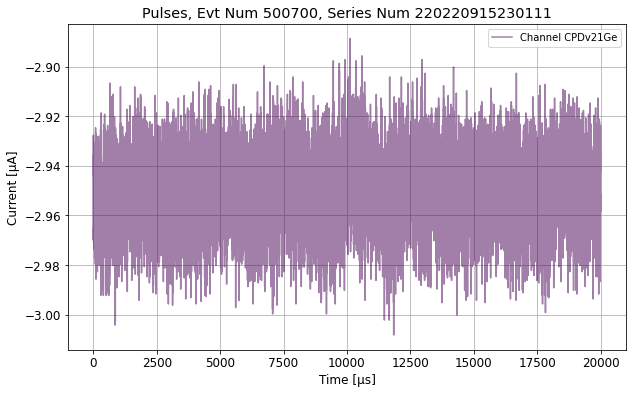

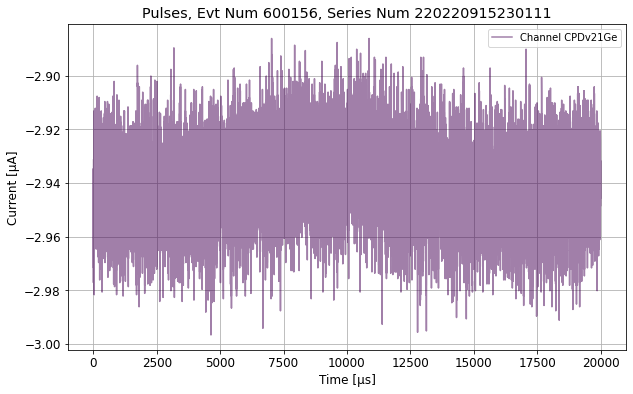

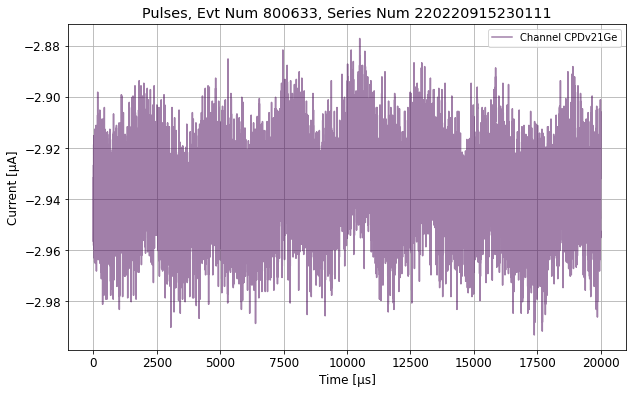

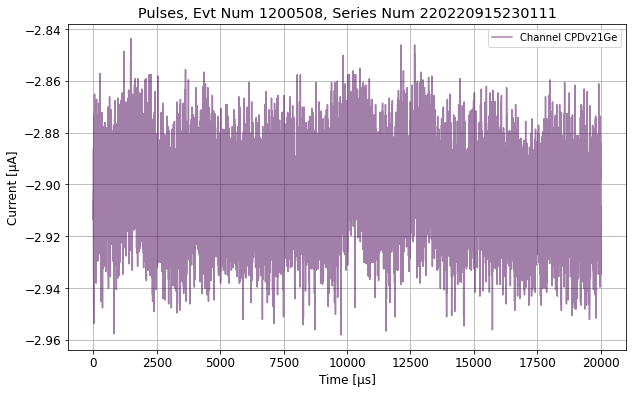

In [394]:
rands = getrandevents(trigger_path,
    df_Co.eventnumber,
    df_Co.seriesnumber,                    
    ntraces=100,
    nplot=10,
    channels=['CPDv21Ge'],
    cut=ctrigger_Co&cgoodtime_Co&cbaseline_Co&cchi2_temp_Co&ctemp_r20_lowpop,
    lgcplot=True)

## r18 both frames

In [539]:
trigger_path = '/sdata1/runs/run18/processed/gaas_v1_treshtrig'

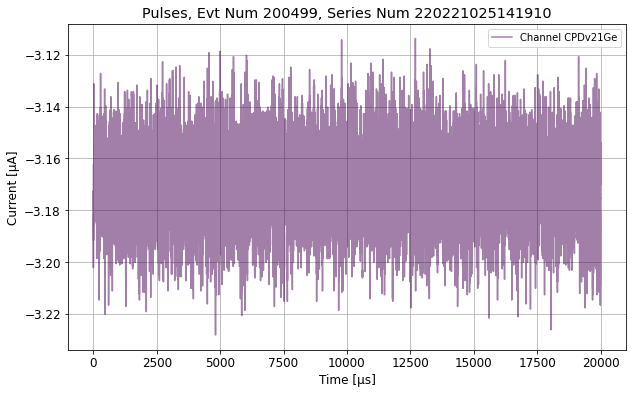

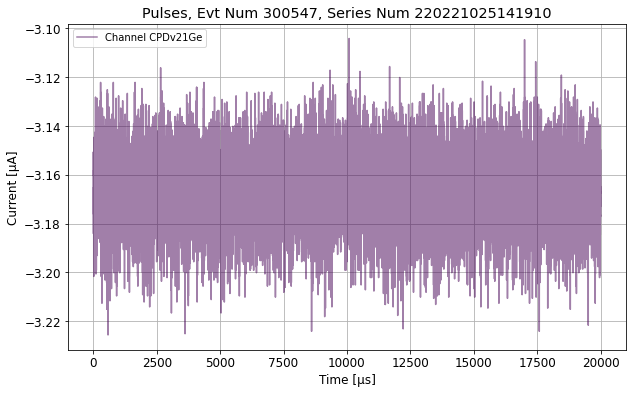

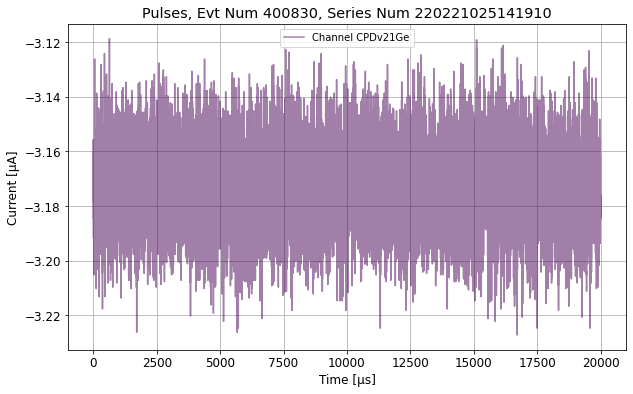

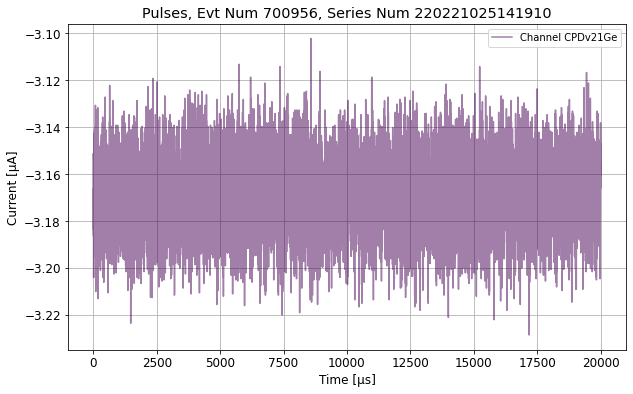

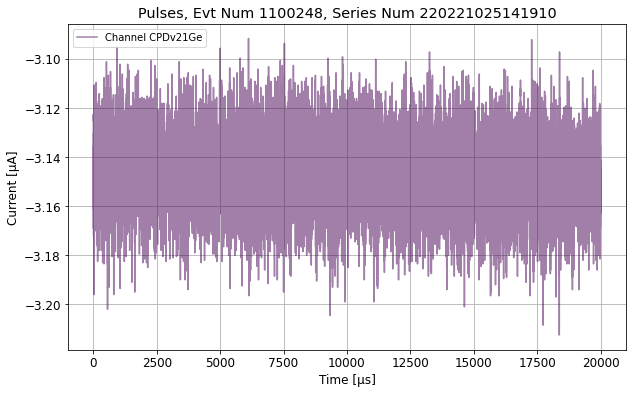

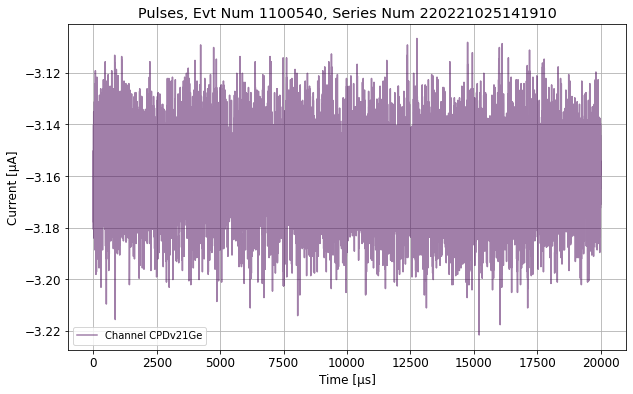

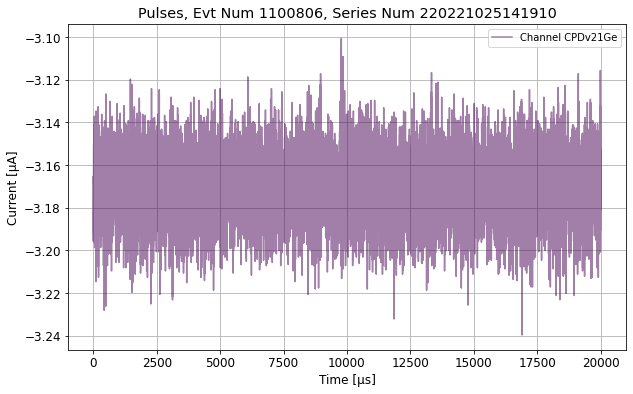

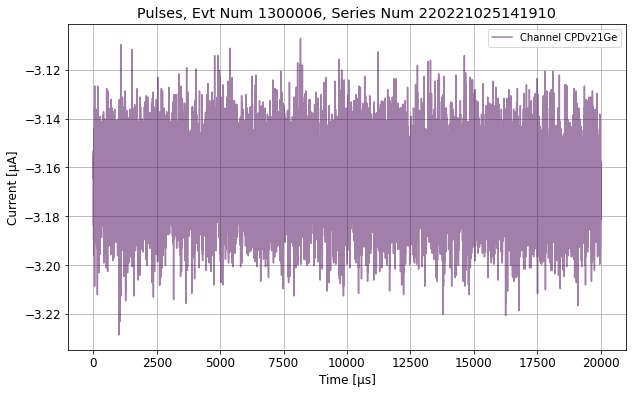

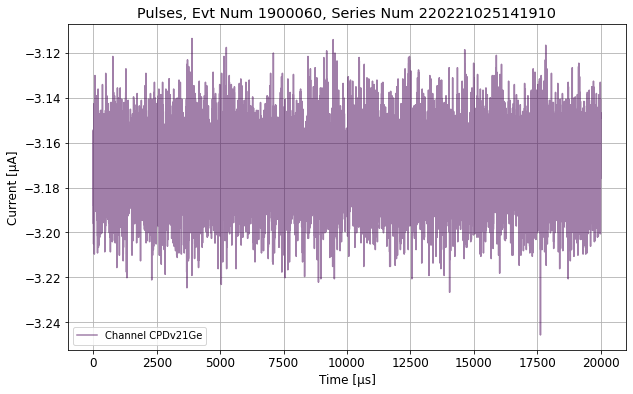

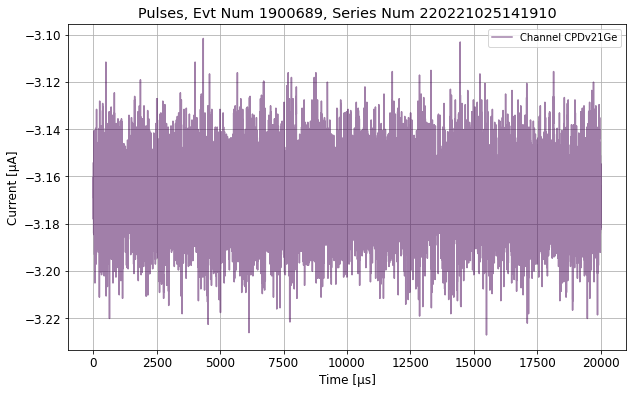

In [540]:
rands = getrandevents(trigger_path,
    df_both.eventnumber_gaas,
    df_both.seriesnumber_gaas,                    
    ntraces=100,
    nplot=10,
    channels=['CPDv21Ge'],
    cut=ctrigger_both&cgoodtime_r18&cbaseline_bgaas&cchi2_temp_bgaas&ctemp_r18bgaas_lowpop,
    lgcplot=True)

In [541]:
t_r18bgaas_lowpop = rands[0]
x_r18bgaas_lowpop = rands[1]
cout_r18bgaas_lowpop = rands[2]
lowpassed_r18bgaas_lowpop = qp.utils.lowpassfilter(x_r18bgaas_lowpop)

Text(0.5, 1.0, 'lpf pulses (low energy population)')

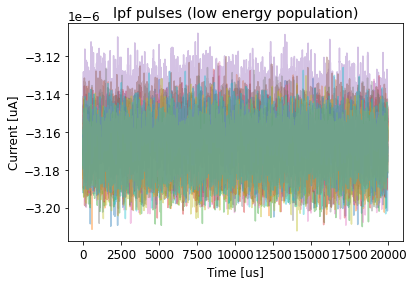

In [544]:
for xx in lowpassed_r18bgaas_lowpop[0:10,0]:
    plt.plot(t_r18bgaas_lowpop*1e6, xx, alpha=0.4)
plt.xlabel('Time [us]')
plt.ylabel('Current [uA]')
plt.title('lpf pulses (low energy population)')

# plotting fits of GaAs vs Ge fall times

## R21 nos 

In [440]:
yaml_path = '/data/users/da_real_maggie_reed/analysis/run_21/data/process_r21_nos3pt5sig.yaml'

In [441]:
with open(yaml_path) as f:
    yaml_dict = yaml.load(f)
NLIN = (qp.OFnonlin(np.loadtxt
                (yaml_dict['CPDv21Ge']
                ['psd_path']), 1.25e6)
       )

Text(0.5, 0, 'Time [us]')

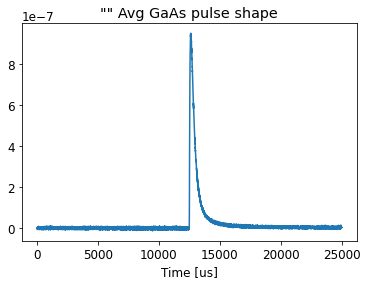

In [453]:
x_temp = np.zeros(x_r21nos_gaas.shape)
for ii in range(x_r21nos_gaas.shape[0]):
    ts = np.roll(x_r21nos_gaas[ii,0],-int(df_nosr21.oft0_constrained_CPDv21Ge[cout_r21nos_gaas].iloc[ii]*fs))
    ts-= np.mean(ts[0:6000])
    x_temp[ii] = ts/ts.max()
x_avg_r21nosgaas = np.mean(x_temp, axis = 0)*1e-6 
plt.plot(x_avg_r21nosgaas[0])
plt.title('"" Avg GaAs pulse shape')
plt.xlabel('Time [us]')

Text(0.5, 0, 'Time [us]')

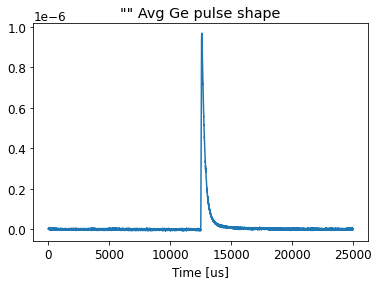

In [454]:
x_temp = np.zeros(x_r21nos_ge.shape)
for ii in range(x_r21nos_ge.shape[0]):
    ts = np.roll(x_r21nos_ge[ii,0],-int(df_nosr21.oft0_constrained_CPDv21Ge[cout_r21nos_ge].iloc[ii]*fs))
    ts-= np.mean(ts[0:6000])
    x_temp[ii] = ts/ts.max()
x_avg_r21nosge = np.mean(x_temp, axis = 0)*1e-6 
plt.plot(x_avg_r21nosge[0])
plt.title('"" Avg Ge pulse shape')
plt.xlabel('Time [us]')

643.733308840943
[[ 2.01100370e-16  2.26402128e-17  8.94921039e-15 -2.76755634e-14
  -3.05273056e-13 -2.61344171e-15]
 [ 2.26402128e-17  2.13462780e-17  1.35388613e-15 -9.78319697e-15
  -4.12428070e-13 -2.26645810e-16]
 [ 8.94921039e-15  1.35388613e-15  4.73981521e-13 -1.26537620e-12
  -2.19444918e-11 -1.60607193e-13]
 [-2.76755634e-14 -9.78319697e-15 -1.26537620e-12  6.51543750e-12
   1.71814706e-10  2.57491968e-13]
 [-3.05273056e-13 -4.12428070e-13 -2.19444918e-11  1.71814706e-10
   9.56596280e-09  3.05062482e-12]
 [-2.61344171e-15 -2.26645810e-16 -1.60607193e-13  2.57491968e-13
   3.05062482e-12  1.02787251e-13]]
(array([1.60730251e-06, 7.04402083e-08, 4.54565057e-05, 2.48500266e-04,
       1.66672349e-03, 9.99908616e-03]), array([1.41809862e-08, 4.62020324e-09, 6.88463159e-07, 2.55253550e-06,
       9.78057401e-05, 3.20604509e-07]), array([[ 2.01100370e-16,  2.26402128e-17,  8.94921039e-15,
        -2.76755634e-14, -3.05273056e-13, -2.61344171e-15],
       [ 2.26402128e-17,  2.1346

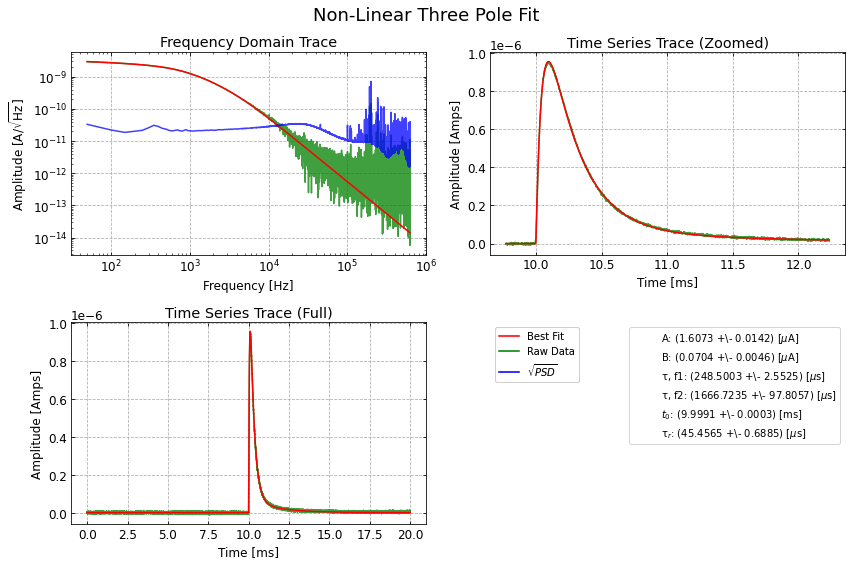

In [455]:
#returns amplitude or pulse height, rise time, fall time, time offset 
#1.5e-6, 0.1e-6, 18e-6, 100e-6, 1000e-6, 10.008e-3
threepolefit_gaas = NLIN.fit_falltimes(x_avg_r21nosgaas[0], npolefit=3, guess=(1e-6, 0.1e-6, 18e-6, 100e-6, 1000e-6, 10.008e-3), lgcplot=True, lgcfullrtn=True)
print(threepolefit_gaas[3]*(len(NLIN.data)-NLIN.dof))
print(threepolefit_gaas[2])
print(threepolefit_gaas)

395.52661894042296
[[ 1.49135952e-16  1.23376274e-17  5.49209045e-15 -1.59204603e-14
  -5.60536129e-14 -2.04040226e-15]
 [ 1.23376274e-17  3.84684742e-17  1.24589595e-15 -1.12873063e-14
  -5.03964063e-13 -2.69221100e-16]
 [ 5.49209045e-15  1.24589595e-15  2.72293230e-13 -7.30670342e-13
  -1.36089160e-11 -1.15045002e-13]
 [-1.59204603e-14 -1.12873063e-14 -7.30670342e-13  4.64126847e-12
   1.34109099e-10  1.81238902e-13]
 [-5.60536129e-14 -5.03964063e-13 -1.36089160e-11  1.34109099e-10
   7.71684912e-09  2.64966296e-12]
 [-2.04040226e-15 -2.69221100e-16 -1.15045002e-13  1.81238902e-13
   2.64966296e-12  8.27651418e-14]]
(array([1.44792550e-06, 5.84554149e-08, 2.52141501e-05, 1.78606219e-04,
       1.05682019e-03, 1.00196988e-02]), array([1.22121232e-08, 6.20229588e-09, 5.21817238e-07, 2.15436034e-06,
       8.78455982e-05, 2.87689315e-07]), array([[ 1.49135952e-16,  1.23376274e-17,  5.49209045e-15,
        -1.59204603e-14, -5.60536129e-14, -2.04040226e-15],
       [ 1.23376274e-17,  3.84

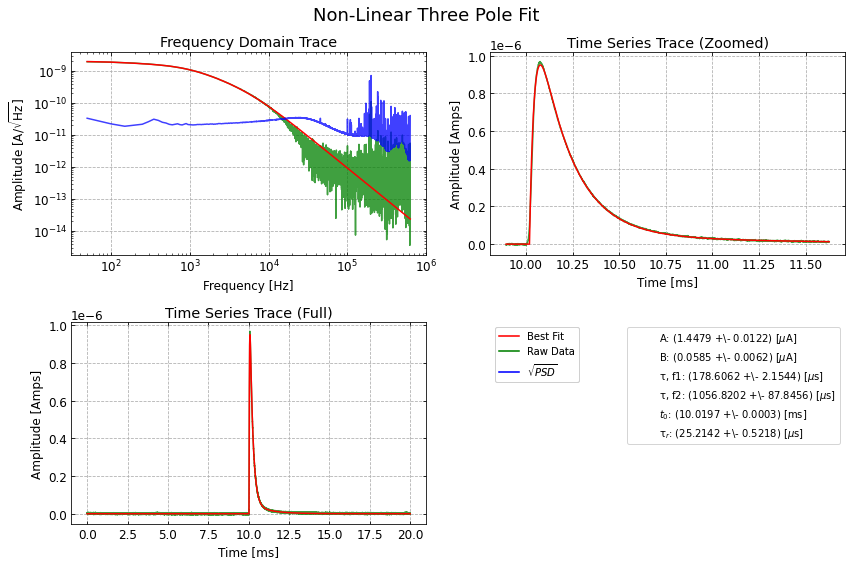

In [456]:
#returns amplitude or pulse height, rise time, fall time, time offset 
#1.5e-6, 0.1e-6, 18e-6, 100e-6, 1000e-6, 10.008e-3
threepolefit_ge = NLIN.fit_falltimes(x_avg_r21nosge[0], npolefit=3, guess=(1e-6, 0.1e-6, 18e-6, 100e-6, 1000e-6, 10.008e-3), lgcplot=True, lgcfullrtn=True)
print(threepolefit_ge[3]*(len(NLIN.data)-NLIN.dof))
print(threepolefit_ge[2])
print(threepolefit_ge)

# Rate / hist plots

## r21 nos

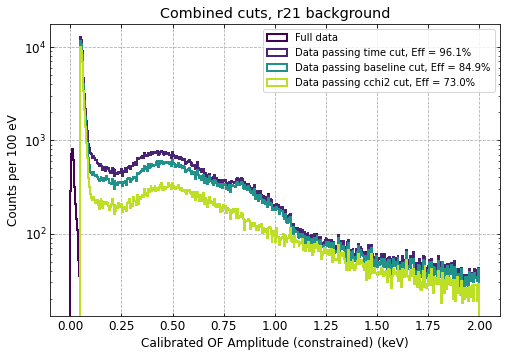

In [608]:
fig, ax = plt.subplots(figsize=np.array([1.5, 1]) * (5 + 3/8))
_, ax = dp.hist(
    calibratedofamp_nosr21_constrained,
    xlims=(0, 2),
    ax=ax,
    nbins=500,
#     cmap='binary_r',
    cuts=[ctrigger_nosr21,cbaseline_nosr21,cchi2_nosr21],
    labeldict = {'title' : 'Combined cuts, r21 background',
                'xlabel' : 'Calibrated OF Amplitude (constrained) (keV)',
                'ylabel' : 'Counts per 100 eV',
                 'cut0' : 'time',
                 'cut1' : 'baseline',
                 'cut2' : 'cchi2'
                },
    lgcrawdata=True,
)


'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30min_calib_absenergy_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

## r21 co hists

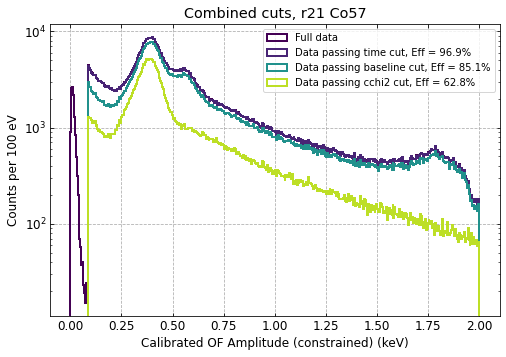

In [607]:
fig, ax = plt.subplots(figsize=np.array([1.5, 1]) * (5 + 3/8))
_, ax = dp.hist(
    calibratedofamp_constrained,
    xlims=(0, 2),
    ax=ax,
    nbins=500,
#     cmap='binary_r',
    cuts=[ctrigger,cbaseline,cchi2_temp],
    labeldict = {'title' : 'Combined cuts, r21 Co57',
                'xlabel' : 'Calibrated OF Amplitude (constrained) (keV)',
                'ylabel' : 'Counts per 100 eV',
                 'cut0' : 'time',
                 'cut1' : 'baseline',
                 'cut2' : 'cchi2'
                },
    lgcrawdata=True,
)



'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30min_calib_absenergy_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

## r18 both frames

In [600]:
cr18bgaas_trigtime = ctrigger_both&cgoodtime_r18

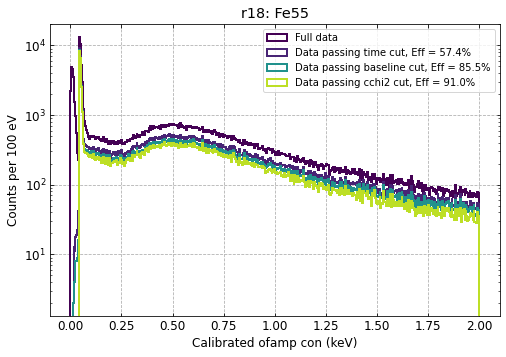

In [606]:
fig, ax = plt.subplots(figsize=np.array([1.5, 1]) * (5 + 3/8))
_, ax = dp.hist(
    calibratedofamp_bgaas_constrained,
    xlims=(0, 2),
    ax=ax,
    nbins=500,
#     cmap='binary_r',
    cuts=[cr18bgaas_trigtime,cbaseline_bgaas,cchi2_temp_bgaas],
    labeldict = {'title' : 'Combined cuts, r18 Fe55',
                'xlabel' : 'Calibrated OF Amplitude (constrained) (keV)',
                'ylabel' : 'Counts per 100 eV',
                 'cut0' : 'time',
                 'cut1' : 'baseline',
                 'cut2' : 'cchi2'
                },
    lgcrawdata=True,
)

ax.set_title('r18: Fe55')
ax.set_xlabel(r'Calibrated ofamp con (keV)')

'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30min_calib_absenergy_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

## r21 Co

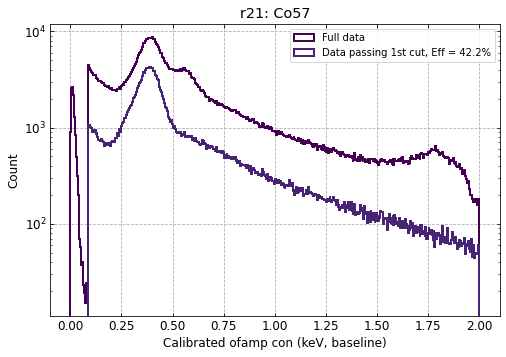

In [345]:
fig, ax = plt.subplots(figsize=np.array([1.5, 1]) * (5 + 3/8))
_, ax = dp.hist(
    calibratedofamp_constrainedv1,
    xlims=(0, 2),
    ax=ax,
    nbins=500,
#     cmap='binary_r',
    cuts=[ctrigger&ctime&cbaseline&cchi2_temp],
    lgcrawdata=True,
)

ax.set_title('r21: Co57')
ax.set_xlabel(r'Calibrated ofamp con (keV, baseline)')

'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30min_calib_absenergy_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

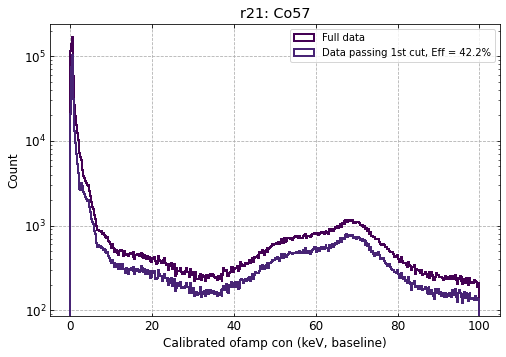

In [826]:
fig, ax = plt.subplots(figsize=np.array([1.5, 1]) * (5 + 3/8))
_, ax = dp.hist(
    calibratedenergy,
    xlims=(0, 100),
    ax=ax,
    nbins=500,
#     cmap='binary_r',
    cuts=[c_good_events_r21co],
    lgcrawdata=True,
)

ax.set_title('r21: Co57')
ax.set_xlabel(r'Calibrated ofamp con (keV, baseline)')

'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30min_calib_absenergy_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

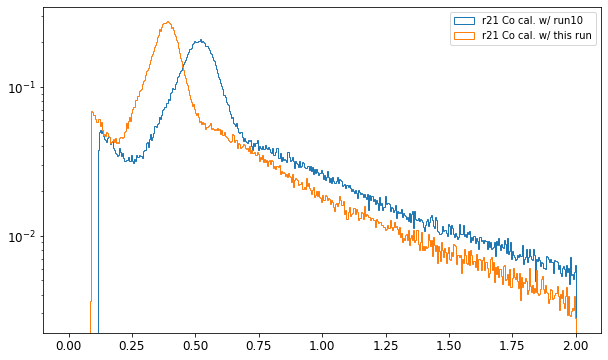

In [814]:
(counts, bins)=np.histogram(df.ofamp_constrained_CPDv21Ge[c_good_events_r21co]/m_run10,bins=500,range=(0,2))
plt.figure(figsize=(10,6))
#histbins = np.histogram_bin_edges(calibratedofamp,bins=500,range=(0,8),weights=np.full_like(calibratedofamp,1/(df.eventtime[ctrigger].iloc[-1]-df.eventtime.iloc[0])))
plt.hist(
    bins[:-1],
    bins,
    weights=counts/(df.eventtime[ctrigger].iloc[-1]-df.eventtime.iloc[0]),
    range=(0,2),
    log=True,
    histtype='step',
    label='r21 Co cal. w/ run10'
)
(counts, bins)=np.histogram(df.ofamp_constrained_CPDv21Ge[c_good_events_r21co]/fitslope,bins=500,range=(0,2))

plt.hist(
    bins[:-1],
    bins,
    weights=counts/(df.eventtime[ctrigger].iloc[-1]-df.eventtime.iloc[0]),
    range=(0,2),
    log=True,
    histtype='step',
    label='r21 Co cal. w/ this run'
)
plt.legend(loc='upper right')
plt.show()

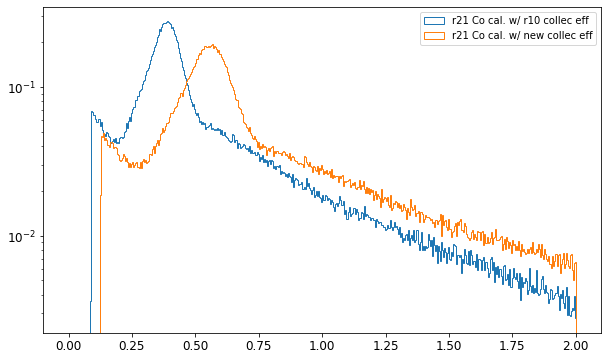

In [852]:
(counts, bins)=np.histogram(df.ofamp_constrained_CPDv21Ge[c_good_events_r21co]/fitslope,bins=500,range=(0,2))
plt.figure(figsize=(10,6))
#histbins = np.histogram_bin_edges(calibratedofamp,bins=500,range=(0,8),weights=np.full_like(calibratedofamp,1/(df.eventtime[ctrigger].iloc[-1]-df.eventtime.iloc[0])))
plt.hist(
    bins[:-1],
    bins,
    weights=counts/(df.eventtime[ctrigger].iloc[-1]-df.eventtime.iloc[0]),
    range=(0,2),
    log=True,
    histtype='step',
    label='r21 Co cal. w/ r10 collec eff'
)
(counts, bins)=np.histogram(df.ofamp_constrained_CPDv21Ge[c_good_events_r21co]/fitslope2,bins=500,range=(0,2))

plt.hist(
    bins[:-1],
    bins,
    weights=counts/(df.eventtime[ctrigger].iloc[-1]-df.eventtime.iloc[0]),
    range=(0,2),
    log=True,
    histtype='step',
    label='r21 Co cal. w/ new collec eff'
)
plt.legend(loc='upper right')
plt.show()

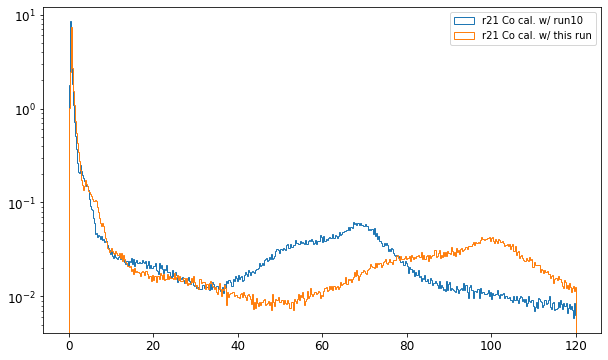

In [827]:
(counts, bins)=np.histogram(calibratedenergy[c_good_events_r21co],bins=500,range=(0,120))
plt.figure(figsize=(10,6))
#histbins = np.histogram_bin_edges(calibratedofamp,bins=500,range=(0,8),weights=np.full_like(calibratedofamp,1/(df.eventtime[ctrigger].iloc[-1]-df.eventtime.iloc[0])))
plt.hist(
    bins[:-1],
    bins,
    weights=counts/(df.eventtime[ctrigger].iloc[-1]-df.eventtime.iloc[0]),
    range=(0,120),
    log=True,
    histtype='step',
    label='r21 Co cal. w/ run10'
)
(counts, bins)=np.histogram(calibratedenergyv1[c_good_events_r21co],bins=500,range=(0,120))

plt.hist(
    bins[:-1],
    bins,
    weights=counts/(df.eventtime[ctrigger].iloc[-1]-df.eventtime.iloc[0]),
    range=(0,120),
    log=True,
    histtype='step',
    label='r21 Co cal. w/ this run'
)
plt.legend(loc='upper right')
plt.show()

### dr/de

In [56]:
#rate plotting 
from darklim.sensitivity import RatePlot

/usr/lib64/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/maggie_reed/.local/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


In [33]:
ge_cpdv2_diameter=(3*constants.inch)*1e2 #3 inches, converted to cm
ge_cpdv2_thickness=0.1 #cm
ge_cpdv2_vol = constants.pi*(ge_cpdv2_diameter/2)**2*ge_cpdv2_thickness
ge_density = 5.323 #g/cm^3
ge_cpdv2_mass = ge_cpdv2_vol*ge_density*1e-3 #kg
print(ge_cpdv2_mass*1000,"grams")

gaas_cpdv2_diameter=(2*constants.inch)*1e2 #2 inches, converted to cm
gaas_cpdv2_thickness= 1 #cm
gaas_cpdv2_vol = constants.pi*(gaas_cpdv2_diameter/2)**2*gaas_cpdv2_thickness
gaas_density = 5.323 #g/cm^3
gaas_cpdv2_mass = gaas_cpdv2_vol*gaas_density*1e-3 #kg
print(gaas_cpdv2_mass*1000,"grams")

#exposure units are in [kg-days]
#so for run20 stuff, 24[g] * runtime[sec]/24[hours] -> g/sec
#and for run19 stuff, 100[g] * runtime[sec]/24[hours] -> g/sec

24.27483520112382 grams
107.88815644943922 grams


<>:23: DeprecationWarning: invalid escape sequence \p
<>:23: DeprecationWarning: invalid escape sequence \p
<>:23: DeprecationWarning: invalid escape sequence \p
<ipython-input-103-4a63882e0fdb>:23: DeprecationWarning: invalid escape sequence \p
  ax.set_ylabel("$\partial R/\partial E_r$ [evts/keV/s]")


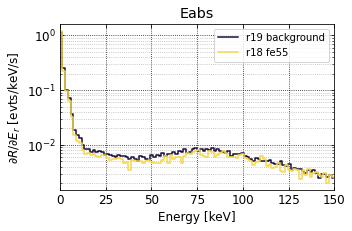

In [103]:
rateplot = RatePlot(
    (0, 150),
    figsize=np.array([1.5, 1]) * (3 + 3/8),
)
fig, ax = rateplot.fig, rateplot.ax

rateplot.add_data(
    calibratedenergy_Co[ctrigger_Co&cgoodtime_Co&cbaseline_Co&cchi2_temp_Co],
    1 * (tot_runtime_Co), efficiency = 0.1159, label = 'r20 Co57'
)
rateplot.add_data(
    calibratedenergy_r18fe[c_goodevents_r18fe],
    100/24 * (tot_runtime_r18fe), efficiency = 0.106346, label = 'r18 fe55'
)
'''
rateplot.add_data(
    calibratedenergy_r19Ba[ctrigger_r19Ba&cbaseline_r19Ba&cchi2_temp_r19Ba], 100/24 * (tot_runtime_r19Ba), 
    efficiency = 0.1074, label='r19 Ba'
)
''';
ax.set_title('Eabs')
ax.get_legend()
ax.set_ylabel("$\partial R/\partial E_r$ [evts/keV/s]")
#ax.set_ylim(1e3, 2e6)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k')

fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_20/figs/drde_all_normalized.png',
    dpi=500,
    facecolor='none',
)
#''';

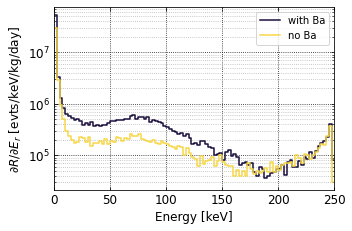

In [74]:
rateplot = RatePlot(
    (0, 250),
    figsize=np.array([1.5, 1]) * (3 + 3/8),
)

rateplot.add_data(
    (calibratedenergy), (10.8e-3 * .5/24),nbins=100, label = 'with Ba'
)
fig, ax = rateplot.fig, rateplot.ax

ax.set_title('')
ax.get_legend()
#ax.set_ylim(1e3, 2e6)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k')

fig.tight_layout()

rateplot.add_data(
    (calibratedenergy_noBa), (10.8e-3 * .5/24),nbins=100, label='no Ba'
)
ax.set_title('')
ax.get_legend()
#ax.set_ylim(1e3, 2e6)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k')

fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/drde_bavsnoba_30min.png',
    dpi=500,
    facecolor='none',
)
#''';

## r20 Co57

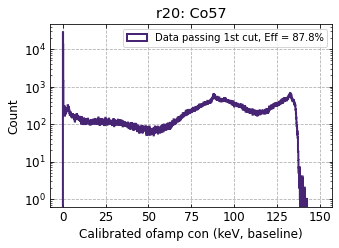

In [141]:
fig, ax = plt.subplots(figsize=np.array([1.5, 1]) * (3 + 3/8))
_, ax = dp.hist(
    calibratedofamp_Co_constrained,
    xlims=(0, 150),
    ax=ax,
    nbins=1500,
#     cmap='binary_r',
    cuts=[ctrigger_Co&cbaseline_Co],
    lgcrawdata=False,
)

ax.set_title('r20: Co57')
ax.set_xlabel(r'Calibrated ofamp con (keV, baseline)')

'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_19/figs/Be_30min_calib_absenergy_nocuts.png',
    dpi=500,
    facecolor='none',
)
#''';

## Combined hists

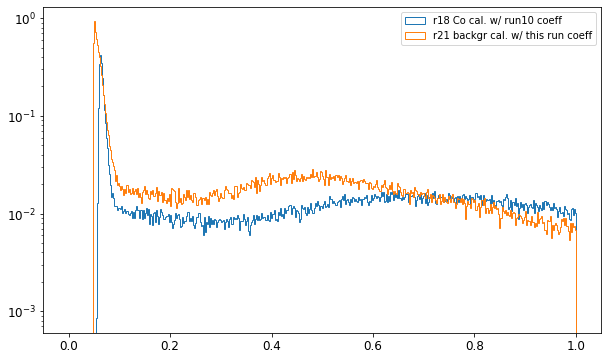

In [888]:
(counts, bins)=np.histogram(calibratedofamp_bgaas_constrained[c_good_events_r18bgaas],bins=500,range=(0,1))
plt.figure(figsize=(10,6))
#histbins = np.histogram_bin_edges(calibratedofamp,bins=500,range=(0,8),weights=np.full_like(calibratedofamp,1/(df.eventtime[ctrigger].iloc[-1]-df.eventtime.iloc[0])))
plt.hist(
    bins[:-1],
    bins,
    weights=counts/(df_both.eventtime_gaas[ctrigger_both].iloc[-1]-df_both.eventtime_gaas.iloc[0]),
    range=(0,1),
    log=True,
    histtype='step',
    label='r18 Co cal. w/ run10 coeff'
)
(counts, bins)=np.histogram(df_both_nos.ofamp_constrained_CPDv21Ge_gaas[c_good_events_nosbgaas]/fitslope,bins=500,range=(0,1))

plt.hist(
    bins[:-1],
    bins,
    weights=counts/(df_both_nos.eventtime_gaas[ctrigger_both_nos].iloc[-1]-df_both_nos.eventtime_gaas.iloc[0]),
    range=(0,1),
    log=True,
    histtype='step',
    label='r21 backgr cal. w/ this run coeff'
)
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'Hz per 4 eV')

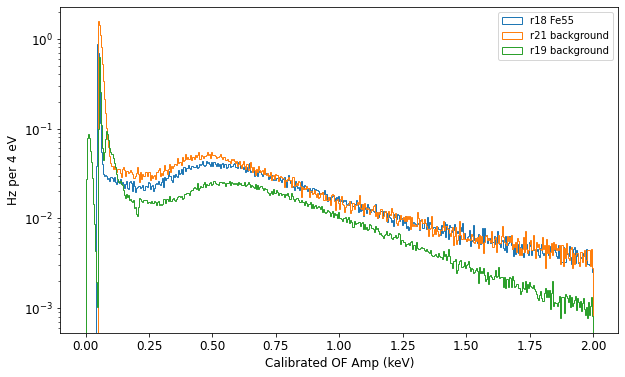

In [592]:
(counts, bins)=np.histogram(calibratedofamp_bgaas_constrained[c_good_events_r18bgaas],bins=500,range=(0,2))
plt.figure(figsize=(10,6))
#histbins = np.histogram_bin_edges(calibratedofamp,bins=500,range=(0,8),weights=np.full_like(calibratedofamp,1/(df.eventtime[ctrigger].iloc[-1]-df.eventtime.iloc[0])))
plt.hist(
    bins[:-1],
    bins,
    weights=counts/(df_both.eventtime_gaas[ctrigger_both].iloc[-1]-df_both.eventtime_gaas.iloc[0]),
    range=(0,2),
    log=True,
    histtype='step',
    label='r18 Fe55'
)
(counts, bins)=np.histogram(calibratedofamp_nosr21_constrainedv1[c_good_events_r21nos],bins=500,range=(0,2))

plt.hist(
    bins[:-1],
    bins,
    weights=counts/(df_nosr21.eventtime[ctrigger_nosr21].iloc[-1]-df_nosr21.eventtime.iloc[0]),
    range=(0,2),
    log=True,
    histtype='step',
    label='r21 background'
)
(counts, bins)=np.histogram(calibratedofamp_r19nos_constrained[c_good_events_r19nos],bins=500,range=(0,2))

plt.hist(
    bins[:-1],
    bins,
    weights=counts/(df_r19nos.eventtime[ctrigger_r19nos].iloc[-1]-df_r19nos.eventtime.iloc[0]),
    range=(0,2),
    log=True,
    histtype='step',
    label='r19 background'
)

plt.legend(loc='upper right')
plt.xlabel('Calibrated OF Amp (keV)')
plt.ylabel('Hz per 4 eV')

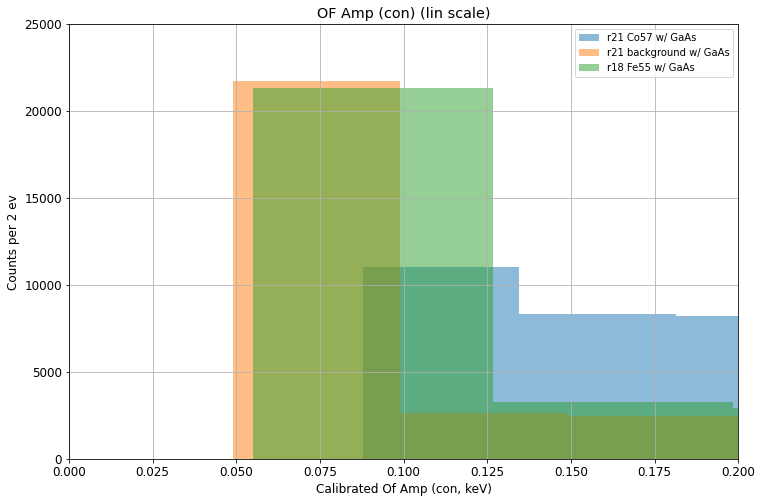

In [572]:
scaling = False
plt.figure(figsize=(12,8))
'''
plt.hist(df_Co.ofamp_constrained_CPDv21Ge[ctrigger_Co&cgoodtime_Co&cbaseline_Co&cchi2_temp_Co&np.invert(ctemp_r20_lowpop)]/fitslope,
        bins=10000, log=scaling, label='r20 Co57')
        ''';
plt.hist(df.ofamp_constrained_CPDv21Ge[ctrigger&ctime&cbaseline&cchi2_temp]/fitslope,
        bins=2000, log=scaling, alpha = 0.5, label='r21 Co57 w/ GaAs')
plt.hist(df_nosr21.ofamp_constrained_CPDv21Ge[ctrigger_nosr21&cbaseline_nosr21&cchi2_nosr21]/fitslope,
        bins=2000, log=scaling, alpha = 0.5, label='r21 background w/ GaAs')
plt.hist(calibratedofamp_bgaas_constrained[ctrigger_both&cgoodtime_r18&cbaseline_bgaas&cchi2_temp_bgaas],
        bins=2000, log=scaling, alpha = 0.5, label='r18 Fe55 w/ GaAs')
plt.xlim(0,0.2)
plt.ylim(0,25000)
plt.legend(loc="upper right")
plt.title('OF Amp (con) (lin scale)')
plt.ylabel('Counts per 2 ev')
plt.xlabel('Calibrated Of Amp (con, keV)')
plt.grid(visible=True)
'''
plt.savefig('/data/users/da_real_maggie_reed/analysis/run_21/figs/allplusr18_lin_ofamp_zoom_hist.png',
    dpi=500,
    facecolor='none',)
    #''';
plt.show()

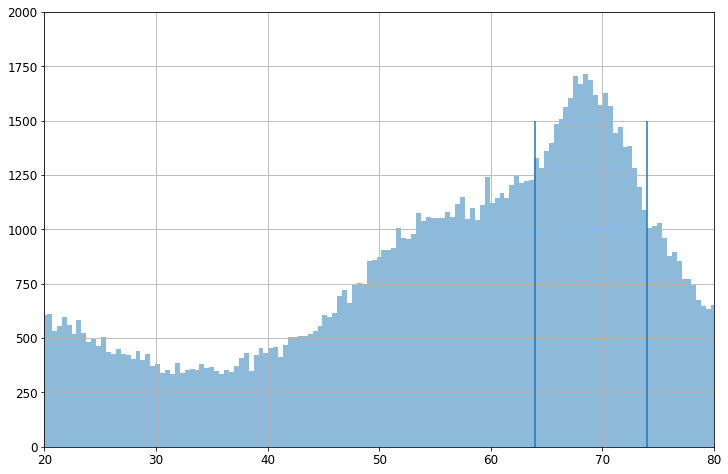

In [626]:
plt.figure(figsize=(12,8))

plt.hist(calibratedenergy[ctrigger&ctime&cbaseline&cchi2_temp],
        bins=600, log=scaling, alpha = 0.5, label='r21 Co57 w/ GaAs')
plt.xlim(20,80)
plt.ylim(0,2000)
plt.grid(visible=True)
plt.vlines(64, 0, 1500)
plt.vlines(74, 0, 1500)

plt.show()

#r21copeak = 1.7e-15

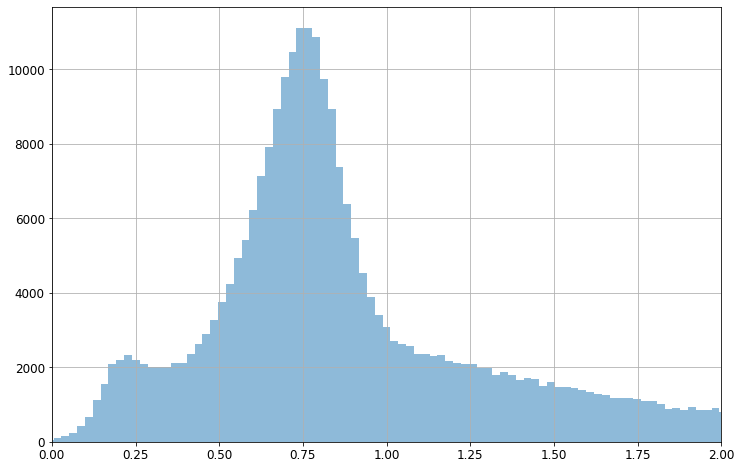

In [616]:
plt.figure(figsize=(12,8))

plt.hist(calibratedenergyv1[ctrigger&ctime&cbaseline&cchi2_temp],
        bins=20000, log=scaling, alpha = 0.5, label='r21 Co57 w/ GaAs')
plt.xlim(0,2)
#plt.ylim(0,2000)
plt.grid(visible=True)
plt.show()

#r21copeak = 1.7e-15

In [621]:
.75/122

0.006147540983606557

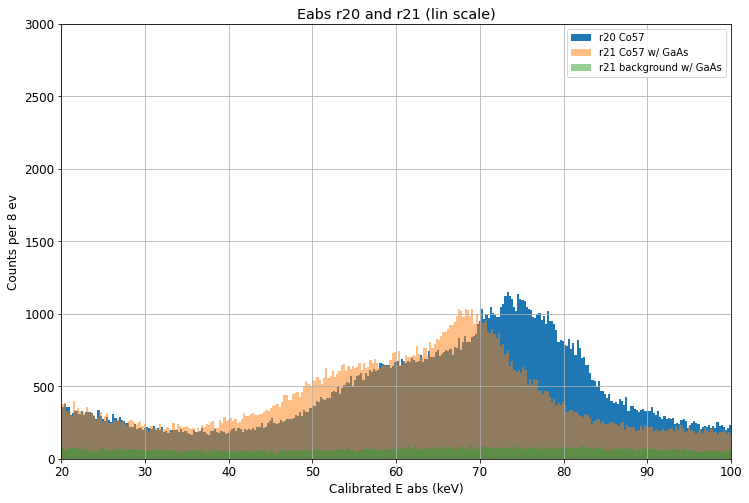

In [466]:
scaling = False
plt.figure(figsize=(12,8))
plt.hist(calibratedenergy_Co[ctrigger_Co&cgoodtime_Co&cbaseline_Co&cchi2_temp_Co&np.invert(ctemp_r20_lowpop)],
        bins=1000, log=scaling, label='r20 Co57')
plt.hist(calibratedenergy[ctrigger&ctime&cbaseline&cchi2_temp],
        bins=1000, log=scaling, alpha = 0.5, label='r21 Co57 w/ GaAs')
plt.hist(calibratedenergy_nosr21[ctrigger_nosr21&cbaseline_nosr21&cchi2_temp_r21nos&np.invert(ctemp_r21_lowpop)],
        bins=1000, log=scaling, alpha = 0.5, label='r21 background w/ GaAs')
plt.xlim(20,100)
plt.ylim(0,3000)
plt.legend(loc="upper right")
plt.title('Eabs r20 and r21 (lin scale)')
plt.ylabel('Counts per 8 ev')
plt.xlabel('Calibrated E abs (keV)')
plt.grid(visible=True)
'''
plt.savefig('/data/users/da_real_maggie_reed/analysis/run_21/figs/all_lin_ofamp_zoom_hist.png',
    dpi=500,
    facecolor='none',)
    #''';
plt.show()

## dR/dE combined

In [551]:
print(tot_runtime_Co, tot_runtime, tot_runtime_nosr21, tot_runtime_both, tot_runtime_r19nos, tot_runtime_nos)


43414.74797987938 43382.956971883774 10840.95832490921 19898.911783218384 50641.9198384285 43411.60212159157


In [576]:
realtime_r21Co = df.eventtime[ctrigger&ctime].iloc[-1]-df.eventtime[ctrigger&ctime].iloc[0]
print(realtime_r21Co)
realtime_r19nos = df_r19nos.eventtime[ctrigger_r19nos&cgoodtime_r19nosv3].iloc[-1]-df_r19nos.eventtime[ctrigger_r19nos&cgoodtime_r19nosv3].iloc[0]
print(realtime_r19nos)
realtime_r20nos = df_nos.eventtime[ctrigger_nos&cgoodtime_nos].iloc[-1]-df_nos.eventtime[ctrigger_nos&cgoodtime_nos].iloc[0]
print(realtime_r20nos)

35318.95754241943
50641.9198384285
43411.60212159157


In [92]:
realtime_r20Co = df_Co.eventtime[ctrigger_Co&cgoodtime_Co].iloc[-1]-df_Co.eventtime[ctrigger_Co&cgoodtime_Co].iloc[0]
print(realtime_r20Co)

43414.74797987938


In [557]:
realtime_r18bgaas = df_both.eventtime_gaas[ctrigger_both&cgoodtime_r18].iloc[-1]-df_both.eventtime_gaas[ctrigger_both&cgoodtime_r18].iloc[0]

In [94]:
#rate plotting 
from darklim.sensitivity import RatePlot

/usr/lib64/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/maggie_reed/.local/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


In [846]:
#c_good_events_r21nos = ctrigger_nosr21&cbaseline_nosr21&cchi2_nosr21
#c_good_events_r19nos = cgoodtime_r19nosv3&cbaseline_r19nos&cchi2_temp_r19nos&np.invert(c_temp_r19noslowpop)
#c_good_events_r18bgaas = ctrigger_both&cgoodtime_r18&cbaseline_bgaas&cchi2_temp_bgaas
#c_good_events_r20nos = ctrigger_nos&cgoodtime_nos&cbaseline_nos&cchi2_temp_nos
#c_good_events_r21co = ctrigger&ctime&cbaseline&cchi2_temp
#c_good_events_r20co = ctrigger_Co&cgoodtime_Co&cbaseline_Co&cchi2_r20co
c_good_events_r18bgaas2 = ctrigger_both&cbaseline_bgaas&cchi2_temp_bgaas
c_good_events_r19nos2 = ctrigger_r19nos&cbaseline_r19nos&np.invert(c_temp_r19noslowpop)&cchi2_temp_r19nos
c_good_events_r21nos2 = ctrigger_nosr21&cbaseline_nosr21&cchi2_nosr21
c_good_events_r20nos2 = ctrigger_nos&cbaseline_nos&cchi2_temp_nos
c_good_events_r21co2 = ctrigger&cbaseline&cchi2_temp
c_good_events_r20co2 = ctrigger_Co&cbaseline_Co&cchi2_r20co

<>:19: DeprecationWarning: invalid escape sequence \p
<>:19: DeprecationWarning: invalid escape sequence \p
<>:19: DeprecationWarning: invalid escape sequence \p
<ipython-input-864-1061a3a6c8c1>:19: DeprecationWarning: invalid escape sequence \p
  ax.set_ylabel("$\partial R/\partial E_r$ [evts/keV/s]")


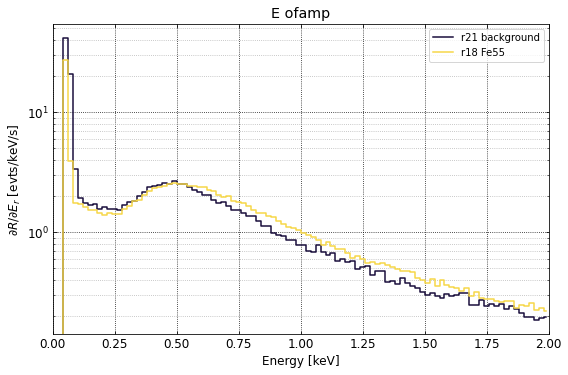

In [864]:
rateplot = RatePlot(
    (0, 2),
    figsize=np.array([1.5, 1]) * (5 + 3/8),
)
fig, ax = rateplot.fig, rateplot.ax

rateplot.add_data(
    df_nosr21.ofamp_constrained_CPDv21Ge[ctrigger_nosr21&cbaseline_nosr21&cchi2_nosr21]/fitslope,
     (tot_runtime_nosr21), efficiency = rand_eff_r21nos, label = 'r21 background'
)

rateplot.add_data(
    df_both.ofamp_constrained_CPDv21Ge_gaas[c_good_events_r18bgaas2]/fitslope,
    (tot_runtime_both), efficiency = rand_eff_r18bgaas2, label = 'r18 Fe55'
)

ax.set_title('E ofamp')
ax.get_legend()
ax.set_ylabel("$\partial R/\partial E_r$ [evts/keV/s]")
#ax.set_ylim(1e3, 2e6)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k')
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_20/figs/drde_all_normalized.png',
    dpi=500,
    facecolor='none',
)
#''';

<>:25: DeprecationWarning: invalid escape sequence \p
<>:25: DeprecationWarning: invalid escape sequence \p
<>:25: DeprecationWarning: invalid escape sequence \p
<ipython-input-899-88d8eb995bca>:25: DeprecationWarning: invalid escape sequence \p
  ax.set_ylabel("$\partial R/\partial E_r$ [evts/keV/s]")


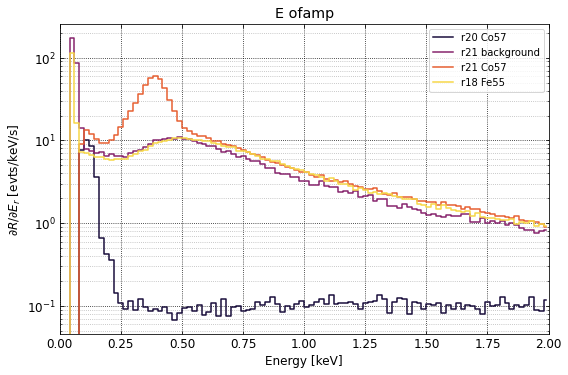

In [899]:
rateplot = RatePlot(
    (0, 2),
    figsize=np.array([1.5, 1]) * (5 + 3/8),
)
fig, ax = rateplot.fig, rateplot.ax

rateplot.add_data(
    df_Co.ofamp_constrained_CPDv21Ge[c_good_events_r20co2]/fitslope,
    (tot_runtime_Co), efficiency = rand_eff_r20co2, label = 'r20 Co57'
)
rateplot.add_data(
    df_nosr21.ofamp_constrained_CPDv21Ge[c_good_events_r21nos2]/fitslope,
    (tot_runtime_nosr21), efficiency = rand_eff_r21nos, label = 'r21 background'
)
rateplot.add_data(
    df.ofamp_constrained_CPDv21Ge[c_good_events_r21co2]/fitslope,
    (tot_runtime), efficiency = rand_eff_r21Co2, label = 'r21 Co57'
)
rateplot.add_data(
    df_both.ofamp_constrained_CPDv21Ge_gaas[c_good_events_r18bgaas2]/fitslope,
   (tot_runtime_both), efficiency = rand_eff_r18bgaas2, label = 'r18 Fe55'
)
ax.set_title('E ofamp')
ax.get_legend()
ax.set_ylabel("$\partial R/\partial E_r$ [evts/keV/s]")
#ax.set_ylim(1e3, 2e6)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k')
#ax.axvline(0.4)
fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_20/figs/drde_all_normalized.png',
    dpi=500,
    facecolor='none',
)
#''';

<>:32: DeprecationWarning: invalid escape sequence \p
<>:32: DeprecationWarning: invalid escape sequence \p
<>:32: DeprecationWarning: invalid escape sequence \p
<ipython-input-877-a802a7b6ea79>:32: DeprecationWarning: invalid escape sequence \p
  ax.set_ylabel("$\partial R/\partial E_r$ [evts/keV/s]")


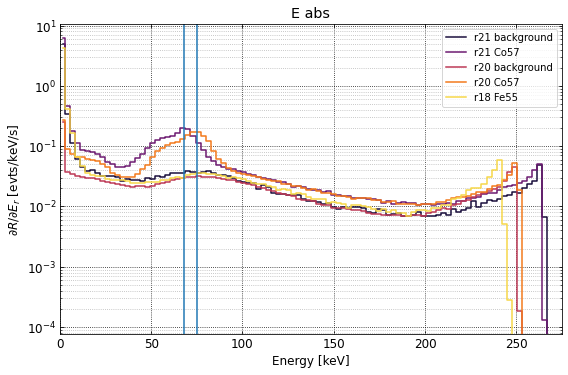

In [877]:
rateplot = RatePlot(
    (0, 275),
    figsize=np.array([1.5, 1]) * (5 + 3/8),
)
fig, ax = rateplot.fig, rateplot.ax


rateplot.add_data(
    calibratedenergy_nosr21[c_good_events_r21nos2],
    (tot_runtime_nosr21), efficiency = rand_eff_r21nos, label = 'r21 background'
)
rateplot.add_data(
    calibratedenergy[c_good_events_r21co2],
    (tot_runtime), efficiency = rand_eff_r21Co2, label = 'r21 Co57'
)
rateplot.add_data(
    calibratedenergy_nos[c_good_events_r20nos2],
    1 * (tot_runtime_nos), efficiency = randeff_r20nos2, label = 'r20 background'
)
rateplot.add_data(
    calibratedenergy_Co[c_good_events_r20co2],
    1 * (tot_runtime_Co), efficiency = rand_eff_r20co2, label = 'r20 Co57'
)

rateplot.add_data(
    calibratedenergy_bgaas[c_good_events_r18bgaas2],
    (tot_runtime_both), efficiency = rand_eff_r18bgaas2, label = 'r18 Fe55'
)

ax.set_title('E abs')
ax.get_legend()
ax.set_ylabel("$\partial R/\partial E_r$ [evts/keV/s]")
#ax.set_ylim(1e3, 2e6)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k')
ax.axvline(68)
ax.axvline(75)

fig.tight_layout()
'''
fig.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_20/figs/drde_all_normalized.png',
    dpi=500,
    facecolor='none',
)
#''';

# Integrated Rate Ab Thresh

In [558]:
#c_good_events_r20co = ctrigger_Co&cgoodtime_Co&cbaseline_Co&cchi2_r20co
#c_good_events_r21nos = ctrigger_nosr21&cbaseline_nosr21&cchi2_r21nos
#c_good_events_r21co = ctrigger&ctime&cbaseline&cchi2_temp
c_good_events_r18bgaas = ctrigger_both&cgoodtime_r18&cbaseline_bgaas&cchi2_temp_bgaas
#ctrigger_nosr21&cbaseline_nosr21&cchi2_temp_r21nos&np.invert(ctemp_r21_lowpop)
c_good_events_r19nos = cgoodtime_r19nosv3&cbaseline_r19nos&cchi2_temp_r19nos&np.invert(c_temp_r19noslowpop)

In [353]:
def calc_rate_e_depend(e_recon, exp_time, efficiency):
    sorted_e_recon = np.sort(e_recon)
    sorted_sum = np.zeros(len(sorted_e_recon))
    for ii, e in enumerate(sorted_e_recon):
        sorted_sum[ii] = len(sorted_e_recon[ii:]) / exp_time
        
    return interpolate.interp1d(
        sorted_e_recon,
        sorted_sum/efficiency,
        bounds_error=False,
        fill_value=(sorted_sum[0], sorted_sum[-1]),
    )

In [678]:

rate_func_r20Co = calc_rate_e_depend(
    calibratedofamp_Co_constrained[c_good_events_r20co],
    realtime_r20Co, efficiency = rand_eff_r20co
)
rate_func_r20nos = calc_rate_e_depend(
    calibratedofamp_nos_constrained[c_good_events_r20nos],
    realtime_r20nos, efficiency = randeff_r20nos
)

rate_func_r18bgaas = calc_rate_e_depend(
    calibratedofamp_bgaas_constrained[c_good_events_r18bgaas],
    realtime_r18bgaas, efficiency = rand_eff_r18bgaas
)
rate_func_r21nos = calc_rate_e_depend(
    calibratedofamp_nosr21_constrainedv1[c_good_events_r21nos],
    tot_runtime_nosr21, efficiency = rand_eff_r21nos
)
rate_func_r21Co = calc_rate_e_depend(
    calibratedofamp_constrained[c_good_events_r21co],
    tot_runtime, efficiency = rand_eff_r21Co
)
rate_func_r19nos = calc_rate_e_depend(
    calibratedofamp_r19nos_constrained[c_good_events_r19nos],
    tot_runtime_r19nos, efficiency = randeff_r19nos
)

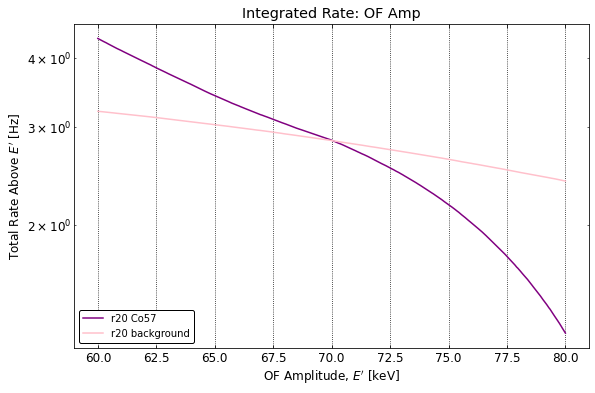

In [683]:
fig, ax = plt.subplots(figsize=(5 + 5/8) * np.array([1.5, 1]))

energies_plot = np.linspace(60, 80, num=1000)

ax.plot(
    energies_plot,
    rate_func_r20Co(energies_plot),
    color='purple',
    label='r20 Co57',
)
ax.plot(
    energies_plot,
    rate_func_r20nos(energies_plot),
    color='pink',
    label='r20 background',
)

ax.set_yscale('log')
#ax.set_ylim(3, 10)
#ax.set_xlim(0.1, 1)
ax.set_ylabel(r"Total Rate Above $E'$ [Hz]")
ax.set_xlabel(r"OF Amplitude, $E'$ [keV]")
ax.set_title('Integrated Rate: OF Amp')
ax.legend(loc="lower left", framealpha=1, edgecolor='k')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k')
fig.tight_layout()

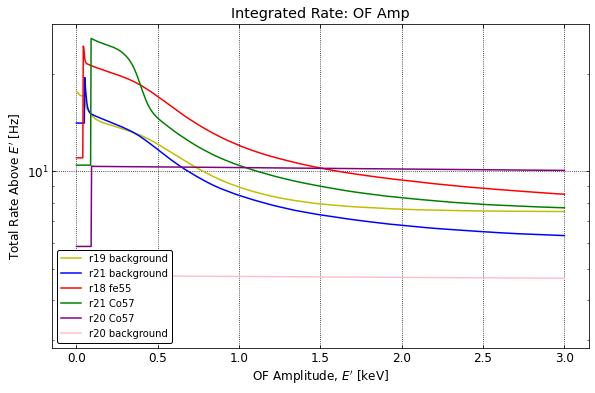

In [684]:
fig, ax = plt.subplots(figsize=(5 + 5/8) * np.array([1.5, 1]))

energies_plot = np.linspace(0, 3, num=1000)
ax.plot(
    energies_plot,
    rate_func_r19nos(energies_plot),
    color='y',
    label='r19 background',
)
ax.plot(
    energies_plot,
    rate_func_r21nos(energies_plot),
    color='b',
    label='r21 background',
)
ax.plot(
    energies_plot,
    rate_func_r18bgaas(energies_plot),
    color='r',
    label='r18 fe55',
)
ax.plot(
    energies_plot,
    rate_func_r21Co(energies_plot),
    color='g',
    label='r21 Co57',
)

ax.plot(
    energies_plot,
    rate_func_r20Co(energies_plot),
    color='purple',
    label='r20 Co57',
)
ax.plot(
    energies_plot,
    rate_func_r20nos(energies_plot),
    color='pink',
    label='r20 background',
)

ax.set_yscale('log')
#ax.set_ylim(3, 10)
#ax.set_xlim(0.1, 1)
ax.set_ylabel(r"Total Rate Above $E'$ [Hz]")
ax.set_xlabel(r"OF Amplitude, $E'$ [keV]")
ax.set_title('Integrated Rate: OF Amp')
ax.legend(loc="lower left", framealpha=1, edgecolor='k')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.grid(b=True, linestyle='dotted', color='k')
fig.tight_layout()



# Re calibrating 

## run21

slope = [1.07379609e-07]


Text(0, 0.5, 'Uncalibrated OF Amp con')

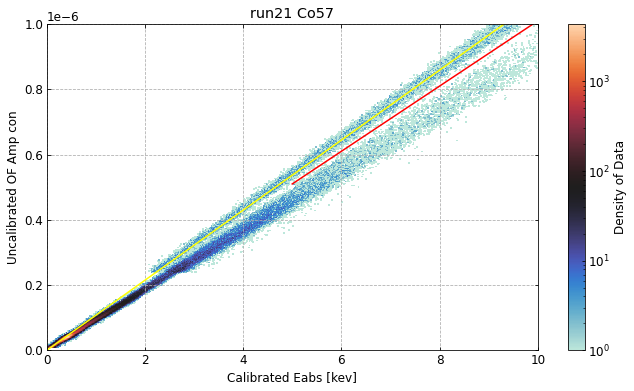

In [309]:
fig, ax = dp.densityplot(
    calibratedenergy,
    df.ofamp_constrained_CPDv21Ge,
    cut= c_good_events_r21co,
    xlims=(0,10),
    ylims=(0,1e-6)
   # ylims=(-3.25,-2)
    )

ax.plot(fitpoints,
        (fitslope)*fitpoints,
        color='yellow')

print('slope =',fitslope)
ax.plot(ge_fitpoints, y_gefit, c='r')
ax.set_title('run21 Co57')
ax.set_xlabel('Calibrated Eabs [kev]')
ax.set_ylabel('Uncalibrated OF Amp con')

In [35]:
mgefit = 1e-7
bge_fit = 0.51e-6

In [36]:
# We want to avoid high density points in this calibration fitting since it can skew the linearity of the fit
# We also want to avoid the high density population of gaas events, since this will skew our fit as well. 
ctemp_calibr = dp.inrange(calibratedenergy, 5, 10)
ge_fitpoints = np.arange(5,10, 0.1)
y_gefit = (ge_fitpoints-5)*mgefit + bge_fit

In [45]:
#finding slope from scipy.optimize.curve_fit (forcing intercept through 0)
linfit_func = lambda x, a: a*x
templinfit_func = lambda x, a, b: (x-5)*a + b
fitpoints = np.arange(80)
ctemp_r21co_ge = (df.ofamp_constrained_CPDv21Ge>templinfit_func(calibratedenergy, mgefit, bge_fit))&dp.inrange(calibratedenergy, 5, 10)
params = optimize.curve_fit(linfit_func,calibratedenergy[c_good_events_r21co&ctemp_calibr&ctemp_r21co_ge],
                            df.ofamp_constrained_CPDv21Ge[c_good_events_r21co&ctemp_calibr&ctemp_r21co_ge])
fitslope = params[0]

Text(0, 0.5, 'Calibrated OF Amp con')

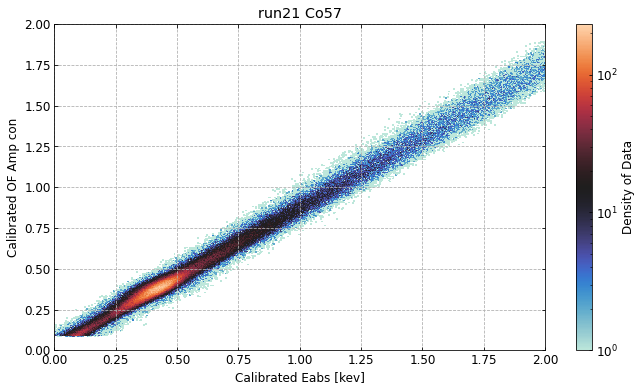

In [346]:
fig, ax = dp.densityplot(
    calibratedenergy,
    df.ofamp_constrained_CPDv21Ge/fitslope,
    cut= c_good_events_r21co,
    xlims=(0,2),
    ylims=(0,2)
   # ylims=(-3.25,-2)
    )
ax.set_title('run21 Co57')
ax.set_xlabel('Calibrated Eabs [kev]')
ax.set_ylabel('Calibrated OF Amp con')

Text(0, 0.5, 'Uncalibrated OF Amp con')

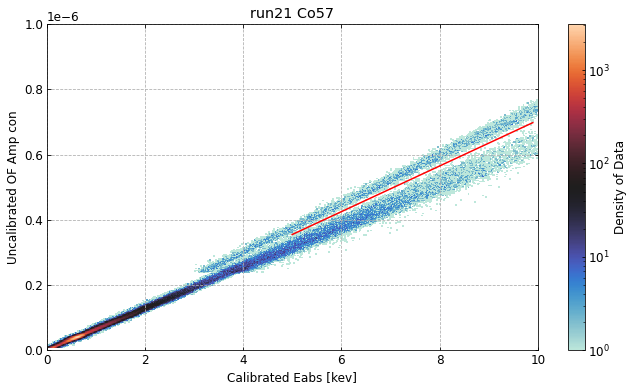

In [849]:
fig, ax = dp.densityplot(
    calibratedenergyv1,
    df.ofamp_constrained_CPDv21Ge,
    cut= c_good_events_r21co,
    xlims=(0,10),
    ylims=(0,1e-6)
   # ylims=(-3.25,-2)
    )
'''
ax.plot(fitpoints,
        (fitslope)*fitpoints,
        color='yellow')

print('slope =',fitslope)
''';
ax.plot(ge_fitpoints, y_gefit, c='r')
ax.set_title('run21 Co57')
ax.set_xlabel('Calibrated Eabs [kev]')
ax.set_ylabel('Uncalibrated OF Amp con')

In [847]:
mgefit = .7e-7
bge_fit = 0.355e-6

In [848]:
# We want to avoid high density points in this calibration fitting since it can skew the linearity of the fit
# We also want to avoid the high density population of gaas events, since this will skew our fit as well. 
ctemp_calibr = dp.inrange(calibratedenergy, 5, 10)
ge_fitpoints = np.arange(5,10, 0.1)
y_gefit = (ge_fitpoints-5)*mgefit + bge_fit

ctemp_r21co_ge1 = (df.ofamp_constrained_CPDv21Ge>templinfit_func(calibratedenergyv1, mgefit, bge_fit))&dp.inrange(calibratedenergyv1, 5, 10)

In [850]:
#finding slope from scipy.optimize.curve_fit (forcing intercept through 0)
linfit_func = lambda x, a: a*x
templinfit_func = lambda x, a, b: (x-5)*a + b
fitpoints = np.arange(80)
params = optimize.curve_fit(linfit_func,calibratedenergyv1[c_good_events_r21co&ctemp_calibr&ctemp_r21co_ge1],
                            df.ofamp_constrained_CPDv21Ge[c_good_events_r21co&ctemp_calibr&ctemp_r21co_ge1])
fitslope2 = params[0]

Text(0, 0.5, 'Calibrated OF Amp con')

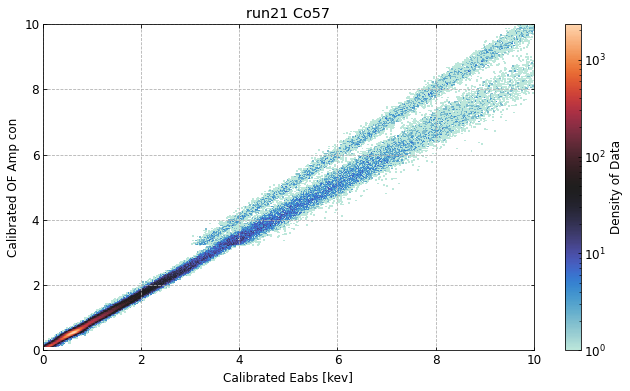

In [851]:
fig, ax = dp.densityplot(
    calibratedenergyv1,
    df.ofamp_constrained_CPDv21Ge/fitslope2,
    cut= c_good_events_r21co,
    xlims=(0,10),
    ylims=(0,10)
   # ylims=(-3.25,-2)
    )
ax.set_title('run21 Co57')
ax.set_xlabel('Calibrated Eabs [kev]')
ax.set_ylabel('Calibrated OF Amp con')

# Cut eff

In [105]:
def cutefficiencies(cut_array,cut_index, suffix, trigsuffix, randsuffix, energy_cut_array=None,columns=None,basecut=None,energy_ranges=None):
    calibratedofamp = suffix
    ctrigger = trigsuffix
    crandoms = randsuffix
    if basecut == None:
        basecut=dp.inrange(calibratedofamp,-np.inf,np.inf)
    
    if columns == None:
        columns=['Randoms - Differential Efficiency','Randoms - Total Efficiency']
        if energy_cut_array == None:
            columns.append('Trigger - Differential Efficiency')
            columns.append('Trigger - Total Efficiency')
        else:
            if energy_ranges == None:
                for count, energycut in enumerate(energy_cut_array):
                    columns.append(f'Trigger - Differential Efficiency - range {count+1}')
                    columns.append(f'Trigger - Total Efficiency - range {count+1}')
            else: 
                if len(energy_cut_array) != len(energy_ranges):
                    return "Error - energy_range and energy_cut_array length do not match"
                else:
                    for count, e_range in enumerate(energy_ranges):
                        columns.append(f'Trigger ({e_range})- Differential Efficiency')
                        columns.append(f'Trigger ({e_range})- Total Efficiency')
    
    eff_array=[]
    
    for count, cut in enumerate(cut_array):
        cut_random_diff=sum(cut&basecut&crandoms)/sum(crandoms&basecut)
        cut_random_tot=sum(cut&basecut&crandoms)/sum(crandoms)
        cut_ind=[cut_random_diff,cut_random_tot]
        if energy_cut_array == None:
            cut_trigger_diff=sum(cut&basecut&ctrigger)/sum(ctrigger&basecut)
            cut_trigger_tot=sum(cut&basecut&ctrigger)/sum(ctrigger)
            cut_ind.append(cut_trigger_diff)
            cut_ind.append(cut_trigger_tot)
        else:
            for n, energycut in enumerate(energy_cut_array):
                cut_trigger_diff=sum(cut&basecut&ctrigger&energycut)/sum(ctrigger&basecut&energycut)
                cut_trigger_tot=sum(cut&basecut&ctrigger&energycut)/sum(ctrigger&energycut)
                cut_ind.append(cut_trigger_diff)
                cut_ind.append(cut_trigger_tot)
        eff_array.append(cut_ind)
        basecut=basecut&cut
    cut_table=pd.DataFrame(eff_array,
                           columns=columns,
                           index=cut_index)
    return cut_table.head()

# Delta chi2: r21 nos

In [802]:
c_good_events_nosbge = ctrigger_both_nos&cbaseline_nosbge&cchi2_temp_r21nosbge
c_good_events_nosbgaas = ctrigger_both_nos&cbaseline_nosbgaas&cchi2_temp_r21nosbgaas

In [803]:
delta_chi2_nodelay_r21nos = (df_both_nos.ofchi2_nodelay_CPDv21Ge_ge - df_both_nos.ofchi2_nodelay_CPDv21Ge_gaas)
delta_chi2_con_r21nos = (df_both_nos.ofchi2_constrained_CPDv21Ge_ge - df_both_nos.ofchi2_constrained_CPDv21Ge_gaas)

In [ ]:
fix, ax = dp.densityplot(
    df_both_nos.ofamp_constrained_CPDv21Ge_gaas/fitslope,
    delta_chi2_con_r21nos,
    cut=c_good_events_nosbgaas,
    ylims=(-300,300),
    xlims = (0, 3),
    #cmap='turbo',
    #plot_cut_data=True,
    #basecut = ctrigger_both&cgoodtime_both
    )
#ax.plot(x_fittingcalib_presat,y_parabcalib_presat)
ax.set_xlabel(r'Calib OfAmp (con): GaAs Temp [keV]')
ax.set_ylabel('Delta chi2 (con)')
ax.set_title('delta chi2: r21 background Ge - GaAs')
#ax.axvline(30, color='red')
#ax.axhline(0, color='red')
'''
fix.savefig(
    '/data/users/da_real_maggie_reed/analysis/run_18/figs/deltachi2f_basec_eabs800_zoom1.png',
    dpi=500,
    facecolor='none',
)
#''';

# Rates

## r20 nos

In [895]:
callev = dp.inrange(calibratedofamp_nos_constrained, 0,np.inf)

czerosevenkev = dp.inrange(calibratedofamp_nos_constrained,0.05,0.2)
czerosevenkev2 = dp.inrange(calibratedofamp_nos_constrained,0.2,7)

csevensixtykev=dp.inrange(calibratedofamp_nos_constrained,7,60)
csixtyonetwntykev=dp.inrange(calibratedofamp_nos_constrained,60,90)
conetwntyupkev=dp.inrange(calibratedofamp_nos_constrained,90,np.inf)

In [696]:
cut_list = [cbaseline_nos, cchi2_temp_nos]
index_list = ['baseline','chi2']
energy_list = [czerosevenkev, csevensixtykev, csixtyonetwntykev, conetwntyupkev, callev]
cols_list = ['Randoms - Differential Efficiency','Randoms - Total Efficiency','Trigger (0-7keV) - Differential Efficiency','Trigger (0-7keV) - Total Efficiency','Trigger (7-60) - Differential Efficiency','Trigger (7-60) - Total Efficiency','Trigger (60-120) - Differential Efficiency','Trigger (60-120) - Total Efficiency','Trigger (120+) - Differential Efficiency','Trigger (120+) - Total Efficiency','Trigger (0-inf) - Differential Efficiency','Trigger (0-inf) - Total Efficiency']
energy_range_list = ["0-7 keV","7-60 keV",'60-100 keV','100+ kev','0-inf keV']

cutefficiencies(cut_list,index_list,suffix=calibratedofamp_nos_constrained,
                trigsuffix=ctrigger_nos, randsuffix=crandoms_nos,
                energy_cut_array=energy_list,energy_ranges=energy_range_list)

Randoms - Differential Efficiency  Randoms - Total Efficiency  \
baseline                           0.929700                      0.9297   
chi2                               0.918576                      0.8540   

          Trigger (0-7 keV)- Differential Efficiency  \
baseline                                    0.579871   
chi2                                        0.133112   

          Trigger (0-7 keV)- Total Efficiency  \
baseline                             0.579871   
chi2                                 0.077188   

          Trigger (7-60 keV)- Differential Efficiency  \
baseline                                     0.949413   
chi2                                         0.969423   

          Trigger (7-60 keV)- Total Efficiency  \
baseline                              0.949413   
chi2                                  0.920383   

          Trigger (60-100 keV)- Differential Efficiency  \
baseline                                       0.943536   
chi2                                           0.973227   

          Trigger (60-100 keV)- Total Efficiency  \
baseline                                0.943536   
chi2                                    0.918275   

          Trigger (100+ kev)- Differential Efficiency  \
baseline                                     0.939557   
chi2                                         1.000000   

          Trigger (100+ kev)- Total Efficiency  \
baseline                              0.939557   
chi2                                  0.939557   

          Trigger (0-inf keV)- Differential Efficiency  \
baseline                                      0.695831   
chi2                                          0.500736   

          Trigger (0-inf keV)- Total Efficiency  
baseline                               0.695831  
chi2                                   0.348428

In [697]:
randeff_r20nos = 0.6587
randeff_r20nos2 = 0.8540
c_good_events_r20nos = ctrigger_nos&cgoodtime_nos&cbaseline_nos&cchi2_temp_nos

In [896]:
randoms_total_eff = 0.8540
calc_rate_all = sum(c_good_events_r20nos)/realtime_r20nos
true_rate_all = calc_rate_all/randoms_total_eff

calc_rate_zeroseven = sum(c_good_events_r20nos&czerosevenkev)/realtime_r20nos
true_rate_zeroseven = calc_rate_zeroseven/randoms_total_eff

calc_rate_zeroseven2 = sum(c_good_events_r20nos&czerosevenkev2)/realtime_r20nos
true_rate_zeroseven2 = calc_rate_zeroseven2/randoms_total_eff

calc_rate_sevensixty = sum(c_good_events_r20nos&csevensixtykev)/realtime_r20nos
true_rate_sevensixty = calc_rate_sevensixty/randoms_total_eff

calc_rate_sixtyonetwnty = sum(c_good_events_r20nos&csixtyonetwntykev)/realtime_r20nos
true_rate_sixtyonetwnty = calc_rate_sixtyonetwnty/randoms_total_eff

calc_rate_onetwntyup = sum(c_good_events_r20nos&conetwntyupkev)/realtime_r20nos
true_rate_onetwntyup = calc_rate_onetwntyup/randoms_total_eff

In [897]:
print(f'The calculated rate from 0-7 keV is {calc_rate_zeroseven}, the true rate is {true_rate_zeroseven}\n')
print(f'The calculated rate from 0-7 keV is {calc_rate_zeroseven2}, the true rate is {true_rate_zeroseven2}\n')

print(f'The calculated rate from 7-60 keV is {calc_rate_sevensixty}, the true rate is {true_rate_sevensixty}\n')
print(f'The calculated rate from 60-90 keV is {calc_rate_sixtyonetwnty}, the true rate is {true_rate_sixtyonetwnty}\n')
print(f'The calculated rate from 90-inf keV is {calc_rate_onetwntyup}, the true rate is {true_rate_onetwntyup}\n')
print(f'The calculated rate from 0-inf keV is {calc_rate_all}, the true rate is {true_rate_all}\n')

The calculated rate from 0-7 keV is 0.0199716195124893, the true rate is 0.023385971326099885

The calculated rate from 0-7 keV is 0.14445447054535224, the true rate is 0.1691504338938551

The calculated rate from 7-60 keV is 0.8839802754230414, the true rate is 1.035105708926278

The calculated rate from 60-90 keV is 0.8191358591281654, the true rate is 0.9591754790727933

The calculated rate from 90-inf keV is 1.290853072942186, the true rate is 1.5115375561383912

The calculated rate from 0-inf keV is 3.1583952975512344, the true rate is 3.6983551493574174



## r19nos

In [822]:
#ctrigger&cgoodtime,cbaseline,ctemp_loose, cplitpop
cfoursevenkev=dp.inrange(calibratedofamp_r19nos_constrained,4,7)
cseventenkev=dp.inrange(calibratedofamp_r19nos_constrained,7,10)
ctentwentykev = dp.inrange(calibratedofamp_r19nos_constrained,10,20)
callev = dp.inrange(calibratedofamp_r19nos_constrained, 0,np.inf)

czerosevenkev = dp.inrange(calibratedofamp_r19nos_constrained,0,7)
csevensixtykev=dp.inrange(calibratedofamp_r19nos_constrained,7,60)
csixtyonetwntykev=dp.inrange(calibratedofamp_r19nos_constrained,60,90)
conetwntyupkev=dp.inrange(calibratedofamp_r19nos_constrained,90,np.inf)
cfourtwentykev = dp.inrange(calibratedofamp_r19nos_constrained, 4, 20)

In [ ]:
#ctrigger_r19nos&cbaseline_r19nos&cchi2_temp_r19nos&np.invert(c_temp_r19noslowpop)

In [835]:
cut_list = [cbaseline_r19nos,np.invert(c_temp_r19noslowpop),cchi2_temp_r19nos]
index_list = ['baseline', 'glitch','chi2']
energy_list = [czerosevenkev, csevensixtykev, csixtyonetwntykev, conetwntyupkev, callev]
cols_list = ['Randoms - Differential Efficiency','Randoms - Total Efficiency','Trigger (0-7keV) - Differential Efficiency','Trigger (0-7keV) - Total Efficiency','Trigger (7-60) - Differential Efficiency','Trigger (7-60) - Total Efficiency','Trigger (60-120) - Differential Efficiency','Trigger (60-120) - Total Efficiency','Trigger (120+) - Differential Efficiency','Trigger (120+) - Total Efficiency','Trigger (0-inf) - Differential Efficiency','Trigger (0-inf) - Total Efficiency']
energy_range_list = ["0-7 keV","7-60 keV",'60-100 keV','100+ kev','0-inf keV']

cutefficiencies(cut_list,index_list,suffix=calibratedofamp_r19nos_constrained,
                trigsuffix=ctrigger_r19nos, randsuffix=crandoms_r19nos,
                energy_cut_array=energy_list,energy_ranges=energy_range_list)

Randoms - Differential Efficiency  Randoms - Total Efficiency  \
baseline                           0.820083                    0.820083   
glitch                             0.933137                    0.765250   
chi2                               0.719133                    0.550317   

          Trigger (0-7 keV)- Differential Efficiency  \
baseline                                    0.860870   
glitch                                      0.898039   
chi2                                        0.559251   

          Trigger (0-7 keV)- Total Efficiency  \
baseline                             0.860870   
glitch                               0.773095   
chi2                                 0.432354   

          Trigger (7-60 keV)- Differential Efficiency  \
baseline                                     0.838666   
glitch                                       1.000000   
chi2                                         0.972970   

          Trigger (7-60 keV)- Total Efficiency  \
baseline                              0.838666   
glitch                                0.838666   
chi2                                  0.815997   

          Trigger (60-100 keV)- Differential Efficiency  \
baseline                                       0.824917   
glitch                                         1.000000   
chi2                                           0.983388   

          Trigger (60-100 keV)- Total Efficiency  \
baseline                                0.824917   
glitch                                  0.824917   
chi2                                    0.811214   

          Trigger (100+ kev)- Differential Efficiency  \
baseline                                     0.786153   
glitch                                       1.000000   
chi2                                         1.000000   

          Trigger (100+ kev)- Total Efficiency  \
baseline                              0.786153   
glitch                                0.786153   
chi2                                  0.786153   

          Trigger (0-inf keV)- Differential Efficiency  \
baseline                                      0.851946   
glitch                                        0.920695   
chi2                                          0.661370   

          Trigger (0-inf keV)- Total Efficiency  
baseline                               0.851946  
glitch                                 0.784383  
chi2                                   0.518767

In [836]:
randeff_r19nos = 0.4146
randeff_r19nos2 = 0.550317

In [651]:
randoms_total_eff = 0.4146
calc_rate_all = sum(c_good_events_r19nos)/realtime_r19nos
true_rate_all = calc_rate_all/randoms_total_eff

calc_rate_zeroseven = sum(c_good_events_r19nos&czerosevenkev)/realtime_r19nos
true_rate_zeroseven = calc_rate_zeroseven/randoms_total_eff

calc_rate_sevensixty = sum(c_good_events_r19nos&csevensixtykev)/realtime_r19nos
true_rate_sevensixty = calc_rate_sevensixty/randoms_total_eff

calc_rate_sixtyonetwnty = sum(c_good_events_r19nos&csixtyonetwntykev)/realtime_r19nos
true_rate_sixtyonetwnty = calc_rate_sixtyonetwnty/randoms_total_eff

calc_rate_onetwntyup = sum(c_good_events_r19nos&conetwntyupkev)/realtime_r19nos
true_rate_onetwntyup = calc_rate_onetwntyup/randoms_total_eff

In [652]:
print(f'The calculated rate from 0-7 keV is {calc_rate_zeroseven}, the true rate is {true_rate_zeroseven}\n')
print(f'The calculated rate from 7-60 keV is {calc_rate_sevensixty}, the true rate is {true_rate_sevensixty}\n')
print(f'The calculated rate from 60-90 keV is {calc_rate_sixtyonetwnty}, the true rate is {true_rate_sixtyonetwnty}\n')
print(f'The calculated rate from 90-inf keV is {calc_rate_onetwntyup}, the true rate is {true_rate_onetwntyup}\n')
print(f'The calculated rate from 0-inf keV is {calc_rate_all}, the true rate is {true_rate_all}\n')

The calculated rate from 0-7 keV is 4.794289015397135, the true rate is 11.563649337667957

The calculated rate from 7-60 keV is 1.108370302292667, the true rate is 2.673348534232192

The calculated rate from 60-90 keV is 0.8719258697316052, the true rate is 2.1030532313835146

The calculated rate from 90-inf keV is 0.5556463911671718, the true rate is 1.3401987244746063

The calculated rate from 0-inf keV is 7.5786423821311, the true rate is 18.279407578705015



## run 21 Co

In [784]:
#ctrigger&cgoodtime,cbaseline,cchi2_temp
czerosevenkev_r21Co=dp.inrange(calibratedofamp_constrained,0,7)
cseven60kev_r21Co=dp.inrange(calibratedofamp_constrained,7,60)
csixtyonetwntykev_r21Co = dp.inrange(calibratedofamp_constrained,60,90)
conetwntyupkev_r21Co = dp.inrange(calibratedofamp_constrained,90,np.inf)
callev_r21Co = dp.inrange(calibratedofamp_constrained, 0,np.inf)

In [785]:
#cutting efficiency tables calibrated ofamp
cut_list = [cbaseline,cchi2_temp]
index_list = ['baseline','chi2']
energy_list = [czerosevenkev_r21Co,cseven60kev_r21Co,csixtyonetwntykev_r21Co,conetwntyupkev_r21Co,callev_r21Co]
cols_list = ['Randoms - Differential Efficiency','Randoms - Total Efficiency','Trigger (0-7keV) - Differential Efficiency','Trigger (0-7keV) - Total Efficiency','Trigger (7keV+) - Differential Efficiency','Trigger (7keV+) - Total Efficiency']
energy_range_list = ["0-7 keV","7-60 keV",'60-90 keV','90-inf kev','0-inf kev']

cutefficiencies(cut_list,index_list,suffix=calibratedofamp_constrained,
                trigsuffix=ctrigger, randsuffix=crandoms,
                energy_cut_array=energy_list,energy_ranges=energy_range_list)

Randoms - Differential Efficiency  Randoms - Total Efficiency  \
baseline                           0.814100                    0.814100   
chi2                               0.632938                    0.515275   

          Trigger (0-7 keV)- Differential Efficiency  \
baseline                                    0.853660   
chi2                                        0.530972   

          Trigger (0-7 keV)- Total Efficiency  \
baseline                              0.85366   
chi2                                  0.45327   

          Trigger (7-60 keV)- Differential Efficiency  \
baseline                                     0.852796   
chi2                                         0.935034   

          Trigger (7-60 keV)- Total Efficiency  \
baseline                              0.852796   
chi2                                  0.797393   

          Trigger (60-90 keV)- Differential Efficiency  \
baseline                                      0.819647   
chi2                                          0.951685   

          Trigger (60-90 keV)- Total Efficiency  \
baseline                               0.819647   
chi2                                   0.780045   

          Trigger (90-inf kev)- Differential Efficiency  \
baseline                                       0.884518   
chi2                                           1.000000   

          Trigger (90-inf kev)- Total Efficiency  \
baseline                                0.884518   
chi2                                    0.884518   

          Trigger (0-inf kev)- Differential Efficiency  \
baseline                                      0.851128   
chi2                                          0.635412   

          Trigger (0-inf kev)- Total Efficiency  
baseline                               0.851128  
chi2                                   0.540817

In [786]:
rand_eff_r21Co = 0.404875
rand_eff_r21Co2 = 0.515275
c_good_events_r21co = ctrigger&ctime&cbaseline&cchi2_temp

In [610]:
randoms_total_eff = 0.404875
calc_rate_all = sum(c_good_events_r21co)/tot_runtime
true_rate_all = calc_rate_all/randoms_total_eff

calc_rate_zeroseven = sum(c_good_events_r21co&czerosevenkev_r21Co)/tot_runtime
true_rate_zeroseven = calc_rate_zeroseven/randoms_total_eff

calc_rate_sevensixty = sum(c_good_events_r21co&cseven60kev_r21Co)/tot_runtime
true_rate_sevensixty = calc_rate_sevensixty/randoms_total_eff

calc_rate_sixtyonetwnty = sum(c_good_events_r21co&csixtyonetwntykev_r21Co)/tot_runtime
true_rate_sixtyonetwnty = calc_rate_sixtyonetwnty/randoms_total_eff

calc_rate_onetwntyup = sum(c_good_events_r21co&conetwntyupkev_r21Co)/tot_runtime
true_rate_onetwntyup = calc_rate_onetwntyup/randoms_total_eff

In [611]:
print(f'The calculated rate from 0-7 keV is {calc_rate_zeroseven}, the true rate is {true_rate_zeroseven}\n')
print(f'The calculated rate from 7-60 keV is {calc_rate_sevensixty}, the true rate is {true_rate_sevensixty}\n')
print(f'The calculated rate from 60-90 keV is {calc_rate_sixtyonetwnty}, the true rate is {true_rate_sixtyonetwnty}\n')
print(f'The calculated rate from 90-inf keV is {calc_rate_onetwntyup}, the true rate is {true_rate_onetwntyup}\n')
print(f'The calculated rate from 0-inf keV is {calc_rate_all}, the true rate is {true_rate_all}\n')

The calculated rate from 0-7 keV is 7.690692919254749, the true rate is 18.995227957405987

The calculated rate from 7-60 keV is 2.9483928465940594, the true rate is 7.282229939102339

The calculated rate from 60-90 keV is 1.5634941630179693, the true rate is 3.861671288713725

The calculated rate from 90-inf keV is 0.3030222215723986, the true rate is 0.7484340143807314

The calculated rate from 0-inf keV is 12.505602150439177, the true rate is 30.887563199602784



## run 21 background

In [906]:
def get_rates(suffix, outsuffix, trigsuffix, randsuffix, energies, cut_list, 
              index_list, energy_range_list, timesuffix, cmask):
    energy_list = []
    rate_list = []
    temp_callev = dp.inrange(suffix, 0, np.inf)
    callev = temp_callev+outsuffix
    for i in energies[:-1]:
        ctemp = dp.inrange(suffix, energies[i], energies[i+1])
        energy_list.append(ctemp)
    energy_list.append(callev)
    energy_list.append(dp.inrange(suffix, energies[-1], np.inf))
    
    cut_table = cutefficiencies(cut_list, index_list, suffix, trigsuffix, randsuffix, 
                    energy_cut_array=energy_list, energy_ranges=energy_range_list)
    rand_eff = cut_table.iloc[-1][1]
    for i in energies[:-1]:
        temp_rate = sum(cmask & energy_list[i])/timesuffix
        rate_list.append(temp_rate/rand_eff)
    rate_list.append((sum(cmask&energy_list[-1])/timesuffix)/rand_eff)
    rate_list.append((sum(cmask&callev)/timesuffix)/rand_eff)
    for i in rate_list:
        
    

In [566]:
calibratedofamp_nosr21_constrainedv1 = df_nosr21.ofamp_constrained_CPDv21Ge/fitslope
cchi2_nosr21 = cchi2_temp_r21nos

In [878]:
#ctrigger&cgoodtime,cbaseline,cchi2_temp
czerosevenkev_r21nos=dp.inrange(calibratedofamp_nosr21_constrainedv1,0.05,0.2)
czerosevenkev_r21nos2=dp.inrange(calibratedofamp_nosr21_constrainedv1,0.2,7)

cseven60kev_r21nos=dp.inrange(calibratedofamp_nosr21_constrainedv1,7,60)
csixtyonetwntykev_r21nos = dp.inrange(calibratedofamp_nosr21_constrainedv1,60,90)
conetwntyupkev_r21nos = dp.inrange(calibratedofamp_nosr21_constrainedv1,90,np.inf)
callev_r21nos = dp.inrange(calibratedofamp_nosr21_constrainedv1, 0,np.inf)

In [879]:
#cutting efficiency tables calibrated ofamp
cut_list = [cbaseline_nosr21,cchi2_nosr21]
index_list = ['baseline','chi2']
energy_list = [czerosevenkev_r21nos,czerosevenkev_r21nos2,cseven60kev_r21nos,csixtyonetwntykev_r21nos,conetwntyupkev_r21nos,callev_r21nos]
cols_list = ['Randoms - Differential Efficiency','Randoms - Total Efficiency','Trigger (thresh-200eV) - Differential Efficiency','Trigger (thresh-200eV) - Total Efficiency','Trigger (7keV+) - Differential Efficiency','Trigger (7keV+) - Total Efficiency']
energy_range_list = ["thresh-200eV","200ev-7 keV",'7-60 keV','60-90 keV','90-inf kev','0-inf kev']

cutefficiencies(cut_list,index_list,suffix=calibratedofamp_nosr21_constrainedv1,
                trigsuffix=ctrigger_nosr21, randsuffix=crandoms_nosr21,
                energy_cut_array=energy_list,energy_ranges=energy_range_list)

Randoms - Differential Efficiency  Randoms - Total Efficiency  \
baseline                           0.870600                      0.8706   
chi2                               0.791293                      0.6889   

          Trigger (thresh-200eV)- Differential Efficiency  \
baseline                                         0.841743   
chi2                                             0.770513   

          Trigger (thresh-200eV)- Total Efficiency  \
baseline                                  0.841743   
chi2                                      0.648574   

          Trigger (200ev-7 keV)- Differential Efficiency  \
baseline                                        0.839248   
chi2                                            0.612062   

          Trigger (200ev-7 keV)- Total Efficiency  \
baseline                                 0.839248   
chi2                                     0.513672   

          Trigger (7-60 keV)- Differential Efficiency  \
baseline                                     0.890488   
chi2                                         0.970918   

          Trigger (7-60 keV)- Total Efficiency  \
baseline                              0.890488   
chi2                                  0.864591   

          Trigger (60-90 keV)- Differential Efficiency  \
baseline                                      0.864342   
chi2                                          0.959809   

          Trigger (60-90 keV)- Total Efficiency  \
baseline                               0.864342   
chi2                                   0.829603   

          Trigger (90-inf kev)- Differential Efficiency  \
baseline                                       0.876997   
chi2                                           1.000000   

          Trigger (90-inf kev)- Total Efficiency  \
baseline                                0.876997   
chi2                                    0.876997   

          Trigger (0-inf kev)- Differential Efficiency  \
baseline                                      0.849124   
chi2                                          0.730039   

          Trigger (0-inf kev)- Total Efficiency  
baseline                               0.849124  
chi2                                   0.619894

In [575]:
rand_eff_r21nos = 0.6889
c_good_events_r21nos = ctrigger_nosr21&cbaseline_nosr21&cchi2_nosr21

In [880]:
randoms_total_eff = 0.6889
calc_rate_all = sum(c_good_events_r21nos)/tot_runtime_nosr21
true_rate_all = calc_rate_all/randoms_total_eff

calc_rate_zeroseven = sum(c_good_events_r21nos&czerosevenkev_r21nos)/tot_runtime_nosr21
true_rate_zeroseven = calc_rate_zeroseven/randoms_total_eff

calc_rate_zeroseven2 = sum(c_good_events_r21nos&czerosevenkev_r21nos2)/tot_runtime_nosr21
true_rate_zeroseven2 = calc_rate_zeroseven2/randoms_total_eff

calc_rate_sevensixty = sum(c_good_events_r21nos&cseven60kev_r21nos)/tot_runtime_nosr21
true_rate_sevensixty = calc_rate_sevensixty/randoms_total_eff

calc_rate_sixtyonetwnty = sum(c_good_events_r21nos&csixtyonetwntykev_r21nos)/tot_runtime_nosr21
true_rate_sixtyonetwnty = calc_rate_sixtyonetwnty/randoms_total_eff

calc_rate_onetwntyup = sum(c_good_events_r21nos&conetwntyupkev_r21nos)/tot_runtime_nosr21
true_rate_onetwntyup = calc_rate_onetwntyup/randoms_total_eff

In [881]:
print(f'The calculated rate from thresh-200eV is {calc_rate_zeroseven}, the true rate is {true_rate_zeroseven}\n')
print(f'The calculated rate from 200ev-7keV is {calc_rate_zeroseven2}, the true rate is {true_rate_zeroseven2}\n')

print(f'The calculated rate from 7-60 keV is {calc_rate_sevensixty}, the true rate is {true_rate_sevensixty}\n')
print(f'The calculated rate from 60-90 keV is {calc_rate_sixtyonetwnty}, the true rate is {true_rate_sixtyonetwnty}\n')
print(f'The calculated rate from 90-inf keV is {calc_rate_onetwntyup}, the true rate is {true_rate_onetwntyup}\n')
print(f'The calculated rate from 0-inf keV is {calc_rate_all}, the true rate is {true_rate_all}\n')

The calculated rate from thresh-200eV is 3.9481749414767218, the true rate is 5.7311292516718275

The calculated rate from 200ev-7keV is 6.13266816525252, the true rate is 8.90211665735596

The calculated rate from 7-60 keV is 1.6290995196817994, the true rate is 2.36478374173581

The calculated rate from 60-90 keV is 1.1146616044298094, the true rate is 1.6180310704453615

The calculated rate from 90-inf keV is 0.9365408200741356, the true rate is 1.3594728118364576

The calculated rate from 0-inf keV is 14.104195903850641, the true rate is 20.47350254587116



## r20 Co

In [701]:
calibratedofamp_r20co_constrainedv1 = df_Co.ofamp_constrained_CPDv21Ge/fitslope
cchi2_r20co = cchi2_temp_Co&np.invert(ctemp_r20_lowpop)

In [892]:
#ctrigger&cgoodtime,cbaseline,cchi2_temp
czerosevenkev_r20co=dp.inrange(calibratedofamp_r20co_constrainedv1,0.05,0.2)
czerosevenkev_r20co2=dp.inrange(calibratedofamp_r20co_constrainedv1,0.2,7)

cseven60kev_r20co=dp.inrange(calibratedofamp_r20co_constrainedv1,7,60)
csixtyonetwntykev_r20co = dp.inrange(calibratedofamp_r20co_constrainedv1,60,90)
conetwntyupkev_r20co = dp.inrange(calibratedofamp_r20co_constrainedv1,90,np.inf)
callev_r20co = dp.inrange(calibratedofamp_r20co_constrainedv1, 0,np.inf)

In [703]:
#cutting efficiency tables calibrated ofamp
cut_list = [cbaseline_Co,cchi2_r20co]
index_list = ['baseline','chi2']
energy_list = [czerosevenkev_r20co,cseven60kev_r20co,csixtyonetwntykev_r20co,conetwntyupkev_r20co,callev_r20co]
cols_list = ['Randoms - Differential Efficiency','Randoms - Total Efficiency','Trigger (0-7keV) - Differential Efficiency','Trigger (0-7keV) - Total Efficiency','Trigger (7keV+) - Differential Efficiency','Trigger (7keV+) - Total Efficiency']
energy_range_list = ["0-7 keV","7-60 keV",'60-90 keV','90-inf kev','0-inf kev']

cutefficiencies(cut_list,index_list,suffix=calibratedofamp_r20co_constrainedv1,
                trigsuffix=ctrigger_Co, randsuffix=crandoms_Co,
                energy_cut_array=energy_list,energy_ranges=energy_range_list)

Randoms - Differential Efficiency  Randoms - Total Efficiency  \
baseline                           0.850883                    0.850883   
chi2                               0.744089                    0.633133   

          Trigger (0-7 keV)- Differential Efficiency  \
baseline                                    0.888974   
chi2                                        0.500461   

          Trigger (0-7 keV)- Total Efficiency  \
baseline                             0.888974   
chi2                                 0.444897   

          Trigger (7-60 keV)- Differential Efficiency  \
baseline                                     0.931616   
chi2                                         0.957609   

          Trigger (7-60 keV)- Total Efficiency  \
baseline                              0.931616   
chi2                                  0.892124   

          Trigger (60-90 keV)- Differential Efficiency  \
baseline                                      0.888969   
chi2                                          0.961634   

          Trigger (60-90 keV)- Total Efficiency  \
baseline                               0.888969   
chi2                                   0.854863   

          Trigger (90-inf kev)- Differential Efficiency  \
baseline                                            1.0   
chi2                                                1.0   

          Trigger (90-inf kev)- Total Efficiency  \
baseline                                     1.0   
chi2                                         1.0   

          Trigger (0-inf kev)- Differential Efficiency  \
baseline                                      0.907551   
chi2                                          0.869528   

          Trigger (0-inf kev)- Total Efficiency  
baseline                               0.907551  
chi2                                   0.789141

In [704]:
rand_eff_r20co = 0.5643
rand_eff_r20co2 = 0.633133
c_good_events_r20co = ctrigger_Co&cgoodtime_Co&cbaseline_Co&cchi2_r20co

In [893]:
randoms_total_eff = 0.633133
calc_rate_all = sum(c_good_events_r20co)/realtime_r20Co
true_rate_all = calc_rate_all/randoms_total_eff

calc_rate_zeroseven = sum(c_good_events_r20co&czerosevenkev_r20co)/realtime_r20Co
true_rate_zeroseven = calc_rate_zeroseven/randoms_total_eff

calc_rate_zeroseven2 = sum(c_good_events_r20co&czerosevenkev_r20co2)/realtime_r20Co
true_rate_zeroseven2 = calc_rate_zeroseven2/randoms_total_eff

calc_rate_sevensixty = sum(c_good_events_r20co&cseven60kev_r20co)/realtime_r20Co
true_rate_sevensixty = calc_rate_sevensixty/randoms_total_eff

calc_rate_sixtyonetwnty = sum(c_good_events_r20co&csixtyonetwntykev_r20co)/realtime_r20Co
true_rate_sixtyonetwnty = calc_rate_sixtyonetwnty/randoms_total_eff

calc_rate_onetwntyup = sum(c_good_events_r20co&conetwntyupkev_r20co)/realtime_r20Co
true_rate_onetwntyup = calc_rate_onetwntyup/randoms_total_eff

In [894]:
print(f'The calculated rate from 0-7 keV is {calc_rate_zeroseven}, the true rate is {true_rate_zeroseven}\n')
print(f'The calculated rate from 0-7 keV is {calc_rate_zeroseven2}, the true rate is {true_rate_zeroseven2}\n')

print(f'The calculated rate from 7-60 keV is {calc_rate_sevensixty}, the true rate is {true_rate_sevensixty}\n')
print(f'The calculated rate from 60-90 keV is {calc_rate_sixtyonetwnty}, the true rate is {true_rate_sixtyonetwnty}\n')
print(f'The calculated rate from 90-inf keV is {calc_rate_onetwntyup}, the true rate is {true_rate_onetwntyup}\n')
print(f'The calculated rate from 0-inf keV is {calc_rate_all}, the true rate is {true_rate_all}\n')

The calculated rate from 0-7 keV is 0.016169620524466542, the true rate is 0.025539058182825005

The calculated rate from 0-7 keV is 0.34725526926902794, the true rate is 0.548471283709786

The calculated rate from 7-60 keV is 3.0484341418113585, the true rate is 4.814840075957751

The calculated rate from 60-90 keV is 2.443086852632576, the true rate is 3.858726132791335

The calculated rate from 90-inf keV is 6.910094241225018e-05, the true rate is 0.00010914127428557693

The calculated rate from 0-inf keV is 5.855014985179841, the true rate is 9.247685691915983



## r18 both frames

In [885]:
#ctrigger&cgoodtime,cbaseline,cchi2_temp
czerosevenkev_r18bgaas=dp.inrange(calibratedofamp_bgaas_constrained,0.05,0.2)
czerosevenkev_r18bgaas2=dp.inrange(calibratedofamp_bgaas_constrained,0.2,7)

cseven60kev_r18bgaas=dp.inrange(calibratedofamp_bgaas_constrained,7,60)
csixtyonetwntykev_r18bgaas = dp.inrange(calibratedofamp_bgaas_constrained,60,90)
conetwntyupkev_r18bgaas = dp.inrange(calibratedofamp_bgaas_constrained,90,np.inf)
callev_r18bgaas = dp.inrange(calibratedofamp_bgaas_constrained, 0,np.inf)

In [688]:
#cutting efficiency tables calibrated ofamp
cut_list = [cbaseline_bgaas,cchi2_temp_bgaas]
index_list = ['baseline','chi2']
energy_list = [czerosevenkev_r18bgaas,cseven60kev_r18bgaas,csixtyonetwntykev_r18bgaas,conetwntyupkev_r18bgaas,callev_r18bgaas]
cols_list = ['Randoms - Differential Efficiency','Randoms - Total Efficiency','Trigger (0-7keV) - Differential Efficiency','Trigger (0-7keV) - Total Efficiency','Trigger (7keV+) - Differential Efficiency','Trigger (7keV+) - Total Efficiency']
energy_range_list = ["0-7 keV","7-60 keV",'60-90 keV','90-inf kev','0-inf kev']

cutefficiencies(cut_list,index_list,suffix=calibratedofamp_bgaas_constrained,
                trigsuffix=ctrigger_both, randsuffix=crandoms_both,
                energy_cut_array=energy_list,energy_ranges=energy_range_list)

Randoms - Differential Efficiency  Randoms - Total Efficiency  \
baseline                           0.823217                    0.823217   
chi2                               0.785881                    0.646950   

          Trigger (0-7 keV)- Differential Efficiency  \
baseline                                    0.868562   
chi2                                        0.885861   

          Trigger (0-7 keV)- Total Efficiency  \
baseline                             0.868562   
chi2                                 0.769425   

          Trigger (7-60 keV)- Differential Efficiency  \
baseline                                     0.841780   
chi2                                         0.969426   

          Trigger (7-60 keV)- Total Efficiency  \
baseline                              0.841780   
chi2                                  0.816043   

          Trigger (60-90 keV)- Differential Efficiency  \
baseline                                      0.824714   
chi2                                          0.981563   

          Trigger (60-90 keV)- Total Efficiency  \
baseline                               0.824714   
chi2                                   0.809509   

          Trigger (90-inf kev)- Differential Efficiency  \
baseline                                       0.789851   
chi2                                           1.000000   

          Trigger (90-inf kev)- Total Efficiency  \
baseline                                0.789851   
chi2                                    0.789851   

          Trigger (0-inf kev)- Differential Efficiency  \
baseline                                      0.855988   
chi2                                          0.910562   

          Trigger (0-inf kev)- Total Efficiency  
baseline                               0.855988  
chi2                                   0.779430

In [689]:
rand_eff_r18bgaas = 0.451233
rand_eff_r18bgaas2 = 0.646950

In [886]:
randoms_total_eff = 0.646950
calc_rate_all = sum(c_good_events_r18bgaas)/realtime_r18bgaas
true_rate_all = calc_rate_all/randoms_total_eff

calc_rate_zeroseven = sum(c_good_events_r18bgaas&czerosevenkev_r18bgaas)/realtime_r18bgaas
true_rate_zeroseven = calc_rate_zeroseven/randoms_total_eff

calc_rate_zeroseven2 = sum(c_good_events_r18bgaas&czerosevenkev_r18bgaas2)/realtime_r18bgaas
true_rate_zeroseven2 = calc_rate_zeroseven2/randoms_total_eff

calc_rate_sevensixty = sum(c_good_events_r18bgaas&cseven60kev_r18bgaas)/realtime_r18bgaas
true_rate_sevensixty = calc_rate_sevensixty/randoms_total_eff

calc_rate_sixtyonetwnty = sum(c_good_events_r18bgaas&csixtyonetwntykev_r18bgaas)/realtime_r18bgaas
true_rate_sixtyonetwnty = calc_rate_sixtyonetwnty/randoms_total_eff

calc_rate_onetwntyup = sum(c_good_events_r18bgaas&conetwntyupkev_r18bgaas)/realtime_r18bgaas
true_rate_onetwntyup = calc_rate_onetwntyup/randoms_total_eff

In [887]:
print(f'The calculated rate from thresh-200 eV is {calc_rate_zeroseven}, the true rate is {true_rate_zeroseven}\n')
print(f'The calculated rate from 200eV-7keV is {calc_rate_zeroseven2}, the true rate is {true_rate_zeroseven2}\n')
print(f'The calculated rate from 7-60 keV is {calc_rate_sevensixty}, the true rate is {true_rate_sevensixty}\n')
print(f'The calculated rate from 60-90 keV is {calc_rate_sixtyonetwnty}, the true rate is {true_rate_sixtyonetwnty}\n')
print(f'The calculated rate from 90-inf keV is {calc_rate_onetwntyup}, the true rate is {true_rate_onetwntyup}\n')
print(f'The calculated rate from 0-inf keV is {calc_rate_all}, the true rate is {true_rate_all}\n')

The calculated rate from thresh-200 eV is 1.0081414924920442, the true rate is 1.5582989295804068

The calculated rate from 200eV-7keV is 6.0389685096294885, the true rate is 9.334521229816042

The calculated rate from 7-60 keV is 1.296959679920427, the true rate is 2.0047293916383446

The calculated rate from 60-90 keV is 0.9444899161609578, the true rate is 1.459911764681904

The calculated rate from 90-inf keV is 0.8735120232299891, the true rate is 1.350200205935527

The calculated rate from 0-inf keV is 11.011117780054114, the true rate is 17.020044485747142



# Re doing collection eff.

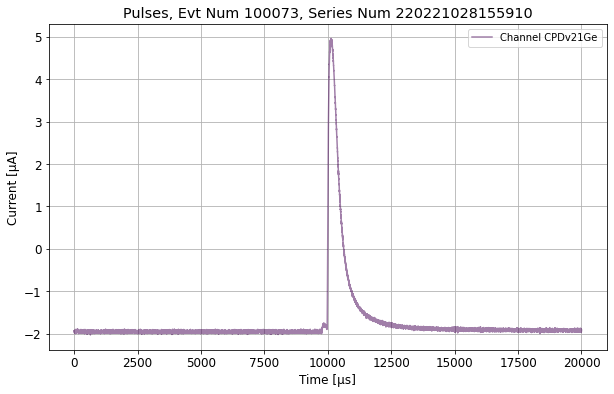

In [628]:
#trigger_path = '/sdata2/runs/run21/processed/Co_6sig_I2_D20221028_T154539' #trigger processed with 6 sigma, GaAs template

basepath = '/sdata2/runs/run21/processed/Co_6sig_I2_D20221028_T154539'

ctemp = dp.inrange(calibratedofamp_constrainedv1, 61, 74)

t_peak, traces_peak, cout = getrandevents(
    basepath,
    df.eventnumber,
    df.seriesnumber,
    channels=['CPDv21Ge'],
    cut=ctrigger & ctemp,
    ntraces=10000,
    lgcplot=True,
    nplot=1,
)

In [584]:
#yaml_path = '/data/users/da_real_maggie_reed/analysis/run_21/data/process_r21_Co_gaas6sig.yaml'
#approx Co57 line in run21: 69.5e3
#usual energy of Co57: 122e3
with open(yaml_path) as f:
    yaml_dict = yaml.safe_load(f)

In [599]:
fs
bin_steps = int(20e-6*fs)
nsteps = 100
step_arr = np.linspace(1, nsteps, num=nsteps, dtype=int) * bin_steps

out_ft = np.zeros((nsteps, len(traces_peak)))
out_int = np.zeros((nsteps, len(traces_peak)))

for ii, n in enumerate(step_arr): #load the eabs indices over the chosen integration length
    temp_dict = yaml_dict['CPDv21Ge']['energyabsorbed']
    temp_dict['end_index'] = temp_dict['start_index'] + n
    for jj, _ in enumerate(traces_peak[:, 0]): #grab the trace values
        out_ft[ii, jj] = dp.process.SingleChannelExtractors.energyabsorbed( #calc e abs for the trace value 
            traces_peak[jj, 0],
            fs=fs,
            **temp_dict, #over the int length -> then go to next trace value and calc it over the int length etc 
        )['energyabsorbed'] / constants.eV / 122e3 #approx energy of the Co57 line

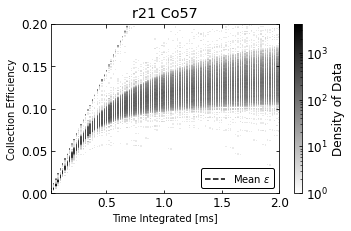

In [684]:
fig, ax = plt.subplots(figsize=(3 + 3/8) * np.array([1.5, 1]))

_, ax = dp.densityplot(
    np.tile((step_arr / fs)[:, np.newaxis], len(traces_peak)).flatten() * 1e3,
    -out_ft.flatten(),
    #xlims=(0, 6),
    ylims=(0, 0.2),
    cmap='binary',
    ax=ax,
)
ax.set_xlabel("Time Integrated [ms]", fontsize=10)
ax.set_ylabel("Collection Efficiency", fontsize=10)
ax.set_title("r21 Co57")
ax.legend(loc='lower right', fontsize=10, framealpha=1, edgecolor='k')
ax.grid(False)
# ax.set_xlim(0, 200)
fig.tight_layout()

In [688]:
-out_ft.mean(axis=-1)/constants.e/122e3

array([1.22898416e+11, 3.10855448e+11, 5.37404422e+11, 7.85657420e+11,
       1.04478804e+12, 1.30832138e+12, 1.57216699e+12, 1.83332018e+12,
       2.08926886e+12, 2.33784590e+12, 2.57725144e+12, 2.80611022e+12,
       3.02349120e+12, 3.22888591e+12, 3.42216871e+12, 3.60351563e+12,
       3.77332623e+12, 3.93215523e+12, 4.08064941e+12, 4.21949270e+12,
       4.34937119e+12, 4.47095875e+12, 4.58490682e+12, 4.69183638e+12,
       4.79232161e+12, 4.88690824e+12, 4.97608757e+12, 5.06031505e+12,
       5.14000637e+12, 5.21554562e+12, 5.28727127e+12, 5.35549364e+12,
       5.42049390e+12, 5.48252981e+12, 5.54182248e+12, 5.59858263e+12,
       5.65300151e+12, 5.70524952e+12, 5.75547665e+12, 5.80381662e+12,
       5.85039816e+12, 5.89532855e+12, 5.93871447e+12, 5.98065335e+12,
       6.02123570e+12, 6.06052807e+12, 6.09861308e+12, 6.13555987e+12,
       6.17144108e+12, 6.20630499e+12, 6.24021424e+12, 6.27320759e+12,
       6.30532658e+12, 6.33661631e+12, 6.36710273e+12, 6.39682768e+12,
      

In [607]:
phonon_efficiency=(r21copeak/constants.e)/122e3 #phonon collection eff from Co peak
#we take the energy absorbed at the Co peak, convert it to eV, and divide by the energy of the Co source line
print(phonon_efficiency)

0.09208783880351945


In [606]:
r21copeak = 1.8e-15

# Baesline energy res

In [854]:
#this creates a chi squared cut to use on randoms, that selects data with chi squared within 3 standard deviations of the mean
#in a chi squared distribution, the mean is the number of degrees of freedom and the variance is twice that
#the st dev is the square root of the variance
chi_thresh= int(tracelength*fs) + 3.5 * np.sqrt(2 * int(tracelength*fs))
chi_thresh_lower= int(tracelength*fs) - 3.5 * np.sqrt(2 * int(tracelength*fs))
crandschisqared = ((df.ofchi2_nodelay_CPDv21Ge < chi_thresh) & (df.ofchi2_nodelay_CPDv21Ge > chi_thresh_lower))

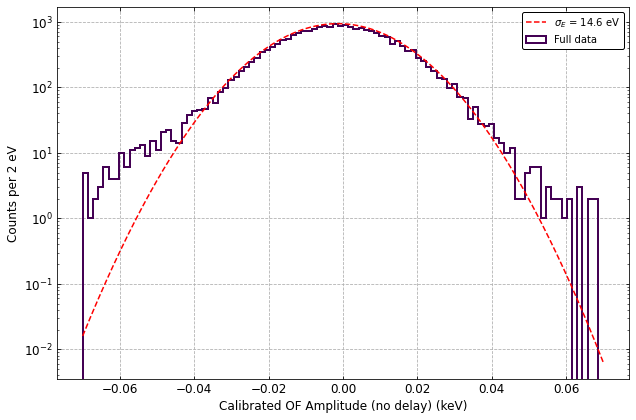

In [858]:
fig, ax = dp.hist(
    df.ofamp_nodelay_CPDv21Ge[crandoms&crandschisqared]/fitslope,
    nbins=100,
    xlims=(-0.07,0.07),
    labeldict = {'title' : None,
                'xlabel' : 'Calibrated OF Amplitude (no delay) (keV)',
                'ylabel' : 'Counts per 2 eV',
                },
)
x_mean, x_std, _ = qp.cut.iterstat(df.ofamp_nodelay_CPDv21Ge[crandoms&crandschisqared]/fitslope)

xx = np.linspace(-0.07, 0.07, num=1000)

hist, bin_edges = np.histogram(df.ofamp_nodelay_CPDv21Ge[crandoms&crandschisqared]/fitslope, bins=100, range=(-.075, .075))
norm = hist.sum() * np.mean(np.diff(bin_edges))

yy = stats.norm.pdf(xx, scale=x_std, loc=x_mean) * norm

ax.plot(
    xx,
    yy,
    color='r',
    linestyle='dashed',
    label=r'$\sigma_E$' + f' = {x_std*1000:.1f} eV'
)

ax.legend(loc='upper right', framealpha=1, edgecolor='k')
fig.tight_layout()

#np.std(df.ofamp_nodelay_CPDV2Ge[crandoms&crandschisqared]/fitslope)
#standard deviation of noise in calibrated OF amp, this is the baseline energy resolution
#we expect probably better than 20 eV


## r21 background

In [694]:
#this creates a chi squared cut to use on randoms, that selects data with chi squared within 3 standard deviations of the mean
#in a chi squared distribution, the mean is the number of degrees of freedom and the variance is twice that
#the st dev is the square root of the variance
chi_thresh= int(tracelength*fs) + 3 * np.sqrt(2 * int(tracelength*fs))
chi_thresh_lower= int(tracelength*fs) - 3 * np.sqrt(2 * int(tracelength*fs))
crandschisqared = ((df_nosr21.ofchi2_nodelay_CPDv21Ge < chi_thresh) & (df_nosr21.ofchi2_nodelay_CPDv21Ge > chi_thresh_lower))

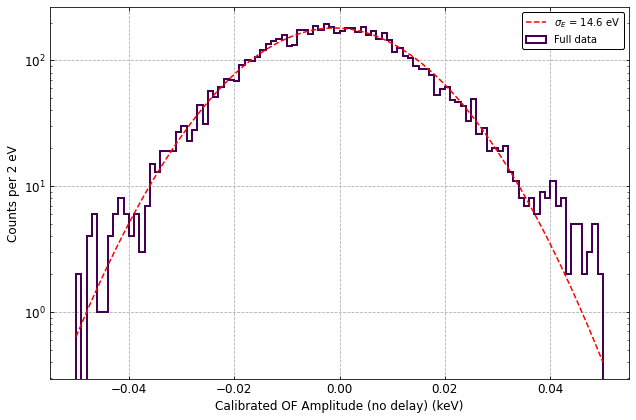

In [696]:
fig, ax = dp.hist(
    df_nosr21.ofamp_nodelay_CPDv21Ge[crandoms_nosr21&crandschisqared]/fitslope,
    nbins=100,
    xlims=(-0.05,0.05),
    labeldict = {'title' : None,
                'xlabel' : 'Calibrated OF Amplitude (no delay) (keV)',
                'ylabel' : 'Counts per 2 eV',
                },
)
x_mean, x_std, _ = qp.cut.iterstat(df_nosr21.ofamp_nodelay_CPDv21Ge[crandoms_nosr21&crandschisqared]/fitslope)

xx = np.linspace(-0.05, 0.05, num=1000)

hist, bin_edges = np.histogram(df_nosr21.ofamp_nodelay_CPDv21Ge[crandoms_nosr21&crandschisqared]/fitslope, bins=100, range=(-.05, .05))
norm = hist.sum() * np.mean(np.diff(bin_edges))

yy = stats.norm.pdf(xx, scale=x_std, loc=x_mean) * norm

ax.plot(
    xx,
    yy,
    color='r',
    linestyle='dashed',
    label=r'$\sigma_E$' + f' = {x_std*1000:.1f} eV'
)

ax.legend(loc='upper right', framealpha=1, edgecolor='k')
fig.tight_layout()

#np.std(df.ofamp_nodelay_CPDV2Ge[crandoms&crandschisqared]/fitslope)
#standard deviation of noise in calibrated OF amp, this is the baseline energy resolution
#we expect probably better than 20 eV


## r18 fe55 both frames

In [697]:
#this creates a chi squared cut to use on randoms, that selects data with chi squared within 3 standard deviations of the mean
#in a chi squared distribution, the mean is the number of degrees of freedom and the variance is twice that
#the st dev is the square root of the variance
chi_thresh= int(tracelength*fs) + 3 * np.sqrt(2 * int(tracelength*fs))
chi_thresh_lower= int(tracelength*fs) - 3 * np.sqrt(2 * int(tracelength*fs))
crandschisqared = ((df_both.ofchi2_nodelay_CPDv21Ge_gaas < chi_thresh) & (df_both.ofchi2_nodelay_CPDv21Ge_gaas > chi_thresh_lower))

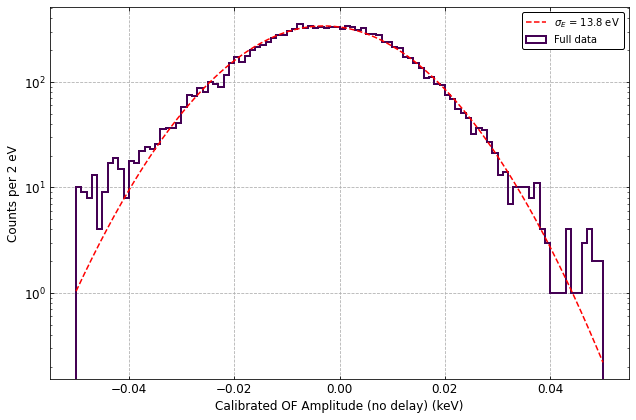

In [699]:
fig, ax = dp.hist(
    df_both.ofamp_nodelay_CPDv21Ge_gaas[crandoms_both&crandschisqared]/fitslope,
    nbins=100,
    xlims=(-0.05,0.05),
    labeldict = {'title' : None,
                'xlabel' : 'Calibrated OF Amplitude (no delay) (keV)',
                'ylabel' : 'Counts per 2 eV',
                },
)
x_mean, x_std, _ = qp.cut.iterstat(df_both.ofamp_nodelay_CPDv21Ge_gaas[crandoms_both&crandschisqared]/fitslope)

xx = np.linspace(-0.05, 0.05, num=1000)

hist, bin_edges = np.histogram(df_both.ofamp_nodelay_CPDv21Ge_gaas[crandoms_both&crandschisqared]/fitslope, bins=100, range=(-.05, .05))
norm = hist.sum() * np.mean(np.diff(bin_edges))

yy = stats.norm.pdf(xx, scale=x_std, loc=x_mean) * norm

ax.plot(
    xx,
    yy,
    color='r',
    linestyle='dashed',
    label=r'$\sigma_E$' + f' = {x_std*1000:.1f} eV'
)

ax.legend(loc='upper right', framealpha=1, edgecolor='k')
fig.tight_layout()

#np.std(df.ofamp_nodelay_CPDV2Ge[crandoms&crandschisqared]/fitslope)
#standard deviation of noise in calibrated OF amp, this is the baseline energy resolution
#we expect probably better than 20 eV
